In [1]:
%pylab
%matplotlib inline

import stumpy
from astropy.stats import bayesian_blocks
from scipy import interpolate
from scipy.signal import find_peaks

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


> Привет!
К письму прикрепляю кривую блеска в гамма. 
Повторные паттерны для этого объекта описаны в статье https://ui.adsabs.harvard.edu/abs/2021MNRAS.505.4616B/abstract,
чтобы было с чем сравнить.

> Ссылка на алгоритм по баессовым блокам: https://ui.adsabs.harvard.edu/abs/2013ApJ...764..167S
Ссылка на реализацию в astropy: https://docs.astropy.org/en/stable/api/astropy.stats.bayesian_blocks.html

# all datasets

In [30]:
import os

datapath = '/mnt/sdb2/science/blazars/gamma_adaptive/'
for fname in os.listdir(datapath):
    if '.zip' in fname:
        continue
    
    for filename in os.listdir(datapath + fname + '/tmp/'):
        if '.dat' in filename and '_upl' not in filename:

            try:
                data = np.loadtxt(datapath + fname + '/tmp/' + filename)
            except:
                data = []
            print(filename, len(data))
    

1es0647_adaptive.dat 397
3c273_adaptive.dat 801
3c279_adaptive.dat 2270
3c454.3_adaptive.dat 4102
3c66a_adaptive.dat 721
3c84_adaptive.dat 1541
ao0235_adaptive.dat 624
bllac_adaptive.dat 1767
cta102_adaptive.dat 2169
cta26_adaptive.dat 465
h1722_adaptive.dat 360
mkn421_adaptive.dat 1713
oj248_adaptive.dat 142
oj287_adaptive.dat 495
ot081_adaptive.dat 383
pg1553_adaptive.dat 738
pks0735_adaptive.dat 554
pks1222_adaptive.dat 1135
pks1510_adaptive.dat 2220
q0836_adaptive.dat 475
q1127_adaptive.dat 163
q1156_adaptive.dat 868
q1633_adaptive.dat 1277
q1739_adaptive.dat 267
q1959_adaptive.dat 662
s40954_adaptive.dat 472
s41030_adaptive.dat 437
s50716_adaptive.dat 1656
wcom_adaptive.dat 371


In [6]:
!head 3c279_adaptive.dat

# No    MJD        Flux[1e-7 ph/sec/cm^2]     Error
0   54685.656032   3.16060   0.50521
1   54691.156032   3.20550   0.54973
2   54695.906032   3.59000   0.55568
3   54699.906032   4.50820   0.73422
4   54702.781032   4.51500   0.82079
5   54704.781032   3.82320   0.77508
6   54706.281032   5.30940   1.04480
7   54707.906032   4.20320   0.76625
8   54710.656032   3.43930   0.57868


In [252]:
data = np.loadtxt('3c279_adaptive.dat')
x,y,yerr = data[:,1], data[:,2], data[:,3]

In [9]:
len(data), data.shape

(2270, (2270, 4))

(array([1.45e+03, 3.13e+02, 2.09e+02, 1.15e+02, 1.71e+02, 3.00e+00,
        3.00e+00, 2.00e+00, 1.00e+00, 2.00e+00]),
 array([ 0.25,  1.85,  3.45,  5.05,  6.65,  8.25,  9.85, 11.45, 13.05,
        14.65, 16.25]),
 <BarContainer object of 10 artists>)

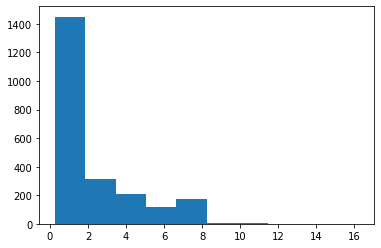

In [65]:
plt.hist(np.diff(x))

<ErrorbarContainer object of 3 artists>

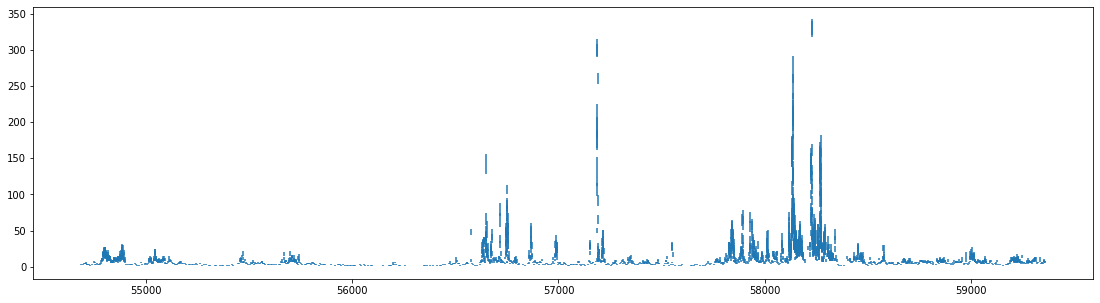

In [24]:
fig = plt.figure(figsize=[19, 5])
plt.errorbar(data[:, 1], data[:, 2], yerr=data[:, 3], ls='none')

(0.0, 25.0)

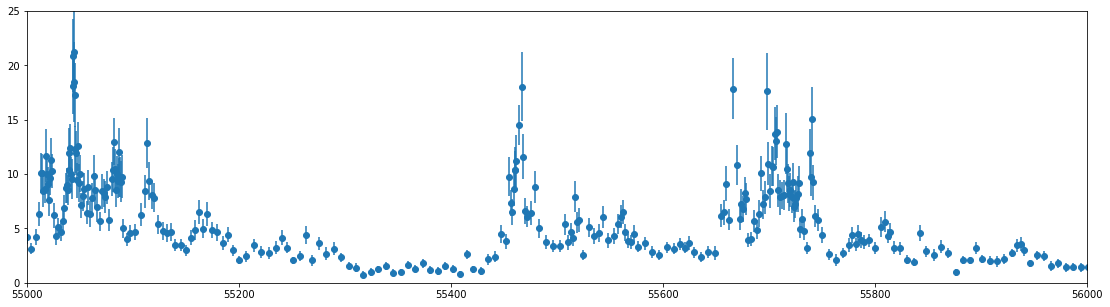

In [23]:
fig = plt.figure(figsize=[19, 5])
plt.errorbar(data[:, 1], data[:, 2], marker='o', yerr=data[:, 3], ls='none')
plt.xlim(55000, 56000)
plt.ylim(0, 25)

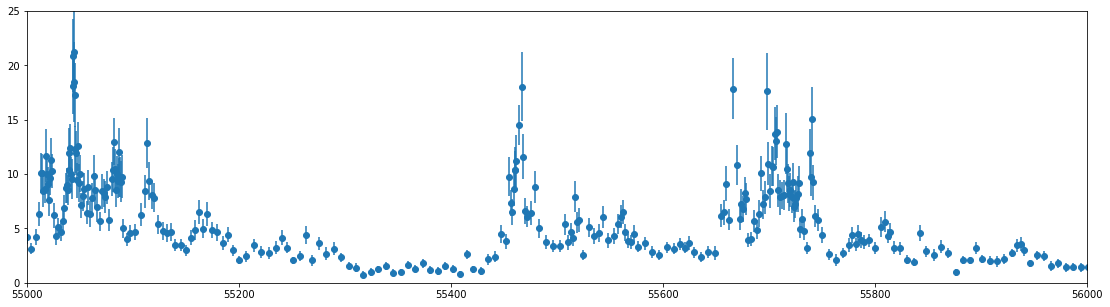

In [187]:
fig = plt.figure(figsize=[19, 5])
plt.errorbar(data[:, 1], data[:, 2], marker='o', yerr=data[:, 3], ls='none')
plt.xlim(55000, 56000)
plt.ylim(0, 25)

for i,ipts in enumerate(data[:400, 1]):
    if abs(data[i, 1]-data[i+1, 1]) < 0.0001:
        plt.scatter(data[i, 1], data[i, 2], 10, color='r')
        print(i)

In [3]:
from astropy.stats import bayesian_blocks

In [4]:
edges = bayesian_blocks(data[:, 1], x=data[:, 2], sigma=data[:, 3], fitness='measures', p0=0.05)

In [5]:
bins = np.digitize(data[:, 1], edges, right=False)
bin_num = np.max(bins)

In [4]:
def blockify(x,y,yerr, **kwargs):
    xx_,yy_ = [], []
    edges = bayesian_blocks(x, x=y, sigma=yerr, **kwargs)
    bins = np.digitize(x, edges, right=False)
    bin_num = np.max(bins)
    for bin_n in range(bin_num):
        mask = bins == bin_n
        yy = np.mean(y[mask])
        xx = x[mask]    
        try:
            if len(xx_)>0:
                xx_.append(xx_[-1])
                yy_.append(yy)

            xx_.append(np.min(xx))
            xx_.append(np.max(xx))

            yy_.append(yy)
            yy_.append(yy)
        except:
            pass
    
    return np.array(xx_),np.array(yy_), edges

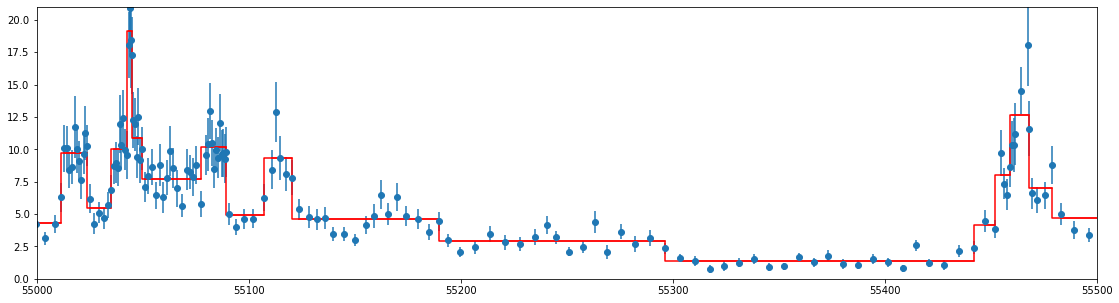

In [9]:
fig = plt.figure(figsize=[19, 5])
plt.errorbar(data[:, 1], data[:, 2], marker='o', yerr=data[:, 3], ls='none')
plt.xlim(55000, 55500)
plt.ylim(0, 21)

xx_ = []
yy_ = []

for bin_n in range(bin_num):
    mask = bins == bin_n
    yy = np.mean(data[mask, 2])
    xx = data[mask, 1]    
    try:
        plt.plot([np.min(xx), np.max(xx)], [yy,yy], color='r', alpha=0.9)
        
        if len(xx_)>0:
            xx_.append(xx_[-1])
            yy_.append(yy)
            
        xx_.append(np.min(xx))
        xx_.append(np.max(xx))
        
        yy_.append(yy)
        yy_.append(yy)
        
    except:
        pass

plt.plot(xx_, yy_, '-', color='r')
plt.show()

In [33]:
xx_, yy_ = np.array(xx_), np.array(yy_)

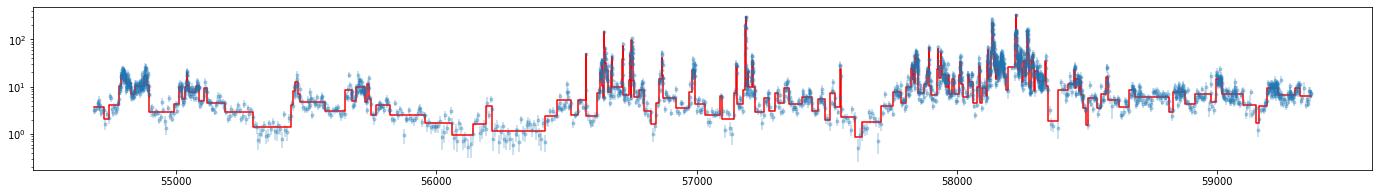

In [17]:
fig = plt.figure(figsize=[24, 3])

# region 1 55002 ≤ MJD ≤ 55134
# region 2 55671.9 ≤ MJD ≤ 55755.4
# region 3 57280.0 ≤ MJD ≤ 57515.7
# region 4 56630.1 < 𝑀𝐽𝐷 < 56682.7

plt.errorbar(data[:, 1], data[:, 2], marker='.', yerr=data[:, 3], ls='none', alpha=0.3)
plt.plot(xx_, yy_, '-', color='r')
plt.yscale('log')
plt.show()

In [133]:
len(edges)

270

Similar patterns regions:

In [18]:
region1 = [55002, 55134]
region2 = [55671.9, 55755.4]
region3 = [57280.0, 57515.7]
region4 = [56630.1, 56682.7]

regions = [region1,region2, region3, region4]

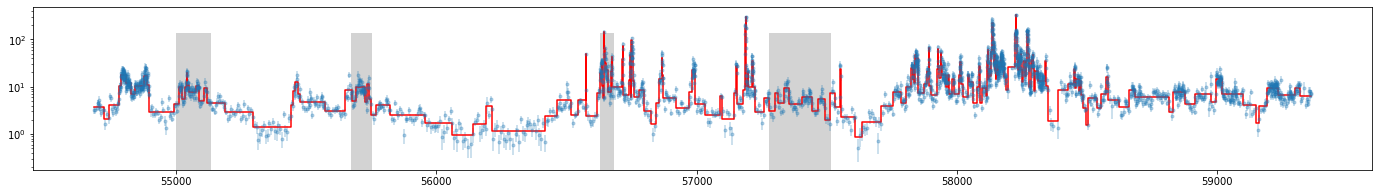

In [132]:
fig = plt.figure(figsize=[24, 3])

ax = plt.gca()
for region in regions:
    regx1,regx2 = region
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)

    
plt.errorbar(data[:, 1], data[:, 2], marker='.', yerr=data[:, 3], ls='none', alpha=0.3)
plt.plot(xx_, yy_, '-', color='r')
plt.yscale('log')
plt.show()

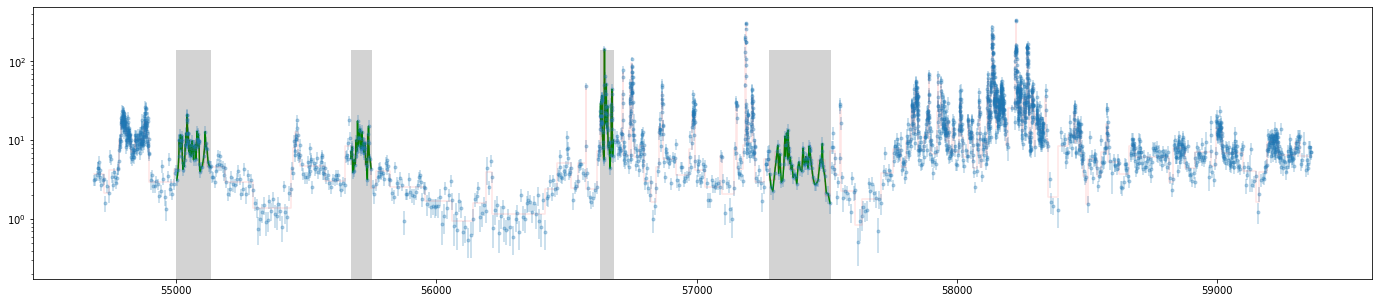

In [23]:
fig = plt.figure(figsize=[24, 5])

ax = plt.gca()
for region in regions:
    regx1,regx2 = region
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)
    
    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')

plt.errorbar(data[:, 1], data[:, 2], marker='.', yerr=data[:, 3], ls='none', alpha=0.3)
plt.plot(xx_, yy_, '-', color='r', alpha=0.1)
plt.yscale('log')
plt.show()

In [89]:
from scipy.signal import savgol_filter

def splinify(x,y,yerr, **kwargs):
    
    s = interpolate.InterpolatedUnivariateSpline(x, y, w=1/yerr**2, **kwargs)
    xfit = np.linspace(np.min(x), np.max(x), 2*len(x))
    yfit = s(xfit)
    
    return xfit, yfit

In [73]:
xx_, yy_ = blockify(x,y,yerr, fitness='measures', p0=0.05)

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [90]:
xx_s, yy_s = splinify(x,y,yerr, k=1)

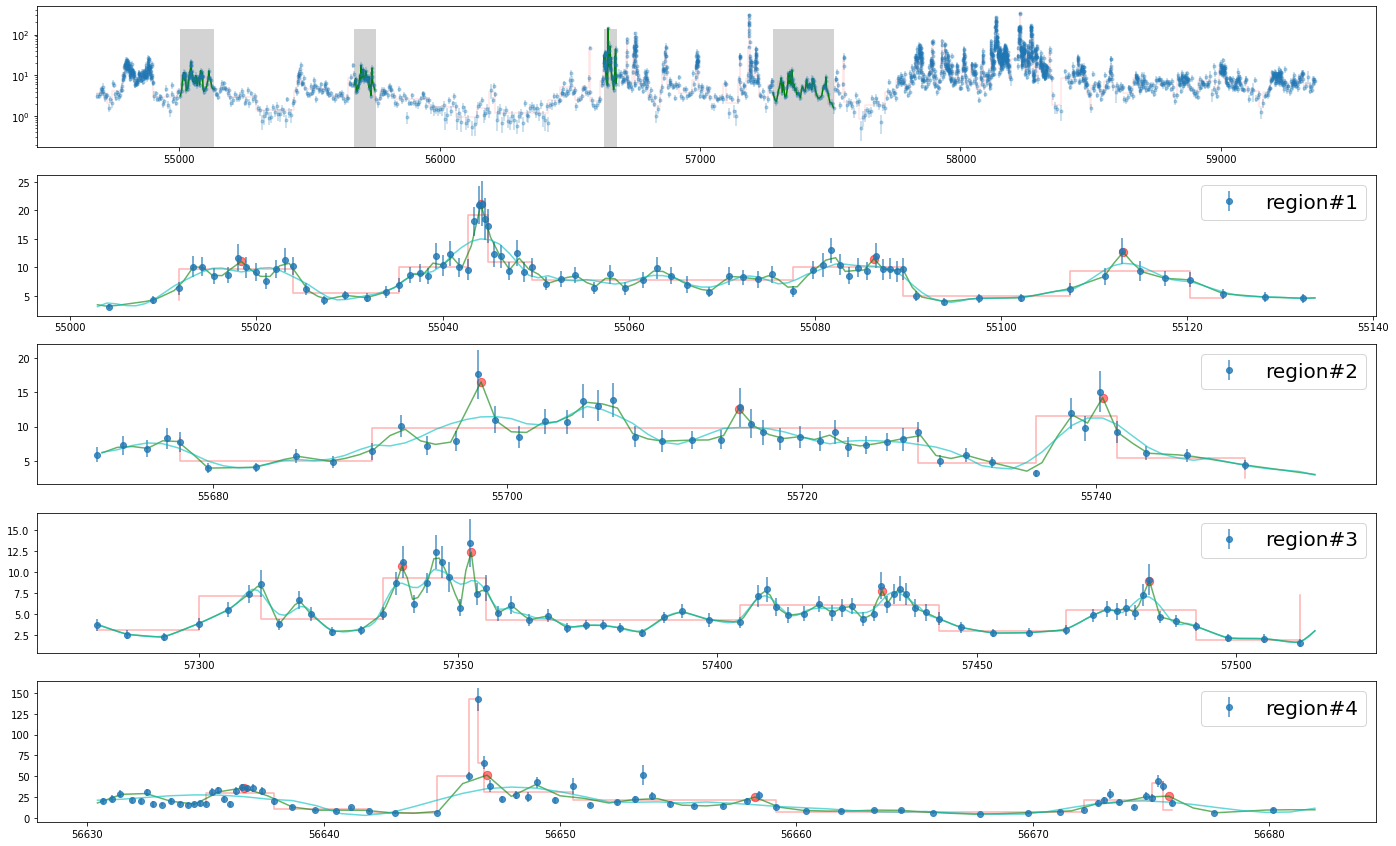

In [191]:
fig,axes = plt.subplots(figsize=[24, 15], nrows=5)

ax = axes[0]
ax.errorbar(data[:, 1], data[:, 2], marker='.', yerr=data[:, 3], ls='none', alpha=0.3)
ax.plot(xx_, yy_, '-', color='r', alpha=0.1)
ax.set_yscale('log')


maxima = find_peaks(yy_s, distance = 7, threshold=1)
max_pos = xx_s[maxima[0]]
max_height = yy_s[maxima[0]]

region_pts = []


ii=0
for region in regions:
    regx1,regx2 = region
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)
    
    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')
    region_pts.append([x[mask], y[mask]])
    
    ii+=1
    axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'region#{ii}')
    axes[ii].legend(fontsize=20)
    
    mask = (xx_>regx1)&(xx_<=regx2)
    axes[ii].plot(xx_[mask], yy_[mask], color='r', alpha=0.3)
    
    
    mask = (xx_s>regx1)&(xx_s<=regx2)
    axes[ii].plot(xx_s[mask], yy_s[mask], color='g', alpha=0.6)
    
    axes[ii].plot(xx_s[mask], savgol_filter(yy_s[mask], 15, 5), color='c', alpha=0.6)
    
    mask = (max_pos>regx1)&(max_pos<=regx2)
    axes[ii].scatter(max_pos[mask], max_height[mask], 70, color='r', alpha=0.5)

plt.show()

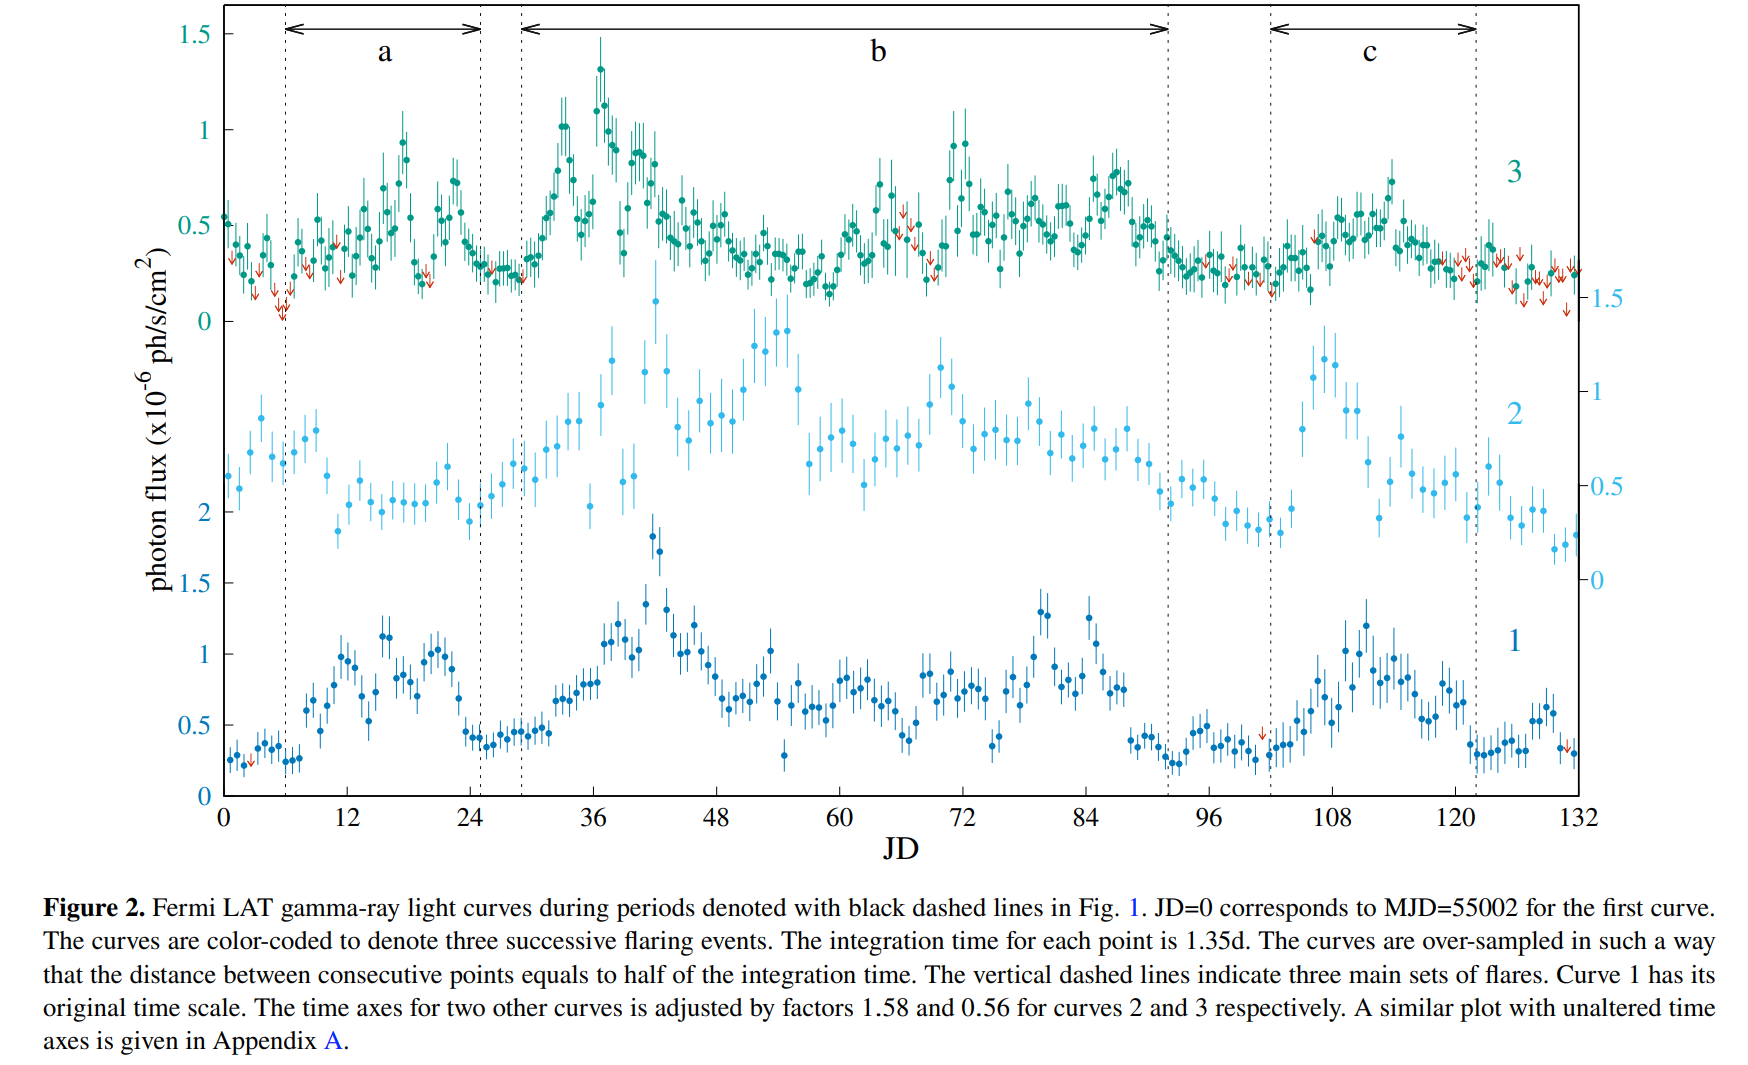

In [36]:
from IPython.display import Image

Image('fig1_blinov.png', width=900)

In [108]:
dtw.distance(region_pts[0][1], region_pts[1][1])

17.407857950467275

In [109]:
dtw.distance(region_pts[0][1], region_pts[2][1])

20.137034866799212

In [110]:
from scipy import stats

In [111]:
dtw.distance(stats.zscore(region_pts[0][1]), stats.zscore(region_pts[1][1]))

4.2209797368182365

In [112]:
dtw.distance(stats.zscore(region_pts[0][1]), stats.zscore(region_pts[2][1]))

3.478465070222373

In [129]:
from dtaidistance import preprocessing
series = preprocessing.differencing(region_pts[0][1], smooth=0.2)

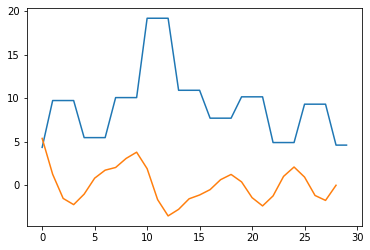

In [130]:
plt.plot(region_pts[0][1])
plt.plot(series)

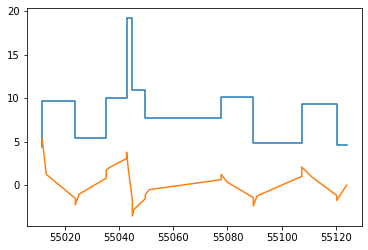

In [131]:
plt.plot(region_pts[0][0], region_pts[0][1])
plt.plot(region_pts[0][0][1:], series)

In [106]:
from dtaidistance import dtw

s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]
distance = dtw.distance(s1, s2)
print(distance)

1.4142135623730951


<ErrorbarContainer object of 3 artists>

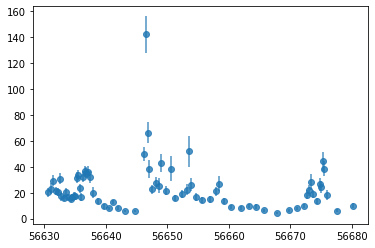

In [87]:
mask = (x>regx1)&(x<=regx2)
plt.errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8)

In [85]:
import numpy as np
from sklearn.mixture import GaussianMixture
from pylab import concatenate, normal

# Determine parameters mu1, mu2, sigma1, sigma2, w1 and w2
gm = GaussianMixture(n_components=4, random_state=0).fit(np.array([x[mask],y[mask]]))

# print(f'mu1={gm.means_[0]}, mu2={gm.means_[1]}')
# print(f'sigma1={np.sqrt(gm.covariances_[0])}, sigma2={np.sqrt(gm.covariances_[1])}')
# print(f'w1={gm.weights_[0]}, w2={gm.weights_[1]}')
# print(f'n1={int(n * gm.weights_[0])} n2={int(n * gm.weights_[1])}')

ValueError: Expected n_samples >= n_components but got n_components = 4, n_samples = 2

In [45]:
window_size = 200

matrix_profile = stumpy.stump(data[:,2], m=window_size)

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/stumpy/stump.py:359: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9002. The TBB threading layer is disabled.
  ndist_counts = core._count_diagonal_ndist(diags, m, n_A, n_B)


In [46]:
matrix_profile

array([[11.393332395452834, 1543, -1, 1543],
       [11.410698725232576, 1544, -1, 1544],
       [11.432546500662362, 1545, -1, 1545],
       ...,
       [12.760067549929964, 1574, 1574, -1],
       [12.531283266322715, 1575, 1575, -1],
       [12.526951006599226, 1576, 1576, -1]], dtype=object)

In [47]:
x, y = data[:, 1], data[:, 2]

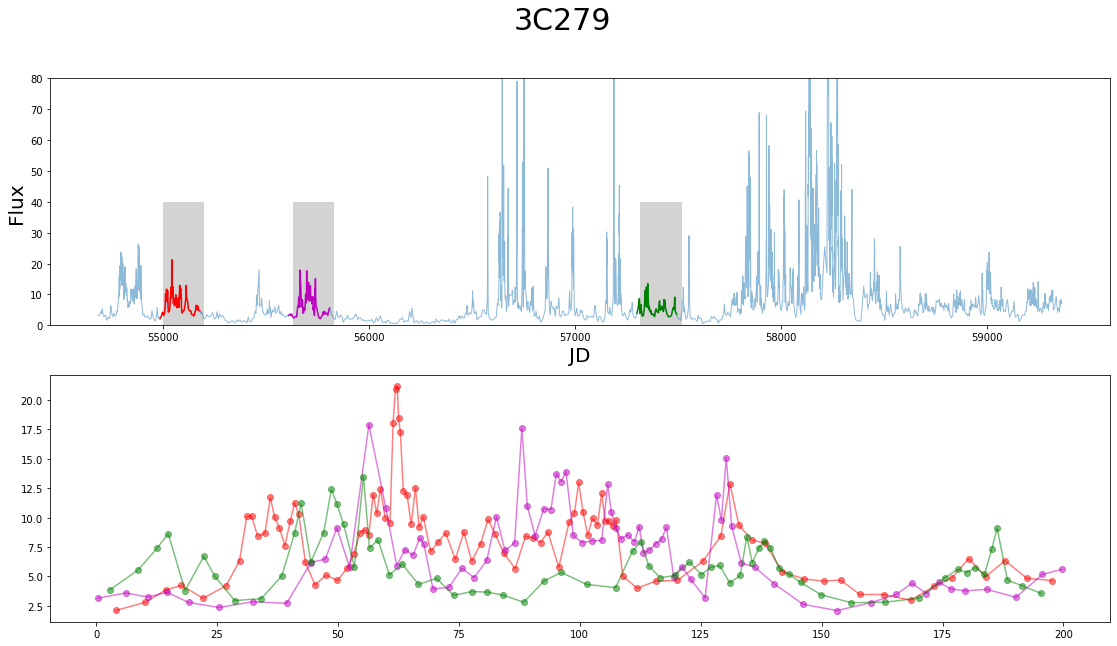

In [62]:
fig, axs = plt.subplots(2, figsize=[19,10])

plt.suptitle('3C279', fontsize='30')
axs[0].set_ylabel("Flux", fontsize='20')
axs[0].set_xlabel("JD", fontsize='20')


axs[0].plot(x, y , alpha=0.5, linewidth=1)

rect = Rectangle((55002, 0), 200, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((55002+628, 0), 200, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((55002+2315, 0), 200, 40, facecolor='lightgrey')
axs[0].add_patch(rect)

start = 55002-20
mask = (x>start)&(x<start+200)
axs[0].plot(x[mask], y[mask], color='r')
axs[1].plot(x[mask]-start, y[mask], '-o', color='r', alpha=0.5)

mask = (x>start+628)&(x<start+628+200)
axs[0].plot(x[mask], y[mask], color='m')
axs[1].plot(x[mask]-start-628, y[mask], '-o', color='m', alpha=0.5)

mask = (x>start+2315)&(x<start+2315+200)
axs[0].plot(x[mask], y[mask], color='g')
axs[1].plot(x[mask]-start-2315, y[mask], '-o', color='g', alpha=0.5)

axs[0].set_ylim(0, 80)

# axs[1].set_xlabel("Time", fontsize='20')
# axs[1].set_ylabel("Steam Flow", fontsize='20')
# axs[1].plot(steam_df['steam flow'].values[643:643+m], color='C1')
# axs[1].plot(steam_df['steam flow'].values[8724:8724+m], color='C2')
plt.show()

In [94]:
x=x[:600]
y=y[:600]

In [95]:
window_size = 110
m= window_size

matrix_profile = stumpy.stump(y, m=window_size)

In [96]:
mp = matrix_profile

In [97]:
motif_idx = np.argsort(mp[:, 0])[0]

print(f"The motif is located at index {motif_idx}")

The motif is located at index 404


In [98]:
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 225


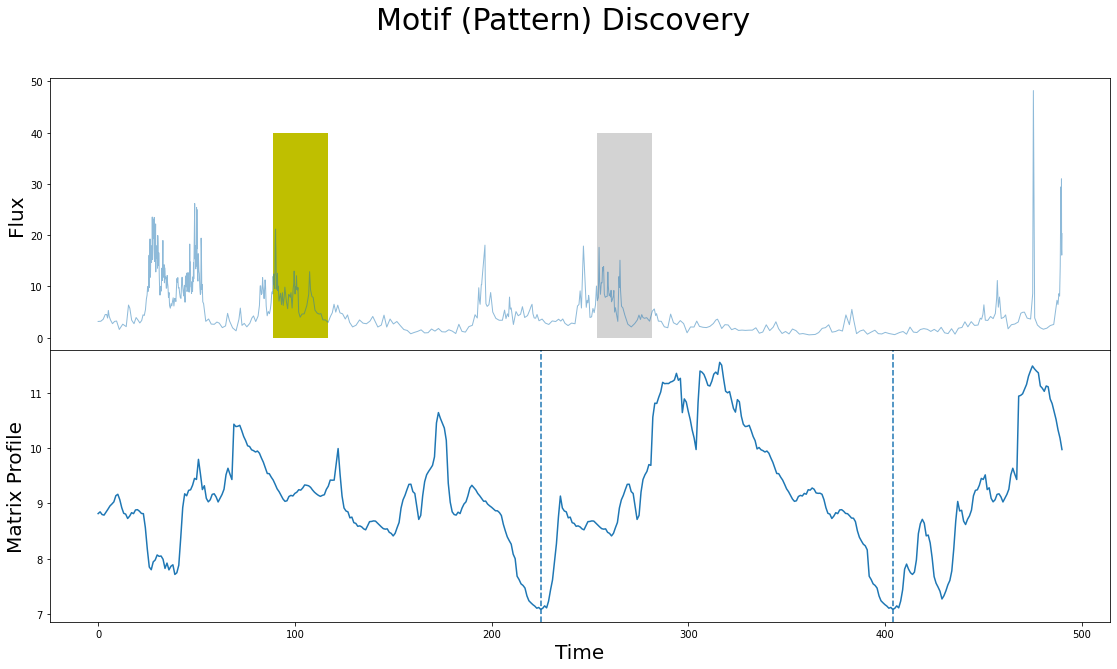

In [99]:
ig, axs = plt.subplots(2, sharex=False, gridspec_kw={'hspace': 0}, figsize=[19,10])
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')


axs[0].set_ylabel("Flux", fontsize='20')
axs[0].set_xlabel("JD", fontsize='20')
axs[0].plot(x, y , alpha=0.5, linewidth=1)

rect = Rectangle((x[motif_idx], 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((x[nearest_neighbor_idx], 0), m, 40, facecolor='y')
axs[0].add_patch(rect)

axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

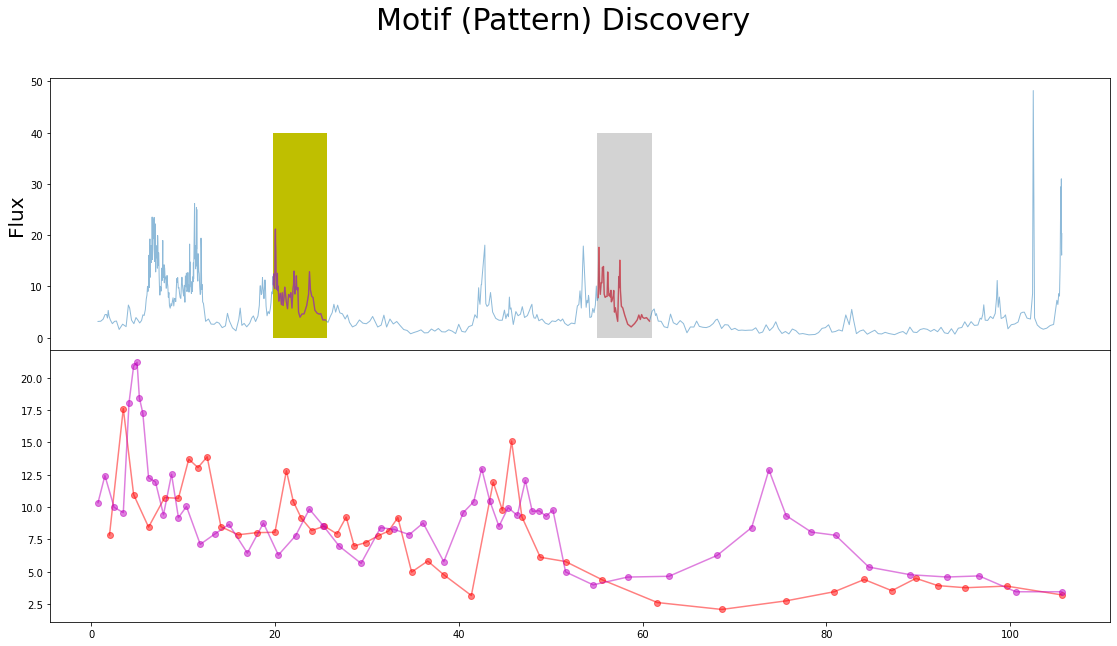

In [100]:
ig, axs = plt.subplots(2, sharex=False, gridspec_kw={'hspace': 0}, figsize=[19,10])
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].set_ylabel("Flux", fontsize='20')
axs[0].set_xlabel("JD", fontsize='20')
axs[0].plot(x, y , alpha=0.5, linewidth=1)

rect = Rectangle((x[motif_idx], 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((x[nearest_neighbor_idx], 0), m, 40, facecolor='y')
axs[0].add_patch(rect)

start = x[motif_idx]
mask = (x>start)&(x<start+m)
axs[0].plot(x[mask], y[mask], color='r', alpha=0.5)
axs[1].plot(x[mask]-start, y[mask], '-o', color='r', alpha=0.5)

start = x[nearest_neighbor_idx]
mask = (x>start)&(x<start+m)
axs[0].plot(x[mask], y[mask], color='m', alpha=0.5)
axs[1].plot(x[mask]-start, y[mask], '-o', color='m', alpha=0.5)


plt.show()

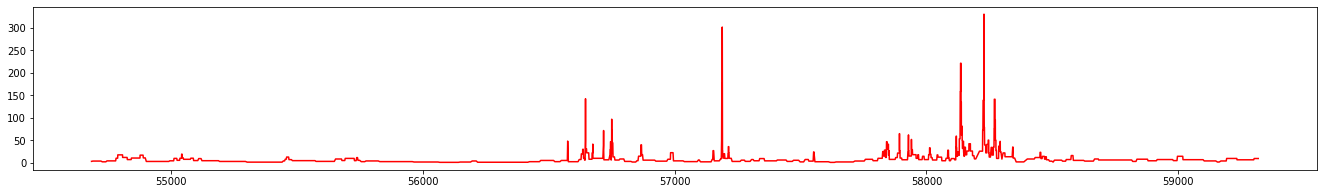

In [103]:

fig = plt.figure(figsize=[23,3])
plt.plot(xx_, yy_, '-', color='r')
plt.show()

In [105]:
x_ar = np.arange(np.min(data[:,1]), np.max(data[:,1]), 1.)
y_ar = np.interp(x_ar, xx_, yy_)

In [110]:
len(data), len(x_ar)

(2270, 4676)

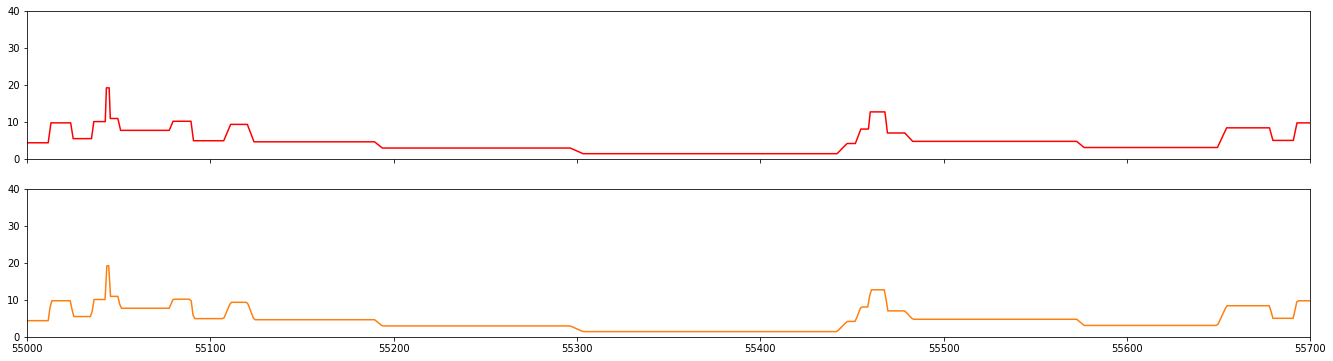

In [112]:
fig, axes = plt.subplots(figsize=[23,6], sharex=True, sharey=True, nrows=2)
axes[0].plot(xx_, yy_, '-', color='r')
axes[1].plot(x_ar, y_ar, '-', color='C1')
axes[0].set_xlim(55000, 55000+700)
axes[0].set_ylim(0, 40)
plt.show()

In [119]:
window_size = 210
m= window_size

matrix_profile = stumpy.stump(y_ar, m=window_size)

In [120]:
mp = matrix_profile

In [121]:
motif_idx = np.argsort(mp[:, 0])[0]

print(f"The motif is located at index {motif_idx}")

nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The motif is located at index 1169
The nearest neighbor is located at index 507


In [122]:
x,y=x_ar,y_ar

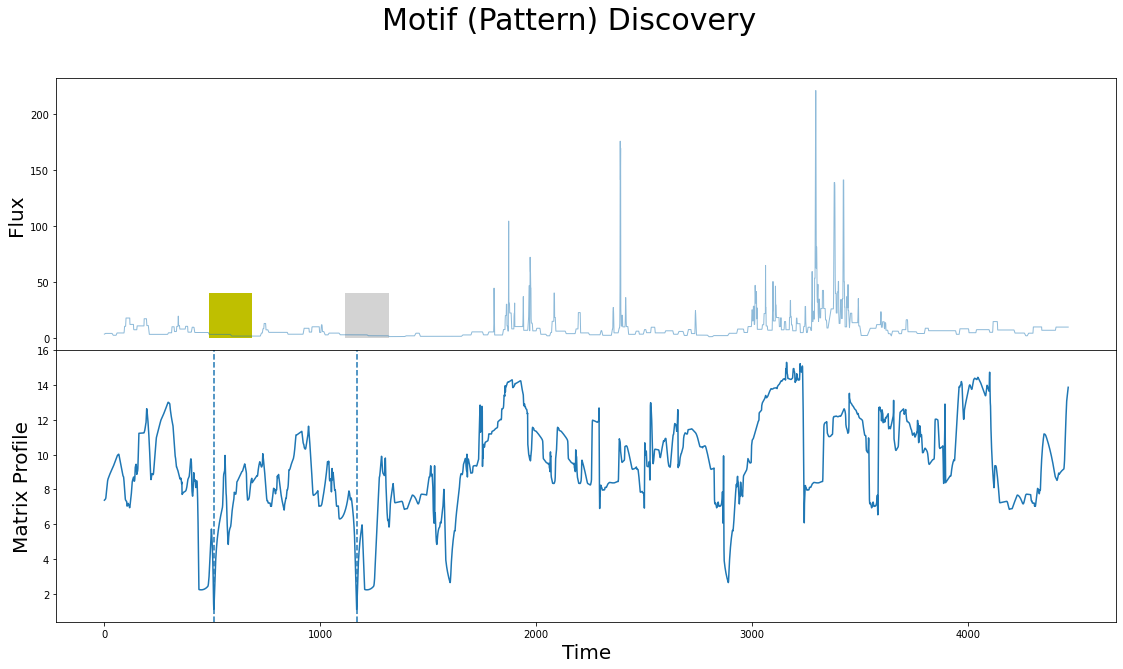

In [123]:
ig, axs = plt.subplots(2, sharex=False, gridspec_kw={'hspace': 0}, figsize=[19,10])
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')


axs[0].set_ylabel("Flux", fontsize='20')
axs[0].set_xlabel("JD", fontsize='20')
axs[0].plot(x, y , alpha=0.5, linewidth=1)

rect = Rectangle((x[motif_idx], 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((x[nearest_neighbor_idx], 0), m, 40, facecolor='y')
axs[0].add_patch(rect)

axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

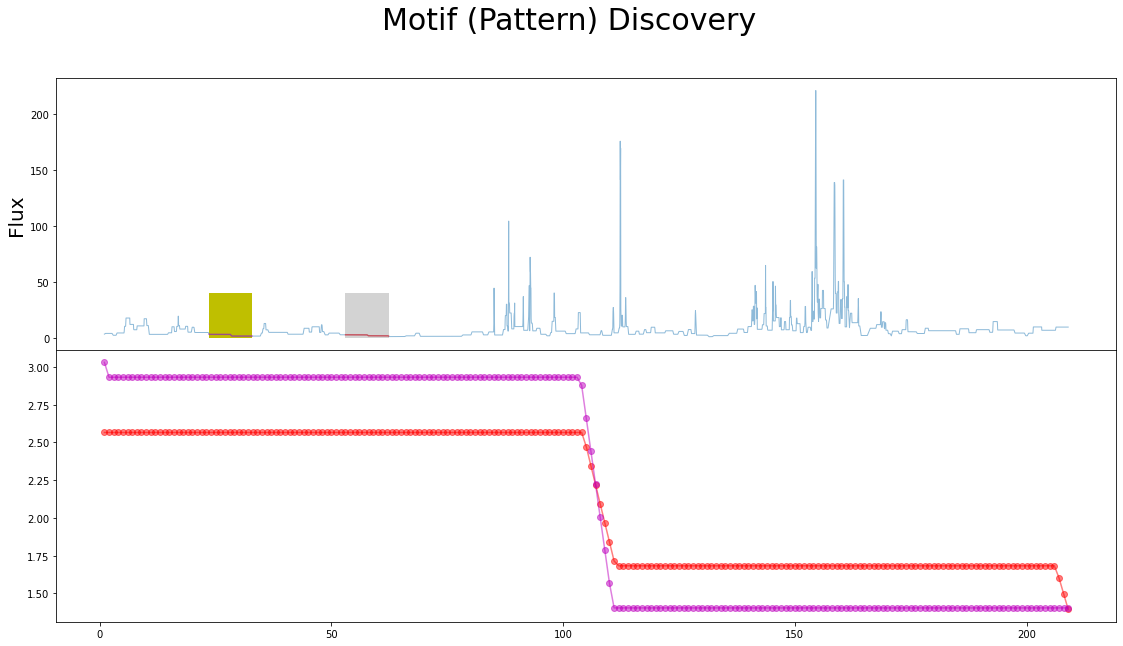

In [124]:
ig, axs = plt.subplots(2, sharex=False, gridspec_kw={'hspace': 0}, figsize=[19,10])
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].set_ylabel("Flux", fontsize='20')
axs[0].set_xlabel("JD", fontsize='20')
axs[0].plot(x, y , alpha=0.5, linewidth=1)

rect = Rectangle((x[motif_idx], 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((x[nearest_neighbor_idx], 0), m, 40, facecolor='y')
axs[0].add_patch(rect)

start = x[motif_idx]
mask = (x>start)&(x<start+m)
axs[0].plot(x[mask], y[mask], color='r', alpha=0.5)
axs[1].plot(x[mask]-start, y[mask], '-o', color='r', alpha=0.5)

start = x[nearest_neighbor_idx]
mask = (x>start)&(x<start+m)
axs[0].plot(x[mask], y[mask], color='m', alpha=0.5)
axs[1].plot(x[mask]-start, y[mask], '-o', color='m', alpha=0.5)


plt.show()

(0.0, 30.0)

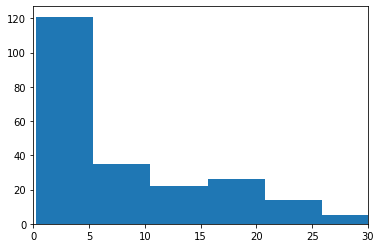

In [130]:
plt.hist(np.diff(edges), bins=40)
plt.xlim(0,30)

In [3]:
x_ar2 = np.arange(np.min(data[:,1]), np.max(data[:,1]), 1./1.58)
y_ar2 = np.interp(x_ar, xx_, yy_)

NameError: name 'x_ar' is not defined

In [133]:
m = 200
queen_mp = stumpy.stump(T_A = y_ar,
                        m = m,
                        T_B = y_ar2,
                        ignore_trivial = True)

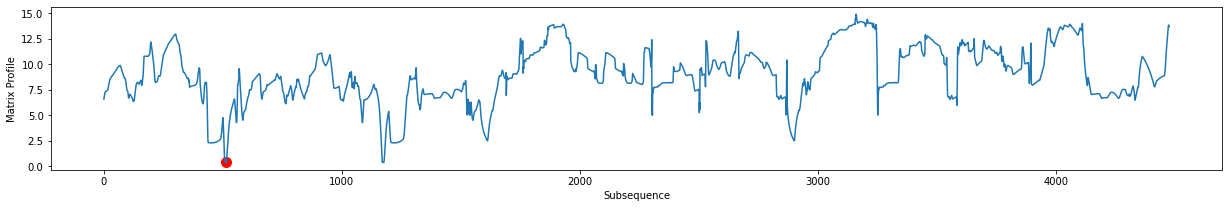

In [135]:
queen_motif_index = queen_mp[:, 0].argmin()

fig = plt.figure(figsize=[21,3])
plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')

plt.scatter(queen_motif_index,
               queen_mp[queen_motif_index, 0],
               c='red',
               s=100)

plt.plot(queen_mp[:,0])

plt.show()

In [136]:
queen_motif_index = queen_mp[:, 0].argmin()
print(f'The motif is located at index {queen_motif_index} of "Under Pressure"')

vanilla_ice_motif_index = queen_mp[queen_motif_index, 1]
print(f'The motif is located at index {vanilla_ice_motif_index} of "Ice Ice Baby"')

The motif is located at index 514 of "Under Pressure"
The motif is located at index 1176 of "Ice Ice Baby"


In [137]:
queen_df = y_ar
vanilla_ice_df = y_ar2

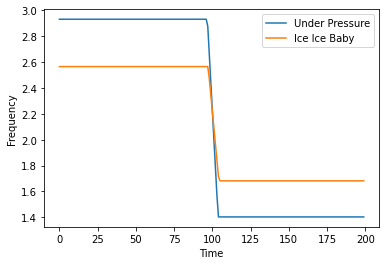

In [139]:
plt.plot(queen_df[queen_motif_index : queen_motif_index + m], label='Under Pressure')
plt.plot(vanilla_ice_df[vanilla_ice_motif_index:vanilla_ice_motif_index+m], label='Ice Ice Baby')

plt.xlabel('Time')
plt.ylabel('Frequency')

plt.legend()

plt.show()

## test two with time changed

In [2]:
data = np.loadtxt('3c279_adaptive.dat')

In [3]:
x_ar = np.arange(np.min(data[:,1]), np.max(data[:,1]), 1.)
y_ar = np.interp(x_ar, data[:,1], data[:,2])

x_ar2 = np.arange(np.min(data[:,1]), np.max(data[:,1]), 1./1.58)
y_ar2 = np.interp(x_ar2, data[:,1], data[:,2])

In [ ]:
m = 600
queen_mp = stumpy.stump(T_A = y_ar,
                        m = m,
                        T_B = y_ar2,
                        ignore_trivial = True)

Arrays T_A, T_B are not equal, which implies an AB-join.
Try setting `ignore_trivial = False`.
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/stumpy/stump.py:359: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9002. The TBB threading layer is disabled.
  ndist_counts = core._count_diagonal_ndist(diags, m, n_A, n_B)


In [ ]:
queen_motif_index = queen_mp[:, 0].argmin()

fig = plt.figure(figsize=[21,3])
plt.xlabel('Subsequence')
plt.ylabel('Matrix Profile')

plt.scatter(queen_motif_index,
               queen_mp[queen_motif_index, 0],
               c='red',
               s=100)

plt.plot(queen_mp[:,0])

plt.show()

In [11]:
queen_motif_index = queen_mp[:, 0].argmin()
print(f'The motif is located at index {queen_motif_index} of "Under Pressure"')

vanilla_ice_motif_index = queen_mp[queen_motif_index, 1]
print(f'The motif is located at index {vanilla_ice_motif_index/1.58} of "Ice Ice Baby"')

The motif is located at index 2502 of "Under Pressure"
The motif is located at index 2502.53164556962 of "Ice Ice Baby"


In [8]:
queen_df = y_ar
vanilla_ice_df = y_ar2

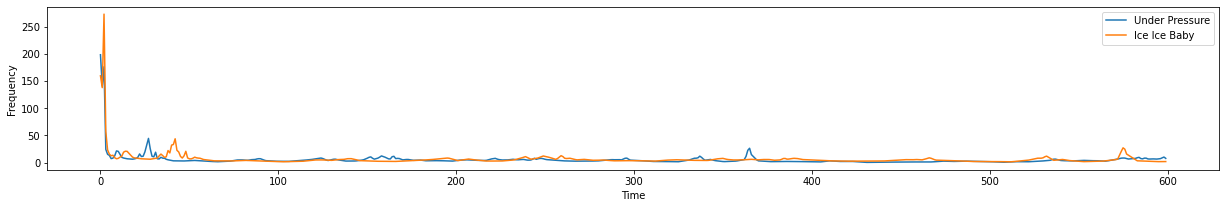

In [10]:
fig = plt.figure(figsize = [21,3])

plt.plot(queen_df[queen_motif_index : queen_motif_index + m], label='Under Pressure')
plt.plot(vanilla_ice_df[vanilla_ice_motif_index:vanilla_ice_motif_index+m], label='Ice Ice Baby')

plt.xlabel('Time')
plt.ylabel('Frequency')

plt.legend()

plt.show()

In [3]:
import dtwpython

ModuleNotFoundError: No module named 'dtwpython'

## find_peaks

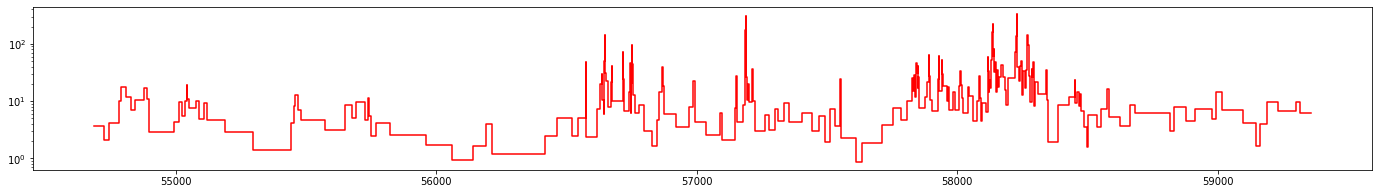

In [134]:
fig = plt.figure(figsize=[24, 3])

# region 1 55002 ≤ MJD ≤ 55134
# region 2 55671.9 ≤ MJD ≤ 55755.4
# region 3 57280.0 ≤ MJD ≤ 57515.7
# region 4 56630.1 < 𝑀𝐽𝐷 < 56682.7

plt.plot(xx_, yy_, '-', color='r')
plt.yscale('log')
plt.show()

In [149]:
maxima = find_peaks(-yy_[::3], distance = 4)
max_pos = 0.5*(xx_[::3][[_+1 for _ in maxima[0]]] + xx_[::3][maxima[0]])
max_height = yy_[::3][maxima[0]]
len(max_pos)

44

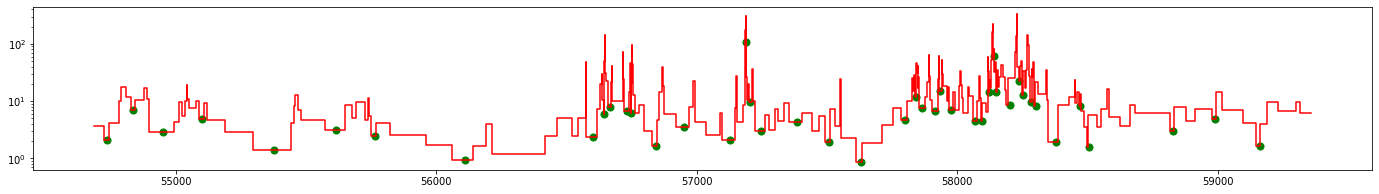

In [150]:
fig = plt.figure(figsize=[24, 3])
plt.plot(xx_, yy_, '-', color='r')

plt.scatter(max_pos, max_height, 50, color='g')

plt.yscale('log')
plt.show()

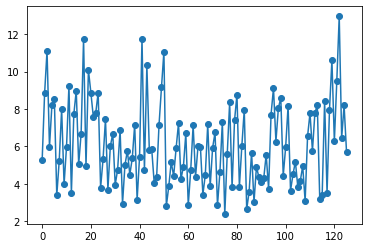

In [167]:
max_peaks = 4
motif = region_pts[0][1]

dist_res = []
for i, pos in enumerate(max_pos):
    for j, pos2 in enumerate(max_pos[i+1:i+max_peaks]):
        mask = (x>pos)&(x<=pos2)
        res = dtw.distance(stats.zscore(motif), stats.zscore(y[mask]))
        dist_res.append([pos, pos2, res])
        
plt.plot([_[2] for _ in dist_res], 'o-')

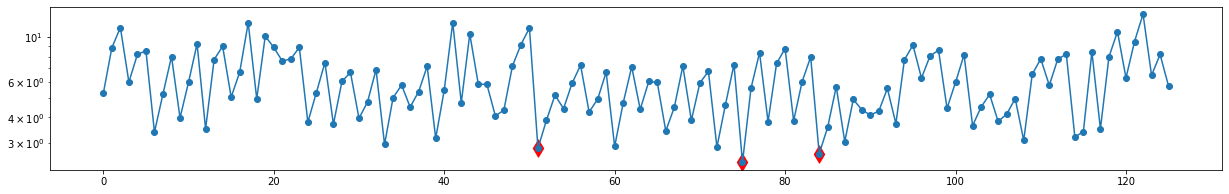

In [168]:
fig = plt.figure(figsize=[21,3])
plt.plot([_[2] for _ in dist_res], 'o-')

dist_only = np.array([_[2] for _ in dist_res])
ind = np.argpartition(-dist_only, -3)[-3:]

plt.scatter(ind, dist_only[ind], 150, marker='d', color='r')

plt.yscale('log')

In [163]:
ind

array([51, 84, 75])

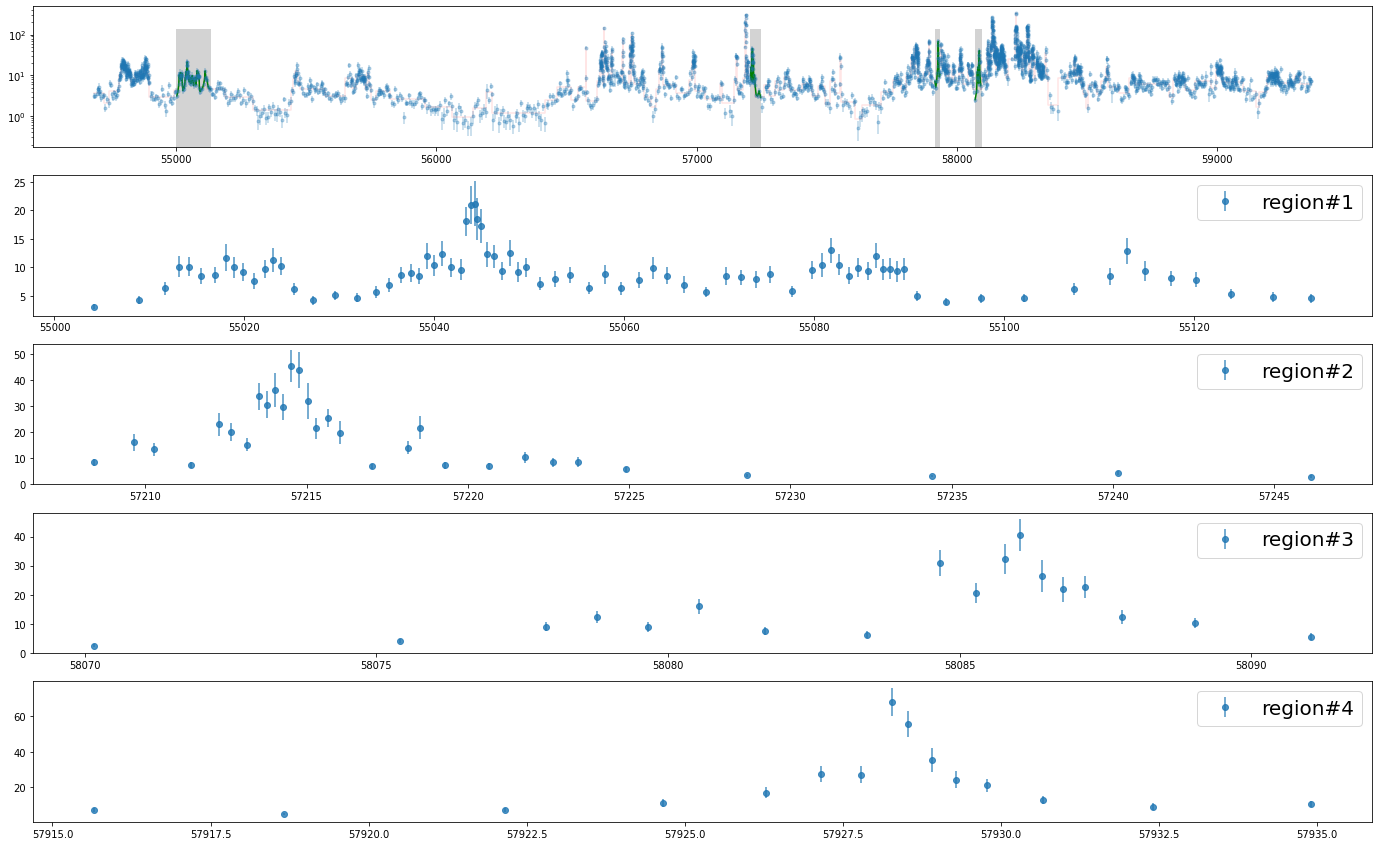

In [164]:
fig,axes = plt.subplots(figsize=[24, 15], nrows=5)

ax = axes[0]
ax.errorbar(data[:, 1], data[:, 2], marker='.', yerr=data[:, 3], ls='none', alpha=0.3)
ax.plot(xx_, yy_, '-', color='r', alpha=0.1)
ax.set_yscale('log')


ii=0
for region in regions[:1]:
    regx1,regx2 = region
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)
    
    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')
    
    ii+=1
    axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'region#{ii}')
    axes[ii].legend(fontsize=20)
    
for indd in ind:
    regx1,regx2, _ = dist_res[indd]
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)
    
    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')
    
    ii+=1
    axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'region#{ii}')
    axes[ii].legend(fontsize=20)
    

plt.show()

In [ ]:
from scipy.signal import savgol_filter

def splinify(x,y,yerr, **kwargs):
    
    s = interpolate.InterpolatedUnivariateSpline(x, y, w=1/yerr**2, **kwargs)
    xfit = np.linspace(np.min(x), np.max(x), 2*len(x))
    yfit = s(xfit)
    
    return xfit, yfit

In [170]:
from sklearn import preprocessing

In [189]:
region_pts[0]

[array([55011.656032, 55011.656032, 55013.156032, 55023.906032,
        55023.906032, 55025.281032, 55035.281032, 55035.281032,
        55036.531032, 55042.781032, 55042.781032, 55043.406032,
        55044.906032, 55044.906032, 55045.531032, 55049.656032,
        55049.656032, 55051.156032, 55077.656032, 55077.656032,
        55079.781032, 55089.531032, 55089.531032, 55090.906032,
        55107.406032, 55107.406032, 55111.156032, 55120.281032,
        55120.281032, 55123.906032]),
 array([ 4.3479    ,  9.72516364,  9.72516364,  9.72516364,  5.46796667,
         5.46796667,  5.46796667, 10.063275  , 10.063275  , 10.063275  ,
        19.1746    , 19.1746    , 19.1746    , 10.90315   , 10.90315   ,
        10.90315   ,  7.7006875 ,  7.7006875 ,  7.7006875 , 10.15165833,
        10.15165833, 10.15165833,  4.90208   ,  4.90208   ,  4.90208   ,
         9.30766   ,  9.30766   ,  9.30766   ,  4.6071    ,  4.6071    ])]

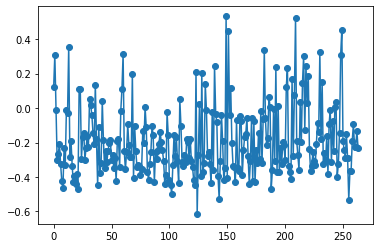

In [207]:
max_peaks = 4
motif = region_pts[0][1]
motif_x = region_pts[0][0]
min_max_scaler = preprocessing.MinMaxScaler()
motif_x_sc = min_max_scaler.fit_transform(motif_x.reshape(-1, 1)).reshape(1, -1)
ymin_max_scaler = preprocessing.MinMaxScaler()
motif_sc = ymin_max_scaler.fit_transform(motif.reshape(-1, 1)).reshape(1, -1)

s = interpolate.InterpolatedUnivariateSpline(motif_x_sc, motif_sc)


dist_res = []
for i, pos in enumerate(max_pos):
    for j, pos2 in enumerate(max_pos[i+1:i+max_peaks]):
        mask = (x>pos)&(x<=pos2)
        x_cand = x[mask]
        y_cand = y[mask]
        
        min_max_scaler2 = preprocessing.MinMaxScaler()
        x_cand_sc = min_max_scaler2.fit_transform(x_cand.reshape(-1, 1)).reshape(1, -1)
        
        ymin_max_scaler2 = preprocessing.MinMaxScaler()
        y_cand_sc = ymin_max_scaler2.fit_transform(y_cand.reshape(-1, 1)).reshape(1, -1)
        
        s_cand = interpolate.InterpolatedUnivariateSpline(x_cand_sc, y_cand_sc)
        pts = sorted(np.concatenate([motif_x_sc.ravel(), x_cand_sc.ravel()]))
        
        motif_resampled = s(pts)
        cand_resampled = s_cand(pts)
        
        
        dist_res.append([pos, pos2, np.corrcoef(motif_resampled, cand_resampled)[0,1]])
        
plt.plot([_[2] for _ in dist_res], 'o-')

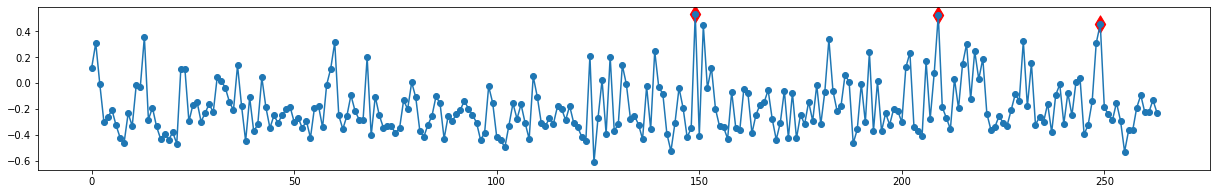

In [208]:
fig = plt.figure(figsize=[21,3])
plt.plot([_[2] for _ in dist_res], 'o-')

dist_only = np.array([_[2] for _ in dist_res])
ind = np.argpartition(dist_only, -3)[-3:]

plt.scatter(ind, dist_only[ind], 150, marker='d', color='r')

# plt.yscale('log')

In [209]:
ind

array([249, 209, 149])

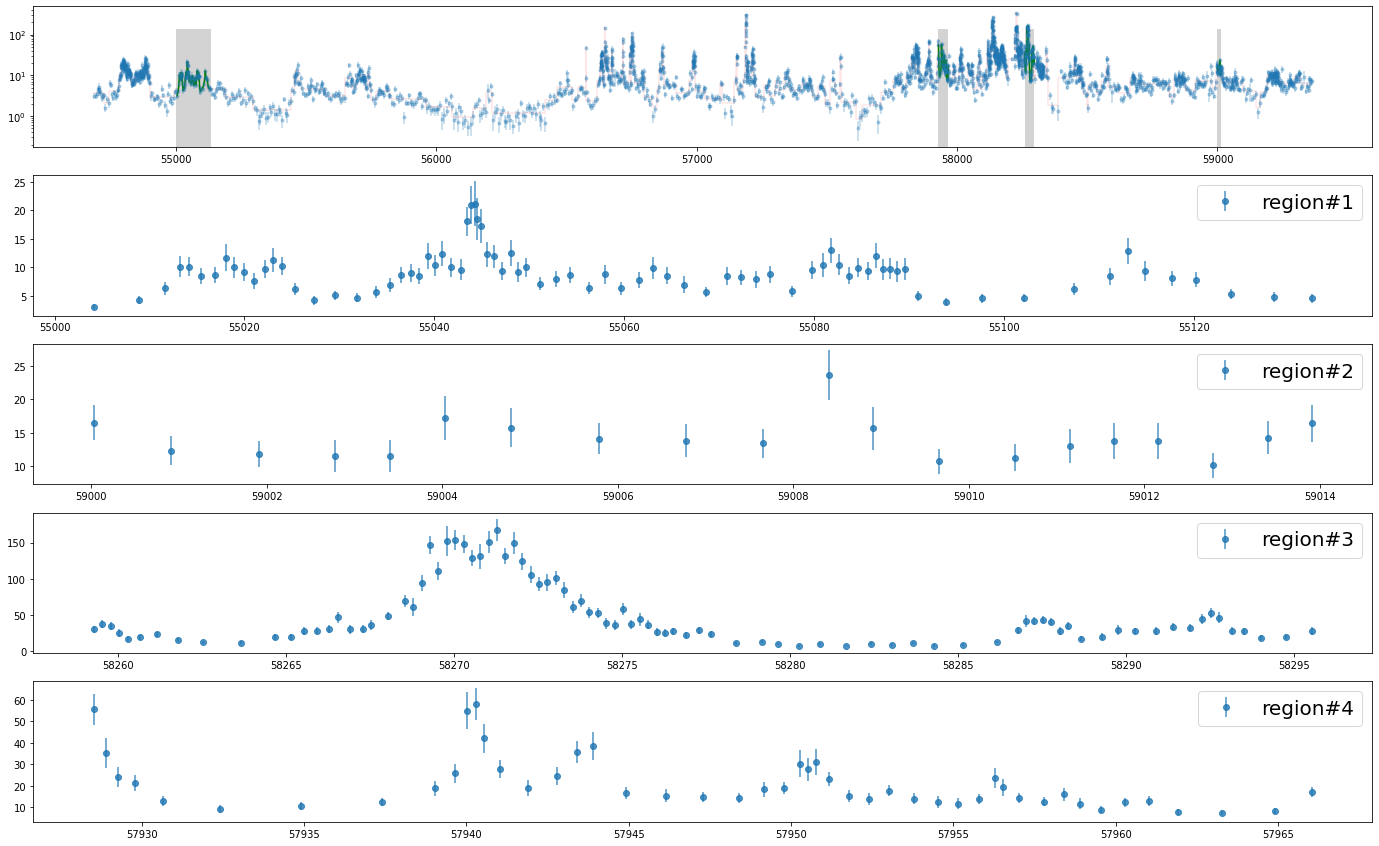

In [210]:
fig,axes = plt.subplots(figsize=[24, 15], nrows=5)

ax = axes[0]
ax.errorbar(data[:, 1], data[:, 2], marker='.', yerr=data[:, 3], ls='none', alpha=0.3)
ax.plot(xx_, yy_, '-', color='r', alpha=0.1)
ax.set_yscale('log')


ii=0
for region in regions[:1]:
    regx1,regx2 = region
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)
    
    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')
    
    ii+=1
    axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'region#{ii}')
    axes[ii].legend(fontsize=20)
    
for indd in ind:
    regx1,regx2, _ = dist_res[indd]
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)
    
    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')
    
    ii+=1
    axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'region#{ii}')
    axes[ii].legend(fontsize=20)
    

plt.show()

## correlation

In [211]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def splinify_two_scaled(x1,y1,x2,y2, **kwargs):
    x1_ = NormalizeData(x1)
    x2_ = NormalizeData(x2)
    y1_ = NormalizeData(y1)
    y2_ = NormalizeData(y2)
    
    s1 = interpolate.InterpolatedUnivariateSpline(x1_, y1_, **kwargs)
    s2 = interpolate.InterpolatedUnivariateSpline(x2_, y2_, **kwargs)
    
    pts = sorted(np.concatenate([x1_, x2_]))
    
    return pts, s1(pts), s2(pts)

CPU times: user 4min 36s, sys: 1.96 s, total: 4min 38s
Wall time: 4min 38s


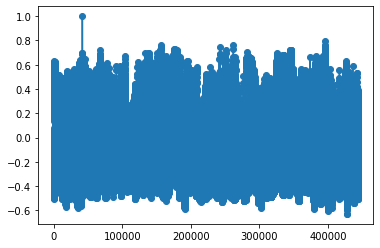

In [260]:
%%time

MAX_TIME_SPEEDUP = 3.
MIN_TIME_SPEEDUP = 0.4

motif_x = region_pts[0][0]
motif_y = region_pts[0][1]

motif_len = len(motif_x)
MIN_P_LEN = int(motif_len*MIN_TIME_SPEEDUP)
MAX_P_LEN = int(motif_len*MAX_TIME_SPEEDUP)

dist_res = []
for i, pos in enumerate(x):
    for j, pos2 in enumerate(x[i+MIN_P_LEN:i+MAX_P_LEN]):
        
        mask = (x>pos)&(x<=pos2)
        x_cand = x[mask]
        y_cand = y[mask]
        
        px,py1,py2 = splinify_two_scaled(motif_x, motif_y, x_cand, y_cand)
        
        cor, pval = stats.pearsonr(py1,py2)
        
        dist_res.append([pos, pos2, cor, pval, px,py1,py2])
        
plt.plot([_[2] for _ in dist_res], 'o-')

In [261]:
len(dist_res)

443976

CPU times: user 2min 45s, sys: 399 ms, total: 2min 45s
Wall time: 2min 45s


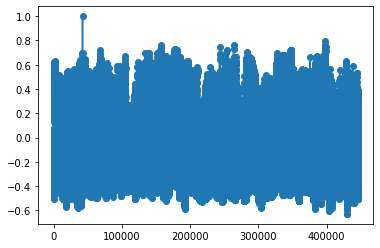

In [268]:
%%time

MAX_TIME_SPEEDUP = 3.
MIN_TIME_SPEEDUP = 0.4

motif_x = region_pts[0][0]
motif_y = region_pts[0][1]

x_len = len(x)

motif_len = len(motif_x)
MIN_P_LEN = int(motif_len*MIN_TIME_SPEEDUP)
MAX_P_LEN = int(motif_len*MAX_TIME_SPEEDUP)

x1_ = NormalizeData(motif_x)
y1_ = NormalizeData(motif_y)
s1 = interpolate.InterpolatedUnivariateSpline(x1_, y1_)

dist_res = []
for i in range(len(x)):
    for j in range(i+MIN_P_LEN, min(x_len,i+MAX_P_LEN+1)):  

        x_cand = x[i:j]
        y_cand = y[i:j]

        x2_ = NormalizeData(x_cand)
        y2_ = NormalizeData(y_cand)
        s2 = interpolate.InterpolatedUnivariateSpline(x2_, y2_)

        pts = np.concatenate([x1_, x2_])

        px,py1,py2 = pts, s1(pts), s2(pts)

        cor, pval = stats.pearsonr(py1,py2)

        dist_res.append([i, j, cor, pval, px,py1,py2])
        
plt.plot([_[2] for _ in dist_res], 'o-')

(0.5, 1.1)

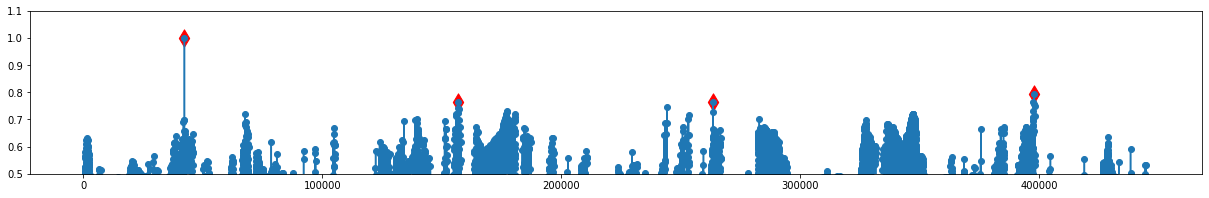

In [269]:
fig = plt.figure(figsize=[21,3])
plt.plot([_[2] for _ in dist_res], 'o-')

dist_only = np.array([_[2] for _ in dist_res])
ind = np.argpartition(dist_only, -4)[-4:]

plt.scatter(ind, dist_only[ind], 150, marker='d', color='r')

# plt.yscale('log')
plt.ylim(0.5, 1.1)

In [220]:
ind

array([262143,  41856, 156018, 395833])

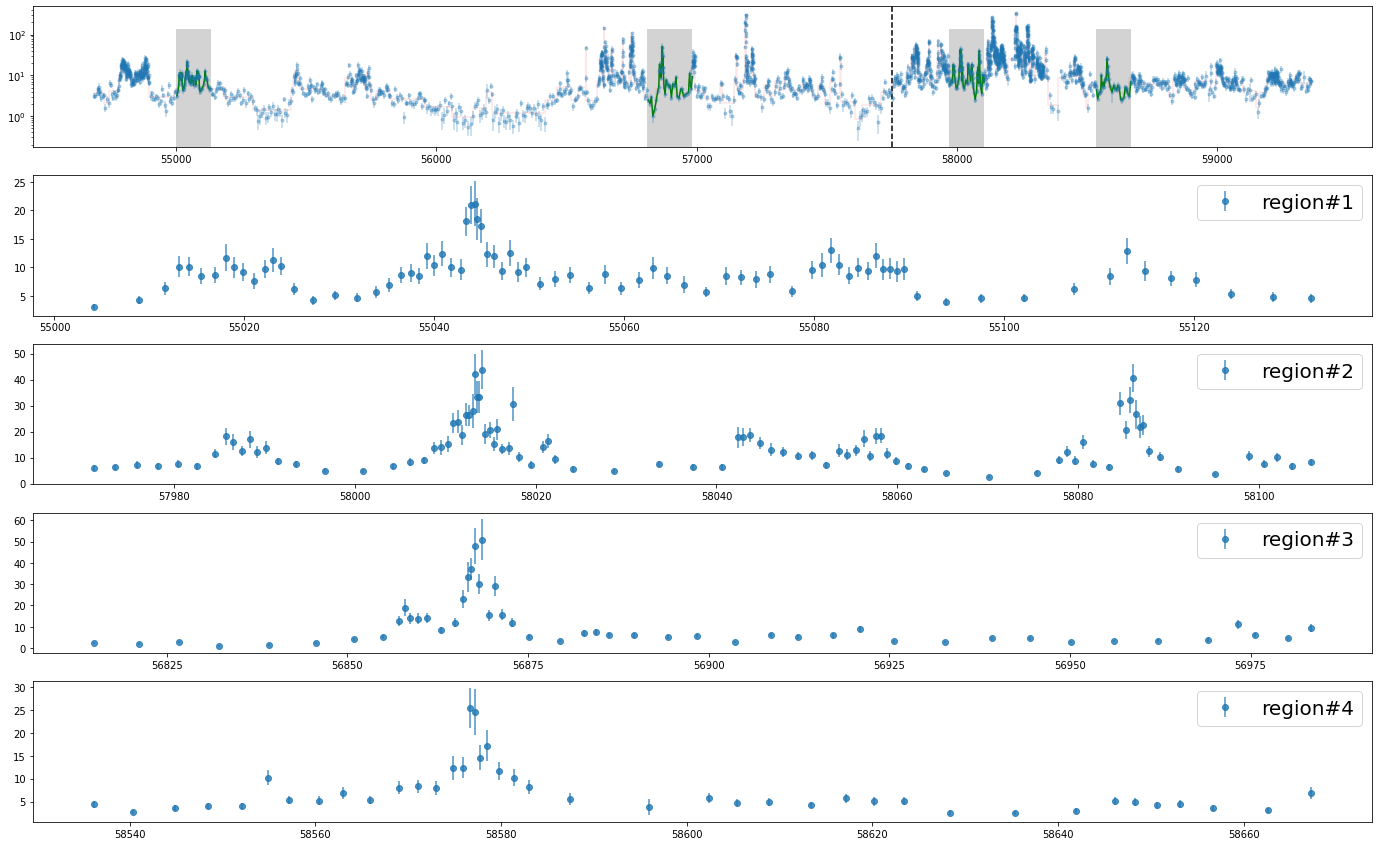

In [238]:
fig,axes = plt.subplots(figsize=[24, 15], nrows=5)

ax = axes[0]
ax.errorbar(data[:, 1], data[:, 2], marker='.', yerr=data[:, 3], ls='none', alpha=0.3)
ax.plot(xx_, yy_, '-', color='r', alpha=0.1)
ax.set_yscale('log')
ax.axvline(x=57750, ls='--', color='k')

ii=0
for region in regions[:1]:
    regx1,regx2 = region
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)
    
    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')
    
    ii+=1
    axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'region#{ii}')
    axes[ii].legend(fontsize=20)
    
for indd in [262143,  156018, 395833]:
    regx1,regx2 = dist_res[indd][0], dist_res[indd][1]
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)
    
    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')
    
    ii+=1
    axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'region#{ii}')
    axes[ii].legend(fontsize=20)
    

plt.show()

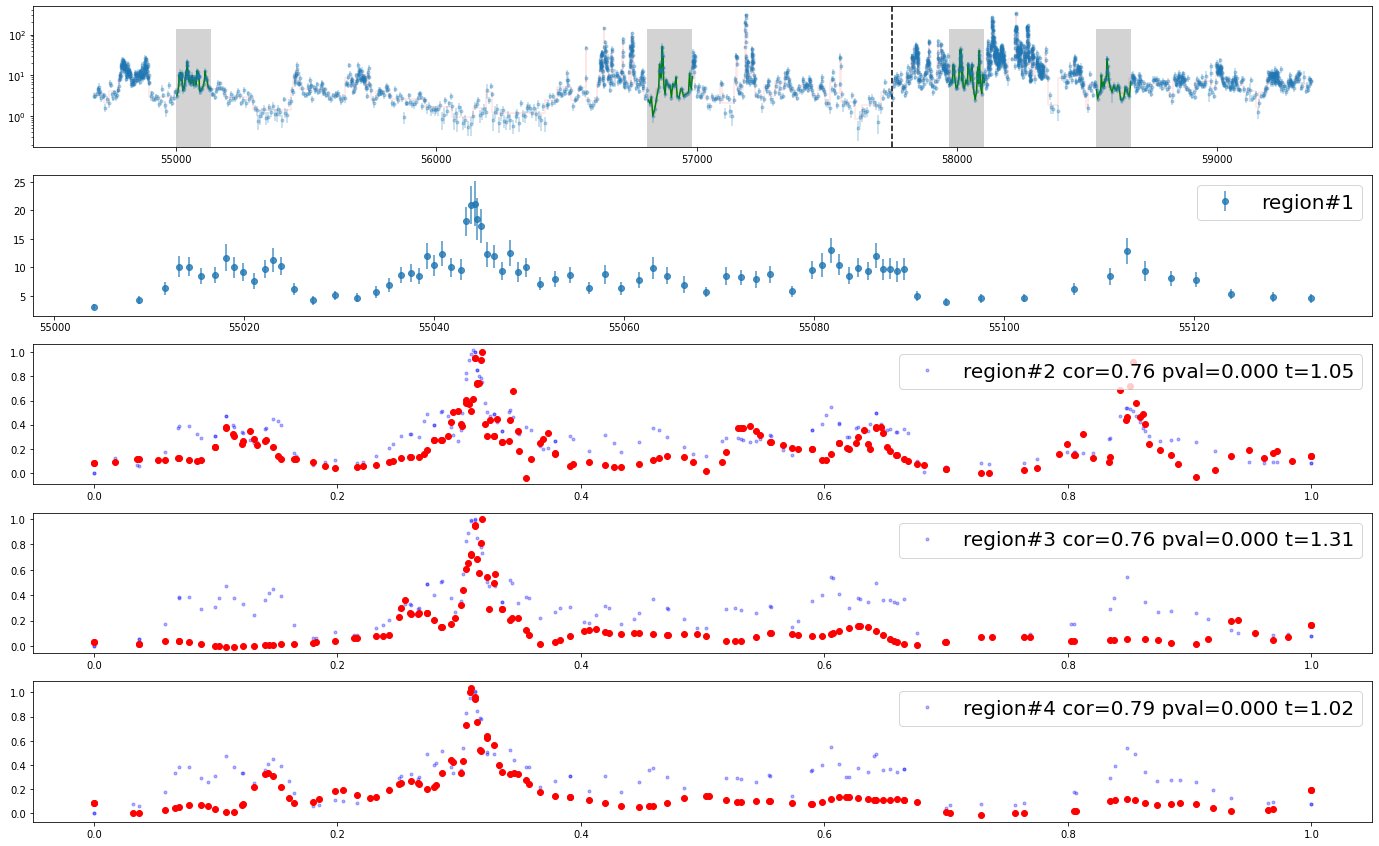

In [237]:
fig,axes = plt.subplots(figsize=[24, 15], nrows=5)

ax = axes[0]
ax.errorbar(data[:, 1], data[:, 2], marker='.', yerr=data[:, 3], ls='none', alpha=0.3)
ax.plot(xx_, yy_, '-', color='r', alpha=0.1)
ax.set_yscale('log')

ax.axvline(x=57750, ls='--', color='k')

ii=0
for region in regions[:1]:
    regx1,regx2 = region
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)
    
    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')
    
    delta_T_orig = np.max(x[mask]) - np.min(x[mask])
    
    ii+=1
    axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'region#{ii}')
    axes[ii].legend(fontsize=20)
    
for indd in [262143,  156018, 395833]:
    regx1,regx2, cor, pval, px,py1,py2 = dist_res[indd]
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)
    
    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')
    
    delta_T_new = np.max(x[mask]) - np.min(x[mask])
    speedup = delta_T_new/delta_T_orig
    
    ii+=1
    axes[ii].plot(px, py1,'.',color='b', label=f'region#{ii} cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
    axes[ii].plot(px, py2,'o',color='r')
    axes[ii].legend(fontsize=20)
    

plt.show()

# test on new blazar

In [2]:
!head /mnt/sdb2/science/blazars/gamma_adaptive/tmp/pks1510_adaptive.dat

0   54686.156032   1.17380   0.38554
1   54693.156032   1.71460   0.37146
2   54698.406032   4.94790   0.67826
3   54701.656032   5.38470   0.75654
4   54704.906032   4.06660   0.63434
5   54707.781032   5.47380   0.86009
6   54709.781032   6.13100   0.98906
7   54711.531032   6.96130   1.09420
8   54712.781032   10.66100   1.83900
9   54713.906032   8.33970   1.23080


In [3]:
data = np.loadtxt('/mnt/sdb2/science/blazars/gamma_adaptive/tmp/pks1510_adaptive.dat')
x,y,yerr = data[:,1], data[:,2], data[:,3]

In [4]:
len(data), data.shape

(2220, (2220, 4))

(array([1.488e+03, 2.770e+02, 1.740e+02, 2.530e+02, 6.000e+00, 1.000e+01,
        3.000e+00, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([ 0.25 ,  2.075,  3.9  ,  5.725,  7.55 ,  9.375, 11.2  , 13.025,
        14.85 , 16.675, 18.5  ]),
 <BarContainer object of 10 artists>)

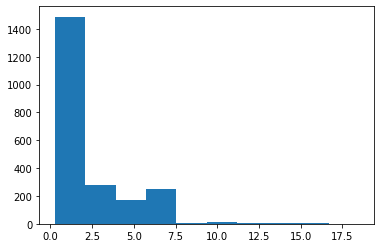

In [5]:
plt.hist(np.diff(x))

<ErrorbarContainer object of 3 artists>

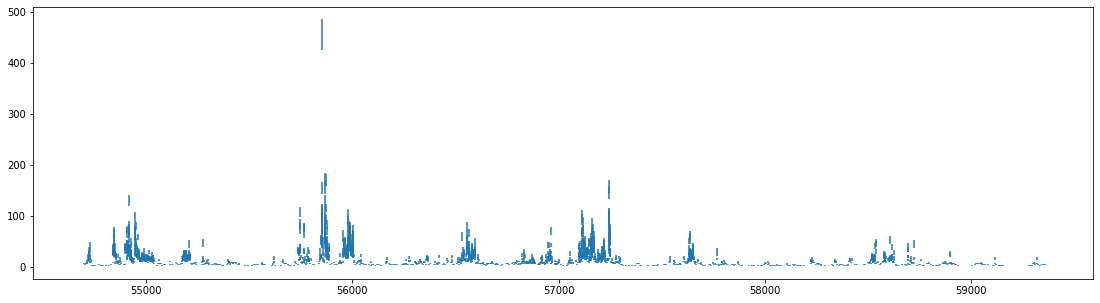

In [6]:
fig = plt.figure(figsize=[19, 5])
plt.errorbar(data[:, 1], data[:, 2], yerr=data[:, 3], ls='none')

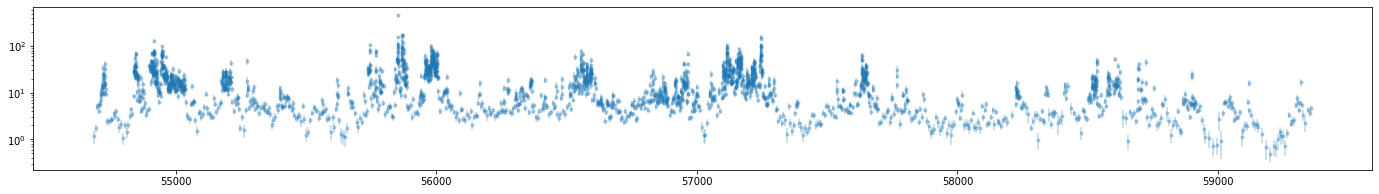

In [7]:
fig = plt.figure(figsize=[24, 3])

# region 1 55002 ≤ MJD ≤ 55134
# region 2 55671.9 ≤ MJD ≤ 55755.4
# region 3 57280.0 ≤ MJD ≤ 57515.7
# region 4 56630.1 < 𝑀𝐽𝐷 < 56682.7

plt.errorbar(data[:, 1], data[:, 2], marker='.', yerr=data[:, 3], ls='none', alpha=0.3)
# plt.plot(xx_, yy_, '-', color='r')
plt.yscale('log')
plt.show()

In [10]:
xx_, yy_, edges = blockify(x,y,yerr, fitness='measures', p0=0.05)

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


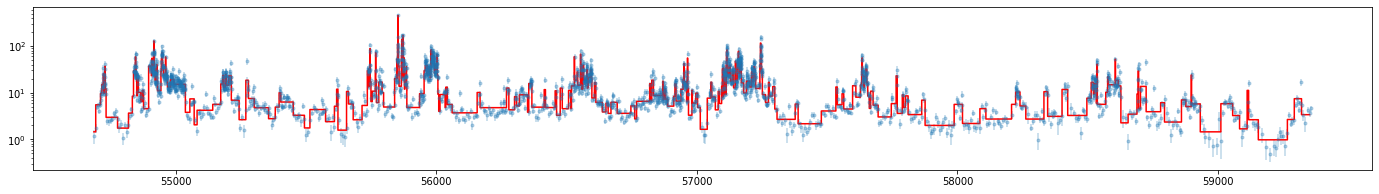

In [11]:
fig = plt.figure(figsize=[24, 3])

plt.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
plt.plot(xx_, yy_, '-', color='r')
plt.yscale('log')
plt.show()

In [ ]:
from multiprocessing import Process, Manager


start = time.time()

MAX_PATTERN_LEN = 300
MIN_PATTERN_LEN = 100
MAX_TIME_SPEEDUP = 3.
MIN_TIME_SPEEDUP = 0.4
CORR_LIM = 0.8
x_len = len(x)
PROC_NUM = 10


works = []
for ind_edge in range(len(edges)):
    for ind2_edge in range(ind_edge+1, len(edges)):
        mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
        motif_x = x[mask]
        
        if len(motif_x) > MAX_PATTERN_LEN or len(motif_x) < MIN_PATTERN_LEN:
            continue
            
        works.append([ind_edge, ind2_edge])


def dothing(L, i_):  # the managed list `L` passed explicitly.
    for (ind_edge, ind2_edge) in i_:
        mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
        motif_x = x[mask]
        motif_y = y[mask]

        motif_len = len(motif_x)
        MIN_P_LEN = int(motif_len*MIN_TIME_SPEEDUP)
        MAX_P_LEN = int(motif_len*MAX_TIME_SPEEDUP)

        x1_ = NormalizeData(motif_x)
        y1_ = NormalizeData(motif_y)
        s1 = interpolate.InterpolatedUnivariateSpline(x1_, y1_)

        dist_res = []
        iter_time = time.time()
        for i in range(len(x)):
            for j in range(i+MIN_P_LEN, min(x_len,i+MAX_P_LEN+1)):  

                if mask[i:j].any():
                    continue

                x_cand = x[i:j]
                y_cand = y[i:j]

                x2_ = NormalizeData(x_cand)
                y2_ = NormalizeData(y_cand)
                s2 = interpolate.InterpolatedUnivariateSpline(x2_, y2_)

                pts = np.concatenate([x1_, x2_])

                px,py1,py2 = pts, s1(pts), s2(pts)

                cor, pval = stats.pearsonr(py1,py2)

                if cor > CORR_LIM and pval < 0.05 and cor < 0.99:
                    dist_res.append([i, j, cor, pval, px,py1,py2])

        L.append([ind_edge, ind2_edge, dist_res])
        print(f'resLen: {len(dist_res)}')
        print(f'{edges[ind_edge]} --- {edges[ind2_edge]}')
        print('-*_'*50)

def chunks(xs, n):
    n = max(1, n)
    return list(xs[i:i+n] for i in range(0, len(xs), n))                 

res = {}
with Manager() as manager:
    start = time.time()
    L = manager.list()  # <-- can be shared between processes.
    processes = []
    chnks_ = chunks(works, int(len(works)//PROC_NUM))
    for i in range(PROC_NUM):
        p = Process(target=dothing, args=(L,chnks_[i]))  # Passing the list
        p.start()
        processes.append(p)
    for p in processes:
        p.join()
    print(len(L))
    
    
    for vv in L:
        ind_edge, ind2_edge, dist_res = vv
        res[str(edges[ind_edge]) + '_' + str(edges[ind2_edge])] = dist_res
        
    print(time.time() - start)

In [361]:
import pickle

with open('/mnt/sdb2/science/blazars/gamma_adaptive/tmp/results/res.pkl', 'wb') as f:
    pickle.dump(res, f)
        
# with open('saved_dictionary.pkl', 'rb') as f:
#     loaded_dict = pickle.load(f)

In [310]:
start = time.time()

MAX_PATTERN_LEN = 300
MIN_PATTERN_LEN = 100
MAX_TIME_SPEEDUP = 3.
MIN_TIME_SPEEDUP = 0.4
CORR_LIM = 0.8
x_len = len(x)

res = {}
for ind_edge in range(len(edges)):
    for ind2_edge in range(ind_edge+1, len(edges)):
        mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
        motif_x = x[mask]
        
        if len(motif_x) > MAX_PATTERN_LEN or len(motif_x) < MIN_PATTERN_LEN:
            continue
            
        motif_y = y[mask]

        motif_len = len(motif_x)
        MIN_P_LEN = int(motif_len*MIN_TIME_SPEEDUP)
        MAX_P_LEN = int(motif_len*MAX_TIME_SPEEDUP)

        x1_ = NormalizeData(motif_x)
        y1_ = NormalizeData(motif_y)
        s1 = interpolate.InterpolatedUnivariateSpline(x1_, y1_)

        dist_res = []
        iter_time = time.time()
        for i in range(len(x)):
            for j in range(i+MIN_P_LEN, min(x_len,i+MAX_P_LEN+1)):  
                
                if mask[i:j].any():
                    continue
                
                x_cand = x[i:j]
                y_cand = y[i:j]

                x2_ = NormalizeData(x_cand)
                y2_ = NormalizeData(y_cand)
                s2 = interpolate.InterpolatedUnivariateSpline(x2_, y2_)

                pts = np.concatenate([x1_, x2_])

                px,py1,py2 = pts, s1(pts), s2(pts)

                cor, pval = stats.pearsonr(py1,py2)
                
                if cor > CORR_LIM and pval < 0.05 and cor < 0.99:
                    dist_res.append([i, j, cor, pval, px,py1,py2])
        
        res[str(edges[ind_edge]) + '_' + str(edges[ind2_edge])] = dist_res
        print(time.time() - iter_time)
        print(f'resLen: {len(dist_res)}')
        print(f'{edges[ind_edge]} --- {edges[ind2_edge]}')
        print('-*_'*50)

print('Finish:')
print(time.time() - start)

200.0231122970581
resLen: 2
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
212.12440085411072
resLen: 2
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
227.52684330940247
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
235.70269870758057
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
244.01844143867493
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
283.28127241134644
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_

537.9357757568359
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
590.0724129676819
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
209.69578051567078
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
215.98422122001648
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
229.89641213417053
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
266.3555247783661
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*

205.31584787368774
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
243.57283997535706
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
254.4070541858673
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
260.3299050331116
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
264.4653036594391
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
288.9846303462982
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_

304.69713401794434
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
315.9241554737091
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
338.77061223983765
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
346.83452129364014
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
360.657986164093
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
377.334627866745
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-

417.65352487564087
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
449.14823293685913
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
479.3689205646515
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
527.0132555961609
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
208.5165660381317
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
220.61553764343262
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*

257.92497515678406
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
267.42328786849976
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
289.8124577999115
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
294.29472637176514
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
305.13176107406616
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
325.81058073043823
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_

216.3666090965271
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
225.35708022117615
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
251.30559396743774
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
257.27113246917725
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
271.2831463813782
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
290.7026786804199
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*

433.970263004303
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
537.742761850357
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
547.2116684913635
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
557.4534661769867
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
560.7040510177612
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
576.1837892532349
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-

286.3124577999115
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
313.42666363716125
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
348.6448493003845
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
399.98368096351624
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
509.32787585258484
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
515.2886476516724
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*

224.81264638900757
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
249.80337476730347
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
254.22904229164124
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
283.0551223754883
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
314.38368129730225
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
364.1637065410614
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-

554.3823873996735
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
193.69650506973267
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
216.8874111175537
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
219.9664556980133
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
251.87024116516113
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
286.9392321109772
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_

519.8735995292664
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
534.211567401886
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
189.58743143081665
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
220.057692527771
resLen: 8
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
269.8749716281891
resLen: 5
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
387.42519426345825
resLen: 0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*

KeyboardInterrupt: 

In [311]:
len(res)

519

In [312]:
import pickle

with open('saved_dictionary.pkl', 'wb') as f:
    pickle.dump(res, f)
        
# with open('saved_dictionary.pkl', 'rb') as f:
#     loaded_dict = pickle.load(f)

In [13]:
import pickle

with open('/mnt/sdb2/science/blazars/q1156_full_results/res.pkl', 'rb') as f:
    res = pickle.load(f)

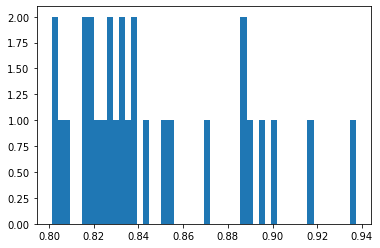

In [302]:
all_res = []
for k,v in res.items():
    for vv in v:
        pos, pos2, cor, pval, px,py1,py2 = vv
        all_res.append(cor)
    
plt.hist(all_res, bins=50)
plt.show()

In [305]:
all_res = []
for k,v in res.items():
    print('-'*30)
    for vv in v:
        pos, pos2, cor, pval, px,py1,py2 = vv
        if cor> 0.8:
            print(k, pos, pos2)

------------------------------
54686.156032_54877.656032 0 103
54686.156032_54877.656032 1 101
54686.156032_54877.656032 2 100
54686.156032_54877.656032 2 101
54686.156032_54877.656032 3 100
54686.156032_54877.656032 1610 1672
54686.156032_54877.656032 1611 1672
------------------------------
54686.156032_54897.781032 1611 1674
54686.156032_54897.781032 1612 1674
------------------------------
54686.156032_54906.718532 0 118
54686.156032_54906.718532 0 119
54686.156032_54906.718532 0 120
54686.156032_54906.718532 0 121
54686.156032_54906.718532 0 122
54686.156032_54906.718532 0 123
54686.156032_54906.718532 1 115
54686.156032_54906.718532 1 116
54686.156032_54906.718532 3 113
------------------------------
54686.156032_54908.593532 1 116
54686.156032_54908.593532 1 117
54686.156032_54908.593532 1 119
54686.156032_54908.593532 1 120
54686.156032_54908.593532 2 114
------------------------------
54686.156032_54909.968532 1 120
54686.156032_54909.968532 1 121
54686.156032_54909.968532 1 1

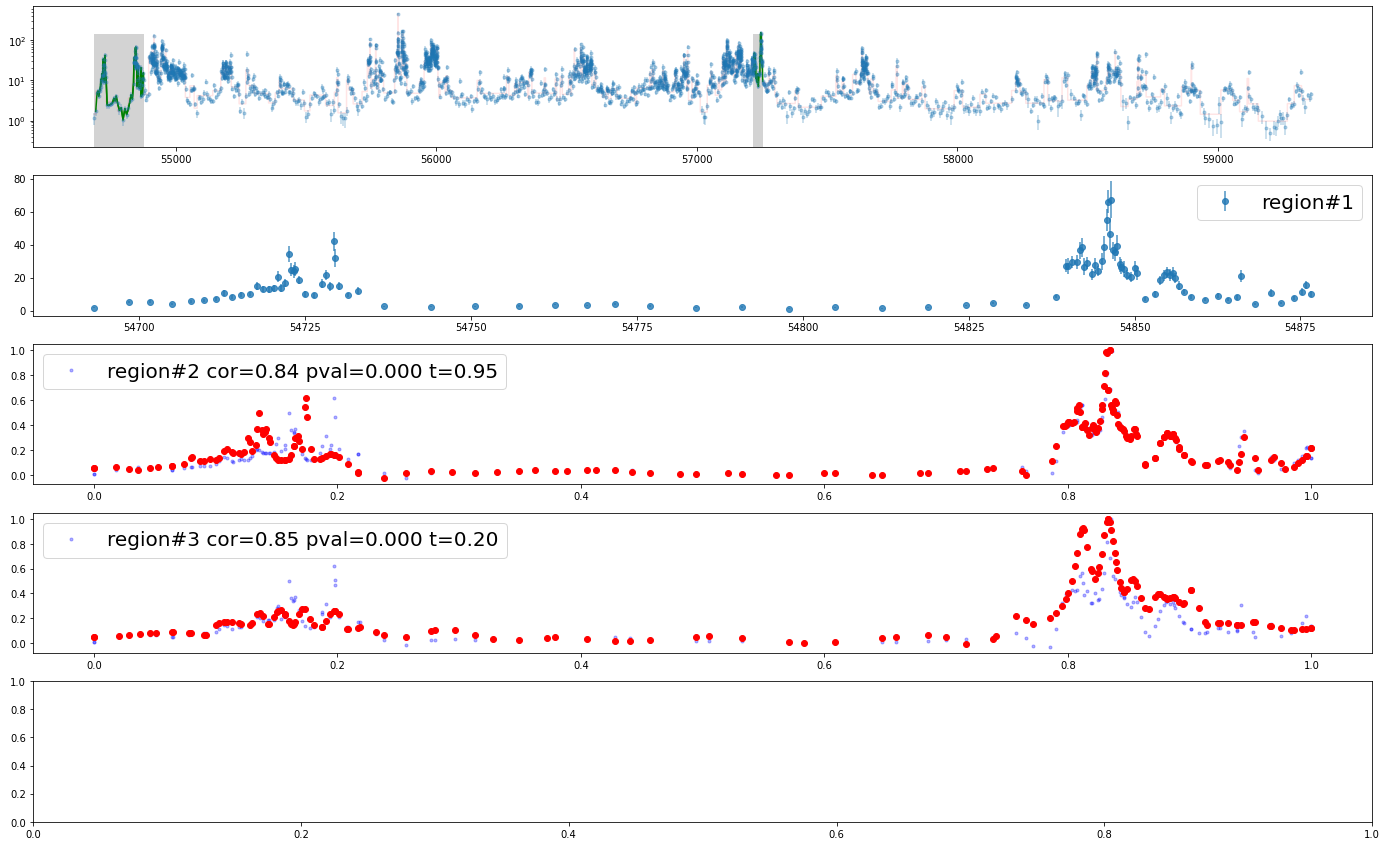

In [307]:
fig,axes = plt.subplots(figsize=[24, 15], nrows=5)

ax = axes[0]
ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
ax.plot(xx_, yy_, '-', color='r', alpha=0.1)
ax.set_yscale('log')


ii=0
for region in regions[:1]:
    regx1,regx2 = 54686.156032, 54877.656032
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)
    
    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')
    
    delta_T_orig = np.max(x[mask]) - np.min(x[mask])
    
    ii+=1
    axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'region#{ii}')
    axes[ii].legend(fontsize=20)

dist_res = res['54686.156032_54877.656032']
for indd in [3, -1]:
    i, j, cor, pval, px,py1,py2 = dist_res[indd]
    regx1, regx2 = x[i], x[j]
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
    ax.add_patch(rect)
    
    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')
    
    delta_T_new = np.max(x[mask]) - np.min(x[mask])
    speedup = delta_T_new/delta_T_orig
    
    ii+=1
    axes[ii].plot(px, py1,'.',color='b', label=f'region#{ii} cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
    axes[ii].plot(px, py2,'o',color='r')
    axes[ii].legend(fontsize=20)
    

plt.show()

In [321]:
rrr = 0
for k,v in res.items():
    if len(v) == 0:
        continue
        
    num_sim = len(v)

    fig,axes = plt.subplots(figsize=[24, 3*(2*num_sim+2)], nrows=2*num_sim+2)

    ax = axes[0]
    ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
    ax.plot(xx_, yy_, '-', color='r', alpha=0.3)
    ax.set_yscale('log')


    regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='yellow', alpha=0.3)
    ax.add_patch(rect)

    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')

    delta_T_orig = np.max(x[mask]) - np.min(x[mask])

    ii=1
    axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'refsample', color='g')
    axes[ii].legend(fontsize=20)
    
    # sort by corr number
    dist_res = sorted(v, key= lambda l: l[2], reverse=True)
    
    # plot only top-5 results
    for indd in range(min(num_sim, 5)):
        i, j, cor, pval, px,py1,py2 = dist_res[indd]
        regx1, regx2 = x[i], x[j]
        rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
        ax.add_patch(rect)

        mask = (x>regx1)&(x<=regx2)
        ii+=1
        axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'pattern#{indd} ({regx1}-{regx2})', color='m')
        axes[ii].legend(fontsize=16)

        delta_T_new = np.max(x[mask]) - np.min(x[mask])
        speedup = delta_T_new/delta_T_orig

        ii+=1
        axes[ii].plot(px, py1,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
        axes[ii].plot(px, py2,'o',color='r')
        axes[ii].legend(fontsize=20)
    
    plt.suptitle(f'i={rrr}, num={num_sim}')
    plt.savefig(f'/mnt/sdb2/science/blazars/gamma_adaptive/tmp/results/{rrr}.png', bbox_inches='tight')
    plt.close(fig)
    rrr+=1
#     break

In [326]:
np.argwhere(edges == 55184.218532)

array([[53]])

## multiprocess

In [14]:
!head /mnt/sdb2/science/blazars/q1156_full.dat

# start[s]     end[s]      leng[d]       flux      sigma      TS     Upper      rc       start[mjd]  center[mjd]  end[mjd]
239557417.49   240335017.49    9.00    5.5780e-08    2.3278e-08     15.713   0   0  54682.65604  54687.15604  54691.65604
240335017.49   241026217.49    8.00    7.1678e-08    2.3718e-08     21.991   0   0  54691.65604  54695.65604  54699.65604
241026217.49   241631017.49    7.00    7.1711e-08    2.3155e-08     22.559   0   0  54699.65604  54703.15604  54706.65604
# 241631017.49   241933417.49    3.50    1.6619e-07    3.7875e-08     51.301   0   0  54706.65604  54708.40604  54710.15604
# 241933417.49   242538217.49    7.00    5.8132e-08    1.7973e-08     23.835   0   0  54710.15604  54713.65604  54717.15604
241631017.49   241933417.49    3.50    1.6619e-07    3.7875e-08     51.301   0   0  54706.65604  54708.40604  54710.15604
241933417.49   242538217.49    7.00    5.8132e-08    1.7973e-08     23.835   0   0  54710.15604  54713.65604  54717.15604
242538217.49   2427

In [15]:
!head /mnt/sdb2/science/blazars/gamma_adaptive/pks1222/pks1222_adaptive.dat

0   54689.156032   0.28576   0.14147
1   54699.156032   0.51961   0.21497
2   54712.406032   0.32025   0.10371
3   54725.656032   1.50370   0.28185
4   54732.656032   0.50410   0.20818
5   54741.156032   0.43970   0.18653
6   54749.656032   0.63091   0.25020
7   54791.156032   0.38174   0.14742
8   54807.156032   0.38899   0.14714
9   54818.656032   0.52246   0.21118


In [16]:
# data = np.loadtxt('/mnt/sdb2/science/blazars/gamma_adaptive/pks1222/pks1222_adaptive.dat')
# x,y,yerr = data[:,1], data[:,2], data[:,3]

data = np.loadtxt('/mnt/sdb2/science/blazars/q1156_full.dat')
x,y,yerr = data[:,8], data[:,3], data[:,4]

In [17]:
len(data), data.shape

(2065, (2065, 11))

(array([1603.,  139.,  238.,   21.,   14.,    9.,   10.,    5.,    3.,
          22.]),
 array([ 0.25 ,  3.225,  6.2  ,  9.175, 12.15 , 15.125, 18.1  , 21.075,
        24.05 , 27.025, 30.   ]),
 <BarContainer object of 10 artists>)

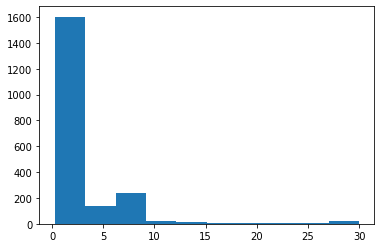

In [18]:
plt.hist(np.diff(x))

<ErrorbarContainer object of 3 artists>

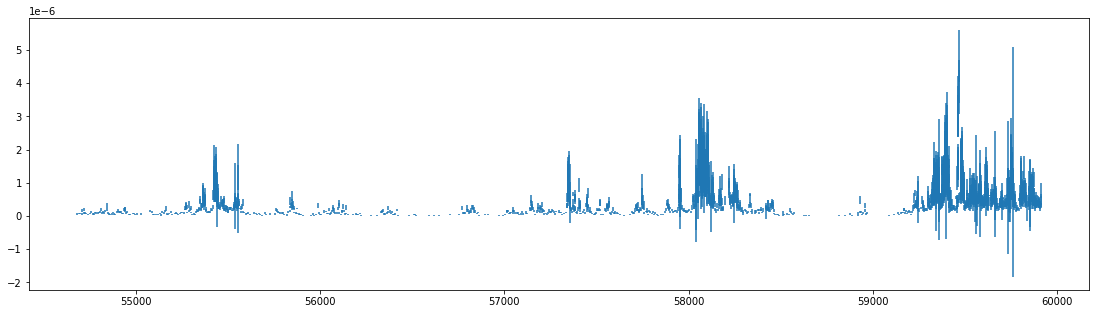

In [100]:
fig = plt.figure(figsize=[19, 5])
plt.errorbar(x, y, yerr=yerr, ls='none')

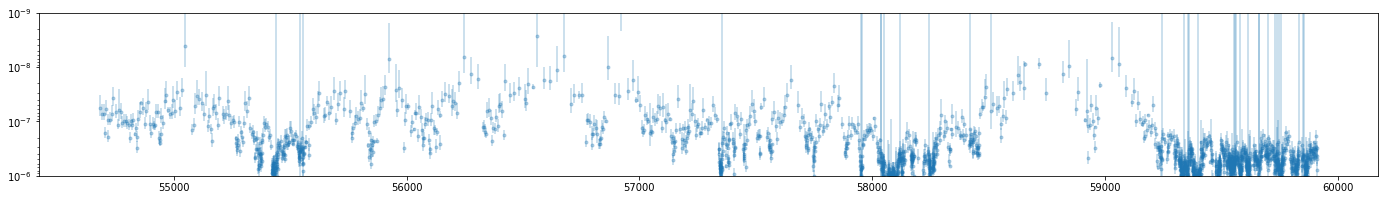

In [101]:
fig = plt.figure(figsize=[24, 3])


plt.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
# plt.plot(xx_, yy_, '-', color='r')
plt.ylim(1e-6, 1e-9)
plt.yscale('log')
plt.show()

In [19]:
xx_, yy_, edges = blockify(x,y,yerr, fitness='measures', p0=0.05)

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


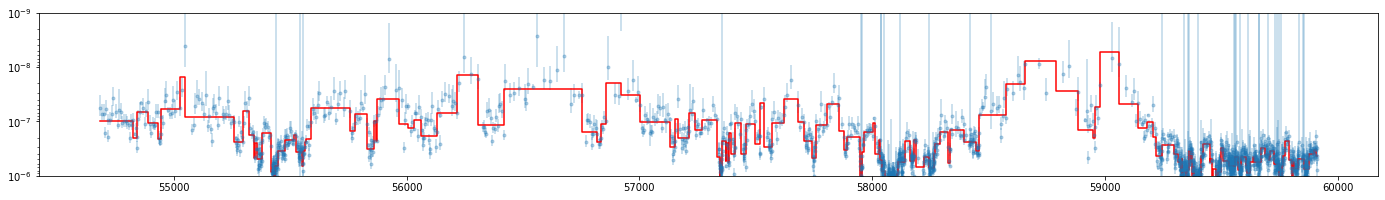

In [20]:
fig = plt.figure(figsize=[24, 3])

plt.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
plt.plot(xx_, yy_, '-', color='r')
plt.yscale('log')
plt.ylim(1e-6, 1e-9)
plt.show()

In [129]:
from multiprocessing import Process, Manager


start = time.time()

MAX_PATTERN_LEN = 300
MIN_PATTERN_LEN = 100
MAX_TIME_SPEEDUP = 3.
MIN_TIME_SPEEDUP = 0.4
CORR_LIM = 0.8
x_len = len(x)


works = []
for ind_edge in range(len(edges)):
    for ind2_edge in range(ind_edge+1, len(edges)):
        mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
        motif_x = x[mask]
        
        if len(motif_x) > MAX_PATTERN_LEN or len(motif_x) < MIN_PATTERN_LEN:
            continue
        
        # !!!!!!!!!!!!!!!!!!!!!!!!!!
        # MIN_TIME_SPEEDUP and MAX_TIME_SPEEDUP are not correctly evaluated
        # !!!!!!!!!!!!!!!!!!!!!!!!!!
            
        works.append([ind_edge, ind2_edge])


def dothing(L, i_):  # the managed list `L` passed explicitly.
    for (ind_edge, ind2_edge) in i_:
        mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
        motif_x = x[mask]
        motif_y = y[mask]

        motif_len = len(motif_x)
        MIN_P_LEN = int(motif_len*MIN_TIME_SPEEDUP)
        MAX_P_LEN = int(motif_len*MAX_TIME_SPEEDUP)

        x1_ = NormalizeData(motif_x)
        y1_ = NormalizeData(motif_y)
        s1 = interpolate.InterpolatedUnivariateSpline(x1_, y1_)

        dist_res = []
        iter_time = time.time()
        for i in range(len(x)):
            for j in range(i+MIN_P_LEN, min(x_len,i+MAX_P_LEN+1)):  

                if mask[i:j].any():
                    continue

                x_cand = x[i:j]
                y_cand = y[i:j]

                x2_ = NormalizeData(x_cand)
                y2_ = NormalizeData(y_cand)
                s2 = interpolate.InterpolatedUnivariateSpline(x2_, y2_)

                pts = np.concatenate([x1_, x2_])

                px,py1,py2 = pts, s1(pts), s2(pts)

                cor, pval = stats.pearsonr(py1,py2)

                if cor > CORR_LIM and pval < 0.05 and cor < 0.99:
                    dist_res.append([i, j, cor, pval, px,py1,py2])

        L.append([ind_edge, ind2_edge, dist_res])
        print(f'resLen: {len(dist_res)}')
        print(f'{edges[ind_edge]} --- {edges[ind2_edge]}')
        print('-*_'*50)

def chunks(xs, n):
    n = max(1, n)
    return list(xs[i:i+n] for i in range(0, len(xs), n))                 

res = {}
with Manager() as manager:
    start = time.time()
    L = manager.list()  # <-- can be shared between processes.
    processes = []
    chnks_ = chunks(works, 360)
    for i in range(8):
        p = Process(target=dothing, args=(L,chnks_[i]))  # Passing the list
        p.start()
        processes.append(p)
    for p in processes:
        p.join()
    print(len(L))
    
    
    for vv in L:
        ind_edge, ind2_edge, dist_res = vv
        res[str(edges[ind_edge]) + '_' + str(edges[ind2_edge])] = dist_res
        
    print(time.time() - start)

resLen: 0
54682.65604 --- 55347.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58060.78104 --- 58101.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 354
56420.40604 --- 57354.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55382.53104 --- 55565.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59367.15604 --- 59477.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 4
58336.40604 --- 59375.78104
-*_-*_-*_-*_-*_

resLen: 49
54682.65604 --- 55431.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56420.40604 --- 57397.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55780.65604 --- 56836.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59367.15604 --- 59533.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57344.40604 --- 57757.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58060.78104 --- 58179.53104
-*_-*_-*_-*_-*_-

resLen: 0
54682.65604 --- 55519.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55780.65604 --- 57170.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58060.78104 --- 58270.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57344.40604 --- 57956.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 2
55382.53104 --- 56032.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 11
58398.90604 --- 59360.53104
-*_-*_-*_-*_-*_-

resLen: 0
58398.90604 --- 59379.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59368.53104 --- 59533.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57344.40604 --- 58042.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58448.03104 --- 59295.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59373.78104 --- 59410.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58063.28104 --- 58179.53104
-*_-*_-*_-*_-*_-*

resLen: 0
55780.65604 --- 57373.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59373.78104 --- 59477.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54682.65604 --- 55780.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57346.65604 --- 57743.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58063.28104 --- 58289.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 39
55382.53104 --- 56859.90604
-*_-*_-*_-*_-*_-

resLen: 0
54682.65604 --- 55871.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58066.78104 --- 58142.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 236
56761.65604 --- 57355.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57346.65604 --- 57956.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 1
55420.90604 --- 55565.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 15
58448.03104 --- 59375.78104
-*_-*_-*_-*_-*

resLen: 0
57346.65604 --- 58032.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 19
58459.03104 --- 59328.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58066.78104 --- 58243.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56761.65604 --- 57441.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 3
55420.90604 --- 55860.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 546
54830.40604 --- 55435.28104
-*_-*_-*_-*_-*

resLen: 0
56761.65604 --- 57622.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 2
55420.90604 --- 56032.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 19
57346.65604 --- 58066.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54830.40604 --- 55529.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58066.78104 --- 58332.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 26
58459.03104 --- 59367.15604
-*_-*_-*_-*_-*_

resLen: 2
57354.28104 --- 57956.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55831.65604 --- 57241.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56761.65604 --- 57808.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58101.53104 --- 58289.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55420.90604 --- 56420.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57354.28104 --- 57964.90604
-*_-*_-*_-*_-*_-*

resLen: 24
55831.65604 --- 57354.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57354.28104 --- 58053.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56761.65604 --- 57956.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59396.78104 --- 59559.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 141
58576.90604 --- 59351.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58101.53104 --- 58459.03104
-*_-*_-*_-*_-*

resLen: 0
55831.65604 --- 57383.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 11
56823.15604 --- 57371.03104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 41
55431.78104 --- 55760.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59399.78104 --- 59533.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58101.53104 --- 58959.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54830.40604 --- 55876.15604
-*_-*_-*_-*_-*_

resLen: 3
55431.78104 --- 55973.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59410.90604 --- 59508.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 671
58671.90604 --- 59334.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58101.53104 --- 59208.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54830.40604 --- 56032.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56823.15604 --- 57501.40604
-*_-*_-*_-*_-*_

resLen: 123
57355.90604 --- 58066.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 120
54845.90604 --- 55446.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59410.90604 --- 59603.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56823.15604 --- 57685.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 10
58105.78104 --- 58332.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 13
58671.90604 --- 59373.78104
-*_-*_-*_-*

resLen: 0
54845.90604 --- 55557.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55860.15604 --- 56836.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56823.15604 --- 57865.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55431.78104 --- 56836.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 534
58801.90604 --- 59334.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55860.15604 --- 56859.90604
-*_-*_-*_-*_-*_

resLen: 0
57371.03104 --- 58053.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58105.78104 --- 58987.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58801.90604 --- 59373.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55431.78104 --- 57133.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55860.15604 --- 57241.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56823.15604 --- 57964.90604
-*_-*_-*_-*_-*_-*

resLen: 0
58898.40604 --- 59328.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57373.90604 --- 57947.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58105.78104 --- 59242.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58898.40604 --- 59329.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 570
56836.78104 --- 57354.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55435.28104 --- 55780.65604
-*_-*_-*_-*_-*_

resLen: 2
58898.40604 --- 59367.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59452.15604 --- 59571.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57373.90604 --- 58032.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55860.15604 --- 57383.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54845.90604 --- 56013.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56836.78104 --- 57410.53104
-*_-*_-*_-*_-*_-*

resLen: 0
58112.40604 --- 58671.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57379.90604 --- 57808.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59452.15604 --- 59637.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 482
54893.15604 --- 55435.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58898.40604 --- 59399.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55435.28104 --- 56420.40604
-*_-*_-*_-*_-*_

resLen: 0
58112.40604 --- 59072.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 2
58950.40604 --- 59360.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59459.65604 --- 59603.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54893.15604 --- 55553.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57379.90604 --- 58016.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55860.15604 --- 57622.40604
-*_-*_-*_-*_-*_-*

resLen: 0
59462.28104 --- 59533.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55871.40604 --- 57007.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58112.40604 --- 59295.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56836.78104 --- 57956.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 91
57379.90604 --- 58063.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59462.28104 --- 59559.65604
-*_-*_-*_-*_-*_-

resLen: 0
55435.28104 --- 57241.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55871.40604 --- 57271.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57383.65604 --- 57964.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54893.15604 --- 55860.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58142.65604 --- 58576.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56836.78104 --- 58032.65604
-*_-*_-*_-*_-*_-*

resLen: 0
59464.03104 --- 59559.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 51
55871.40604 --- 57355.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58142.65604 --- 58987.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55446.28104 --- 56013.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57383.65604 --- 58053.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58959.90604 --- 59396.78104
-*_-*_-*_-*_-*_-

resLen: 53
54934.65604 --- 55431.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55871.40604 --- 57397.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 51
58987.15604 --- 59349.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55446.28104 --- 56420.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58142.65604 --- 59242.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57397.90604 --- 57893.78104
-*_-*_-*_-*_-*_

resLen: 0
56859.90604 --- 57757.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58142.65604 --- 59329.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59477.53104 --- 59603.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54934.65604 --- 55553.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58987.15604 --- 59375.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57397.90604 --- 58032.65604
-*_-*_-*_-*_-*_-*

resLen: 0
58163.28104 --- 58801.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57410.53104 --- 57893.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55446.28104 --- 57170.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54934.65604 --- 55760.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 247
59072.65604 --- 59334.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55871.40604 --- 57685.90604
-*_-*_-*_-*_-*_

resLen: 0
56859.90604 --- 58030.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55876.15604 --- 57156.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 5
59072.65604 --- 59373.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58163.28104 --- 59145.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59483.03104 --- 59620.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57410.53104 --- 58042.28104
-*_-*_-*_-*_-*_-*

resLen: 0
57441.15604 --- 57947.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55478.28104 --- 56131.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59072.65604 --- 59410.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55876.15604 --- 57346.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 1
56936.40604 --- 57397.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54934.65604 --- 56013.15604
-*_-*_-*_-*_-*_-*

resLen: 0
59145.65604 --- 59367.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57441.15604 --- 58042.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58163.28104 --- 59334.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56936.40604 --- 57570.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55478.28104 --- 56836.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54934.65604 --- 56131.90604
-*_-*_-*_-*_-*_-*

resLen: 154
57456.53104 --- 57956.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55876.15604 --- 57441.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 25
58179.53104 --- 58950.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59495.53104 --- 59707.03104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54945.90604 --- 55529.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59145.65604 --- 59399.78104
-*_-*_-*_-*_-*

resLen: 0
59508.90604 --- 59620.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 111
58179.53104 --- 59208.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 6
59181.65604 --- 59349.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55478.28104 --- 57271.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55876.15604 --- 57570.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 104
58179.53104 --- 59220.90604
-*_-*_-*_-*_-

resLen: 0
55876.15604 --- 57743.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59181.65604 --- 59379.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57501.40604 --- 58030.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 3
58179.53104 --- 59329.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55478.28104 --- 57354.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55973.40604 --- 57007.40604
-*_-*_-*_-*_-*_-*

resLen: 13
58191.40604 --- 58801.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57007.40604 --- 57383.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 222
57501.40604 --- 58066.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55973.40604 --- 57271.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
54945.90604 --- 55973.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57007.40604 --- 57397.90604
-*_-*_-*_-*_-*

resLen: 25
58191.40604 --- 59145.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59208.40604 --- 59351.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 64
55973.40604 --- 57355.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59533.90604 --- 59706.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57007.40604 --- 57570.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57520.90604 --- 58053.53104
-*_-*_-*_-*_-*_

resLen: 0
57540.40604 --- 58004.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55030.90604 --- 55519.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 19
58191.40604 --- 59315.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57540.40604 --- 58016.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59208.40604 --- 59396.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59533.90604 --- 59747.53104
-*_-*_-*_-*_-*_-

resLen: 96
57540.40604 --- 58063.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58224.65604 --- 58459.03104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59208.40604 --- 59452.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55973.40604 --- 57520.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58224.65604 --- 58576.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59559.65604 --- 59707.03104
-*_-*_-*_-*_-*_-

resLen: 0
59220.90604 --- 59373.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57007.40604 --- 58030.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 3
58224.65604 --- 58987.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59559.65604 --- 59752.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 104
57570.28104 --- 58063.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59220.90604 --- 59375.78104
-*_-*_-*_-*_-*_

resLen: 0
56013.15604 --- 57215.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 122
57622.40604 --- 58060.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55529.15604 --- 56318.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58224.65604 --- 59242.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59220.90604 --- 59422.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56013.15604 --- 57241.65604
-*_-*_-*_-*_-*_

resLen: 122
56013.15604 --- 57354.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 89
57685.90604 --- 58060.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58224.65604 --- 59329.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59571.65604 --- 59724.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57133.40604 --- 57743.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59242.53104 --- 59351.65604
-*_-*_-*_-*_-*

resLen: 0
57707.90604 --- 58053.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56013.15604 --- 57383.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59571.65604 --- 59757.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 31
55064.40604 --- 55446.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 13
58243.28104 --- 58898.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59242.53104 --- 59396.78104
-*_-*_-*_-*_-*_

resLen: 3
58243.28104 --- 59208.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57133.40604 --- 58016.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55529.15604 --- 57336.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 92
57743.65604 --- 58066.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56013.15604 --- 57501.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59242.53104 --- 59459.65604
-*_-*_-*_-*_-*_-

resLen: 0
55529.15604 --- 57355.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57156.15604 --- 57456.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59295.40604 --- 59368.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56013.15604 --- 57685.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59584.65604 --- 59707.03104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58243.28104 --- 59329.53104
-*_-*_-*_-*_-*_-*

resLen: 0
56032.90604 --- 57133.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57808.65604 --- 58101.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59295.40604 --- 59410.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59584.65604 --- 59757.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57156.15604 --- 57743.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55553.90604 --- 56318.15604
-*_-*_-*_-*_-*_-*

resLen: 0
58265.15604 --- 59295.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59295.40604 --- 59462.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55553.90604 --- 56936.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55064.40604 --- 56063.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59584.65604 --- 59800.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56032.90604 --- 57344.40604
-*_-*_-*_-*_-*_-*

resLen: 3
56032.90604 --- 57373.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59315.28104 --- 59396.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 1
55263.65604 --- 55446.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59603.65604 --- 59724.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57880.40604 --- 58101.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55553.90604 --- 57215.90604
-*_-*_-*_-*_-*_-*

resLen: 0
59603.65604 --- 59762.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56032.90604 --- 57441.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57170.40604 --- 57501.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57893.78104 --- 58101.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55553.90604 --- 57346.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59315.28104 --- 59459.65604
-*_-*_-*_-*_-*_-*

resLen: 0
57947.28104 --- 58101.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59603.65604 --- 59805.03104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59324.53104 --- 59375.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58270.28104 --- 59242.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57170.40604 --- 57743.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55553.90604 --- 57373.90604
-*_-*_-*_-*_-*_-*

resLen: 0
59609.65604 --- 59745.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59324.53104 --- 59450.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55263.65604 --- 56013.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55553.90604 --- 57410.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57170.40604 --- 57947.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57956.15604 --- 58112.40604
-*_-*_-*_-*_-*_-*

resLen: 0
57964.90604 --- 58105.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55557.40604 --- 56836.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 2
58270.28104 --- 59373.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56063.65604 --- 57271.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57170.40604 --- 58030.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59324.53104 --- 59483.03104
-*_-*_-*_-*_-*_-*

resLen: 0
58004.40604 --- 58105.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55557.40604 --- 57170.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58289.40604 --- 59242.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59328.15604 --- 59450.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 5
56063.65604 --- 57371.03104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57215.90604 --- 57570.28104
-*_-*_-*_-*_-*_-*

resLen: 228
59620.78104 --- 59752.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57215.90604 --- 57865.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 47
58289.40604 --- 59334.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59328.15604 --- 59477.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55557.40604 --- 57344.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55299.15604 --- 55571.15604
-*_-*_-*_-*_-*

resLen: 0
59329.53104 --- 59450.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57215.90604 --- 58004.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55299.15604 --- 55860.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59620.78104 --- 59805.03104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 3
58289.40604 --- 59373.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55557.40604 --- 57373.90604
-*_-*_-*_-*_-*_-*

resLen: 0
56063.65604 --- 57707.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55557.40604 --- 57410.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59329.53104 --- 59483.03104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55299.15604 --- 56032.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 624
59637.15604 --- 59752.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58328.65604 --- 59315.28104
-*_-*_-*_-*_-*_

resLen: 0
56131.90604 --- 57215.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59334.90604 --- 59450.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 33
58328.65604 --- 59349.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55565.15604 --- 56823.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57241.65604 --- 57743.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59637.15604 --- 59800.90604
-*_-*_-*_-*_-*_-

resLen: 0
55299.15604 --- 56823.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57241.65604 --- 57947.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59334.90604 --- 59483.03104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 2
58328.65604 --- 59373.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55325.15604 --- 55478.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58032.65604 --- 58179.53104
-*_-*_-*_-*_-*_-*

resLen: 0
55565.15604 --- 57271.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56131.90604 --- 57410.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59641.53104 --- 59762.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59349.15604 --- 59422.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57241.65604 --- 58030.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58332.40604 --- 59295.40604
-*_-*_-*_-*_-*_-*

resLen: 0
59349.15604 --- 59477.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55565.15604 --- 57355.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 58
58332.40604 --- 59349.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58042.28104 --- 58224.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59641.53104 --- 59827.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55325.15604 --- 55860.15604
-*_-*_-*_-*_-*_-

resLen: 0
58053.53104 --- 58163.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55325.15604 --- 56013.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 3
58332.40604 --- 59373.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59351.65604 --- 59410.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56131.90604 --- 57743.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 1
59668.65604 --- 59772.28104
-*_-*_-*_-*_-*_-*

resLen: 0
59351.65604 --- 59464.03104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59668.65604 --- 59827.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55571.15604 --- 56420.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
58336.40604 --- 59324.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57271.65604 --- 58004.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56131.90604 --- 57880.40604
-*_-*_-*_-*_-*_-*

resLen: 31
58336.40604 --- 59360.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59360.53104 --- 59422.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 4
57271.65604 --- 58060.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55571.15604 --- 57156.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 343
56220.90604 --- 57354.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 8
58336.40604 --- 59367.15604
-*_-*_-*_-*_-*

resLen: 0
55571.15604 --- 57336.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56220.90604 --- 57397.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
57336.15604 --- 57865.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59688.78104 --- 59805.03104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55347.65604 --- 55593.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59360.53104 --- 59495.53104
-*_-*_-*_-*_-*_-*

resLen: 0
57336.15604 --- 58030.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55571.15604 --- 57373.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59367.15604 --- 59464.03104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55347.65604 --- 55973.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59688.78104 --- 59904.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56220.90604 --- 57622.40604
-*_-*_-*_-*_-*_-*

resLen: 0
55593.15604 --- 56836.78104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55347.65604 --- 56761.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59706.15604 --- 59898.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55593.15604 --- 56859.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56220.90604 --- 57947.28104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56318.15604 --- 57215.90604
-*_-*_-*_-*_-*_-*

resLen: 0
59707.03104 --- 59855.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56318.15604 --- 57397.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55351.28104 --- 55593.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55593.15604 --- 57344.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59707.03104 --- 59874.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56318.15604 --- 57410.53104
-*_-*_-*_-*_-*_-*

resLen: 0
55593.15604 --- 57410.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59724.78104 --- 59874.53104
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55351.28104 --- 56131.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
56318.15604 --- 57757.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55593.15604 --- 57441.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
59724.78104 --- 59898.40604
-*_-*_-*_-*_-*_-*

resLen: 0
55358.40604 --- 55553.90604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55358.40604 --- 55557.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55760.15604 --- 57344.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55358.40604 --- 55565.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55760.15604 --- 57346.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55358.40604 --- 55571.15604
-*_-*_-*_-*_-*_-*

resLen: 17
55378.78104 --- 55831.65604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55378.78104 --- 55860.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 1
55378.78104 --- 55871.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 0
55378.78104 --- 55876.15604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 4
55378.78104 --- 55973.40604
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
resLen: 2
55378.78104 --- 56013.15604
-*_-*_-*_-*_-*_-

In [130]:
len(res)

2880

In [131]:
from astropy.stats import bayesian_blocks
from scipy import interpolate
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pylab as plt
from multiprocessing import Process, Manager
import pickle
import time
from scipy import stats
from matplotlib.patches import Rectangle
import os
import json


saveto = '/mnt/sdb2/science/blazars/q1156_full_results/refined'

with open(saveto + '/res.pkl', 'wb') as f:
    pickle.dump(res, f)
    
# with open(saveto + '/res.json', 'w') as fp:
#     json.dump(res, fp)

In [132]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

json_dump = json.dumps(res, 
                       cls=NumpyEncoder)

with open(saveto + '/res.json', 'w') as fp:
    json.dump(json_dump, fp)

In [ ]:
json_load = json.loads(json_dump)
a_restored = np.asarray(json_load["a"])
print(a_restored)
print(a_restored.shape)

In [34]:
rrr = 0
for k,v in res.items():
    if len(v) == 0:
        continue
        
    num_sim = len(v)

    fig,axes = plt.subplots(figsize=[24, 3*(2*num_sim+2)], nrows=2*num_sim+2)

    ax = axes[0]
    ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
    ax.plot(xx_, yy_, '-', color='r', alpha=0.3)
    ax.set_yscale('log')


    regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='yellow', alpha=0.3)
    ax.add_patch(rect)

    mask = (x>regx1)&(x<=regx2)
    ax.plot(x[mask], y[mask], color='g')

    delta_T_orig = np.max(x[mask]) - np.min(x[mask])

    ii=1
    axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'refsample', color='g')
    axes[ii].legend(fontsize=20)

    dist_res = v
    for indd in range(num_sim):
        i, j, cor, pval, px,py1,py2 = dist_res[indd]
        regx1, regx2 = x[i], x[j]
        rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
        ax.add_patch(rect)

        mask = (x>regx1)&(x<=regx2)
        ii+=1
        axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'pattern#{indd} ({regx1}-{regx2})', color='m')
        axes[ii].legend(fontsize=16)

        delta_T_new = np.max(x[mask]) - np.min(x[mask])
        speedup = delta_T_new/delta_T_orig

        ii+=1
        axes[ii].plot(px, py1,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
        axes[ii].plot(px, py2,'o',color='r')
        axes[ii].legend(fontsize=20)

#     plt.savefig(f'/mnt/sdb2/science/blazars/gamma_adaptive/pks1222/results/{rrr}.png', bbox_inches='tight')
    plt.savefig(f'/mnt/sdb2/science/blazars/q1156_full_results/{rrr}.png', bbox_inches='tight')
    plt.close(fig)
    rrr+=1
#     break

ValueError: Image size of 1728x244944 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f90115e0048> (for post_execute):


ValueError: Image size of 1728x244944 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1728x244944 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1728x244944 with 1134 Axes>

In [35]:
plot_patterns(x,y,yerr,xx_, yy_, edges, res, saveto='/mnt/sdb2/science/blazars/q1156_full_results')

## script

In [9]:
from astropy.stats import bayesian_blocks
from scipy import interpolate
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pylab as plt
from multiprocessing import Process, Manager
import pickle
import time
from scipy import stats
from matplotlib.patches import Rectangle
import os
import json


MAX_PATTERN_LEN = 300
MIN_PATTERN_LEN = 100
MAX_TIME_SPEEDUP = 3.
MIN_TIME_SPEEDUP = 0.4
CORR_LIM = 0.8
PROC_NUM = 10


def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def blockify(x,y,yerr, **kwargs):
    '''Build bayesian blocks'''
    xx_,yy_ = [], []
    edges = bayesian_blocks(x, x=y, sigma=yerr, **kwargs)
    bins = np.digitize(x, edges, right=False)
    bin_num = np.max(bins)
    for bin_n in range(bin_num):
        mask = bins == bin_n
        yy = np.mean(y[mask])
        xx = x[mask]    
        try:
            if len(xx_)>0:
                xx_.append(xx_[-1])
                yy_.append(yy)

            xx_.append(np.min(xx))
            xx_.append(np.max(xx))

            yy_.append(yy)
            yy_.append(yy)
        except:
            pass
    
    return np.array(xx_),np.array(yy_), edges


def load_data(curve_path='', saveto='.', name='', **kwargs):
    '''load data and plot curve'''
    data = np.loadtxt(curve_path)
    x,y,yerr = data[:,1], data[:,2], data[:,3]

    print(f'Points number: {len(data)}')
    
    fig = plt.figure(figsize=[19,20])
    ax = plt.subplot(411)
    ax.hist(np.diff(x))
    ax = plt.subplot(412)
    ax.errorbar(data[:, 1], data[:, 2], yerr=data[:, 3], ls='none')
    ax = plt.subplot(413)
    ax.errorbar(data[:, 1], data[:, 2], marker='.', yerr=data[:, 3], ls='none', alpha=0.3)
    ax.set_yscale('log')
    ax = plt.subplot(414)
    xx_, yy_, edges = blockify(x,y,yerr, fitness='measures', p0=0.05)
    ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
    ax.plot(xx_, yy_, '-', color='r')
    ax.set_yscale('log')
    plt.suptitle(name + '  >>len=' + str(len(y)), fontsize=20)
    plt.savefig(saveto + '/curve.png', bbox_inches='tight')
    plt.close(fig)
    
    return x,y,yerr,xx_, yy_, edges

def make_works(x,y,yerr,xx_, yy_, edges):
    works = []
    for ind_edge in range(len(edges)):
        for ind2_edge in range(ind_edge+1, len(edges)):
            mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
            motif_x = x[mask]

            if len(motif_x) > MAX_PATTERN_LEN or len(motif_x) < MIN_PATTERN_LEN:
                continue

            works.append([ind_edge, ind2_edge])
            
    return works

def dothing(L, i_):  # the managed list `L` passed explicitly.
    for (ind_edge, ind2_edge) in i_:
        mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
        motif_x = x[mask]
        motif_y = y[mask]

        motif_len = len(motif_x)
        MIN_P_LEN = int(motif_len*MIN_TIME_SPEEDUP)
        MAX_P_LEN = int(motif_len*MAX_TIME_SPEEDUP)

        x1_ = NormalizeData(motif_x)
        y1_ = NormalizeData(motif_y)
        s1 = interpolate.InterpolatedUnivariateSpline(x1_, y1_)

        dist_res = []
        iter_time = time.time()
        for i in range(len(x)):
            for j in range(i+MIN_P_LEN, min(len(x),i+MAX_P_LEN+1)):  

                if mask[i:j].any():
                    continue

                x_cand = x[i:j]
                y_cand = y[i:j]

                x2_ = NormalizeData(x_cand)
                y2_ = NormalizeData(y_cand)
                s2 = interpolate.InterpolatedUnivariateSpline(x2_, y2_)

                pts = np.concatenate([x1_, x2_])

                px,py1,py2 = pts, s1(pts), s2(pts)

                cor, pval = stats.pearsonr(py1,py2)

                if cor > CORR_LIM and pval < 0.05 and cor < 0.99:
                    dist_res.append([i, j, cor, pval, px,py1,py2])

        L.append([ind_edge, ind2_edge, dist_res])
        print(f'resLen: {len(dist_res)}')
        print(f'{edges[ind_edge]} --- {edges[ind2_edge]}')
        print('-*_'*50)

def chunks(xs, n):
    n = max(1, n)
    return list(xs[i:i+n] for i in range(0, len(xs), n))   


def plot_patterns(x,y,yerr,xx_, yy_, edges, res, saveto='.'):
    rrr = 0
    for k,v in res.items():
        if len(v) == 0:
            continue

        num_sim = len(v)
        to_plot = min(num_sim, 5)

        fig,axes = plt.subplots(figsize=[24, 3*(2*to_plot+2)], nrows=2*to_plot+2)

        ax = axes[0]
        ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
        ax.plot(xx_, yy_, '-', color='r', alpha=0.3)
        ax.set_yscale('log')


        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='yellow', alpha=0.3)
        ax.add_patch(rect)

        mask = (x>regx1)&(x<=regx2)
        ax.plot(x[mask], y[mask], color='g')

        delta_T_orig = np.max(x[mask]) - np.min(x[mask])

        ii=1
        axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'refsample i={rrr}, num={num_sim}', color='g')
        axes[ii].legend(fontsize=20)

        # sort by corr number
        dist_res = sorted(v, key= lambda l: l[2], reverse=True)

        # plot only top-5 results
        for indd in range(to_plot):
            i, j, cor, pval, px,py1,py2 = dist_res[indd]
            regx1, regx2 = x[i], x[j]
            rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
            ax.add_patch(rect)

            mask = (x>regx1)&(x<=regx2)
            ii+=1
            axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'pattern#{indd} ({regx1}-{regx2})', color='m')
            axes[ii].legend(fontsize=16)

            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig

            ii+=1
            axes[ii].plot(px, py1,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
            axes[ii].plot(px, py2,'o',color='r')
            axes[ii].legend(fontsize=20)

#         plt.title(f'i={rrr}, num={num_sim}')
        plt.savefig(saveto + f'/{rrr}.png', bbox_inches='tight')
        plt.close(fig)
        rrr+=1
    
saveto = '/mnt/sdb2/science/blazars/gamma_adaptive/pks1510/tmp/res'
try:
    os.mkdir(saveto)
except OSError as error:
    print(error)
x,y,yerr,xx_, yy_, edges  = load_data(curve_path = '/mnt/sdb2/science/blazars/gamma_adaptive/pks1510/tmp/pks1510_adaptive.dat', name='pks1510', saveto=saveto)
res = {}
with Manager() as manager:
    start = time.time()
    L = manager.list()  # <-- can be shared between processes.
    processes = []
    works = make_works(x,y,yerr,xx_, yy_, edges)
    chnks_ = chunks(works, int(len(works)//PROC_NUM))
    for i in range(PROC_NUM):
        p = Process(target=dothing, args=(L,chnks_[i]))  # Passing the list
        p.start()
        processes.append(p)
    for p in processes:
        p.join()
    print(len(L))
    
    
    for vv in L:
        ind_edge, ind2_edge, dist_res = vv
        res[str(edges[ind_edge]) + '_' + str(edges[ind2_edge])] = dist_res
        
    runtime = (time.time() - start)/60.
    if runtime > 60:
        print(f'Total runtime: {runtime/60} hours')
    else:
        print(f'Total runtime: {runtime} minutes')
        
with open(saveto + '/res.pkl', 'wb') as f:
    pickle.dump(res, f)
    
with open(saveto + '/res.json', 'w') as fp:
    json.dump(res, fp)
    
    
plot_patterns(x,y,yerr,xx_, yy_, edges, res, saveto=saveto)

# refine results

In [3]:
from astropy.stats import bayesian_blocks
from scipy import interpolate
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pylab as plt
from multiprocessing import Process, Manager
import pickle
import time
from scipy import stats
from matplotlib.patches import Rectangle
import os
import json


saveto = '/mnt/sdb2/science/blazars/q1156_full_results'

# with open(saveto + '/res.pkl', 'wb') as f:
#     pickle.dump(res, f)
    
# with open(saveto + '/res.json', 'w') as fp:
#     json.dump(res, fp)


with open(saveto + '/res.pkl', 'rb') as f:
    res = pickle.load(f)

In [4]:
len(res)

64

In [7]:
res.keys()

dict_keys(['54682.65604_55347.65604', '54845.90604_55420.90604', '54830.40604_55382.53104', '54682.65604_55446.28104', '54682.65604_55351.28104', '54845.90604_55557.40604', '54845.90604_55431.78104', '54830.40604_55553.90604', '54830.40604_55420.90604', '54682.65604_55593.15604', '54830.40604_55860.15604', '54682.65604_55358.40604', '54845.90604_55435.28104', '54830.40604_55431.78104', '54682.65604_55478.28104', '54845.90604_55565.15604', '54830.40604_55557.40604', '54682.65604_55378.78104', '54830.40604_55871.40604', '54845.90604_55446.28104', '54682.65604_55760.15604', '54830.40604_55435.28104', '54682.65604_55382.53104', '54682.65604_55519.15604', '54845.90604_55571.15604', '54830.40604_55565.15604', '54845.90604_55478.28104', '54682.65604_55420.90604', '54830.40604_55446.28104', '54682.65604_55529.15604', '54830.40604_55876.15604', '54682.65604_55780.65604', '54845.90604_55593.15604', '54682.65604_55431.78104', '54830.40604_55571.15604', '54845.90604_55519.15604', '54830.40604_5547

In [23]:
cc=0
for k in res.keys():
    if len(res[k]) > 0:
        print(cc, k)
        cc+=1

0 54830.40604_55382.53104
1 54682.65604_55446.28104
2 54845.90604_55431.78104
3 54845.90604_55435.28104
4 54830.40604_55431.78104
5 54682.65604_55478.28104
6 54682.65604_55378.78104
7 54845.90604_55446.28104
8 54830.40604_55435.28104
9 54682.65604_55382.53104
10 54845.90604_55478.28104
11 54830.40604_55446.28104
12 54682.65604_55431.78104
13 54830.40604_55478.28104
14 54682.65604_55435.28104
15 54845.90604_55382.53104
16 54830.40604_55378.78104


In [11]:
i, j, cor, pval, px,py1,py2 = res['54845.90604_55446.28104'][0]

In [24]:
# kkey = '54845.90604_55446.28104'
kkey = '54830.40604_55382.53104'
ii, jj, corcor, pvalpval = [],[],[],[]

for ind in range(len(res[kkey])):
    i, j, cor, pval, px,py1,py2 = res[kkey][ind]
    
    print(ind, '::', i, j, cor, pval)
    
    ii.append(i)
    jj.append(j)
    corcor.append(cor)
    pvalpval.append(pval)
    

0 :: 433 497 0.8048023596502212 1.120359664034408e-39
1 :: 434 497 0.8141239051345325 4.944772077930214e-41
2 :: 435 497 0.8288826986136352 1.7780814134474405e-43
3 :: 436 497 0.8303477711200209 1.679061889269815e-43
4 :: 437 497 0.8273001961868066 1.1300662588992697e-42
5 :: 438 497 0.8193456710106625 5.490466779916613e-41
6 :: 543 795 0.8028035991832694 9.923293549844834e-82
7 :: 543 796 0.8020910318387741 1.0474373740238893e-81
8 :: 544 795 0.8047076673817032 3.59853778889428e-82
9 :: 544 796 0.8044250861472478 2.6828982092262065e-82
10 :: 545 795 0.8051218369147071 4.3433387997628415e-82
11 :: 545 796 0.8077897553723533 2.902780713260782e-83
12 :: 546 794 0.8006219369913683 4.414661512589546e-80
13 :: 546 795 0.8093900559755027 2.2430732150183454e-83
14 :: 546 796 0.808597621004153 2.534699321418515e-83
15 :: 547 794 0.8033940885836451 8.3033705075591905e-81
16 :: 547 795 0.8154784663637219 2.296908855855783e-85
17 :: 547 796 0.8014138000802709 1.4152453133118072e-80
18 :: 548 794 

Text(0, 0.5, 'j')

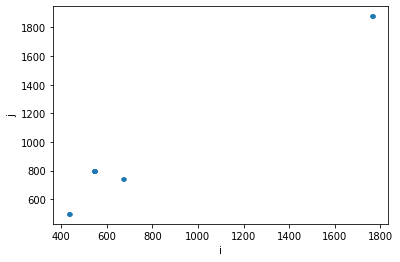

In [25]:
plt.scatter(ii, jj, 10)
plt.xlabel('i')
plt.ylabel('j')

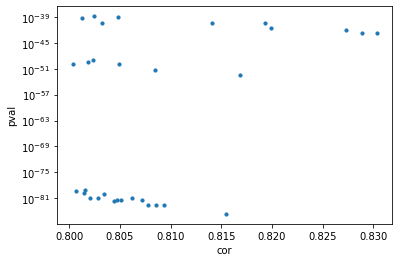

In [26]:
plt.scatter(corcor, pvalpval, 10)
plt.xlabel('cor')
plt.ylabel('pval')
plt.yscale('log')

In [28]:
cols = []
for i in ii:
    if i < 500:
        cols.append('r')
    elif i < 600:
        cols.append('m')
    elif i < 800:
        cols.append('b')
    else:
        cols.append('g')

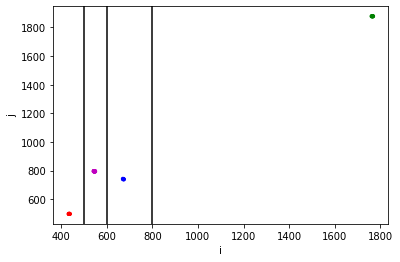

In [29]:
plt.scatter(ii, jj, 10, c=cols)
plt.xlabel('i')
plt.ylabel('j')
plt.axvline(x=500, color='k')
plt.axvline(x=600, color='k')
plt.axvline(x=800, color='k')

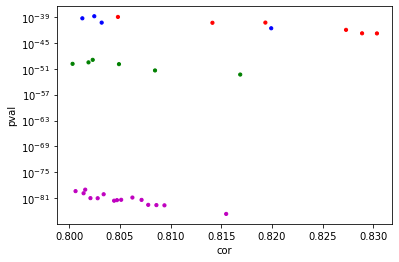

In [30]:
plt.scatter(corcor, pvalpval, 10, c=cols)
plt.xlabel('cor')
plt.ylabel('pval')
plt.yscale('log')

In [31]:
import numpy as np

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [37]:
X = np.array([ii,jj]).T

In [38]:
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
# print(
#     "Adjusted Mutual Information: %0.3f"
#     % metrics.adjusted_mutual_info_score(labels_true, labels)
# )
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 4
Silhouette Coefficient: 1.000


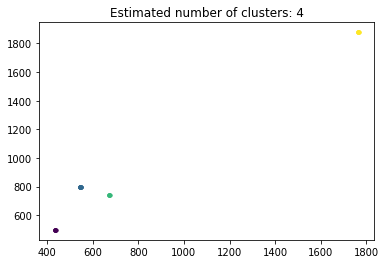

In [39]:
import matplotlib.pyplot as plt

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

Estimated number of clusters: 4


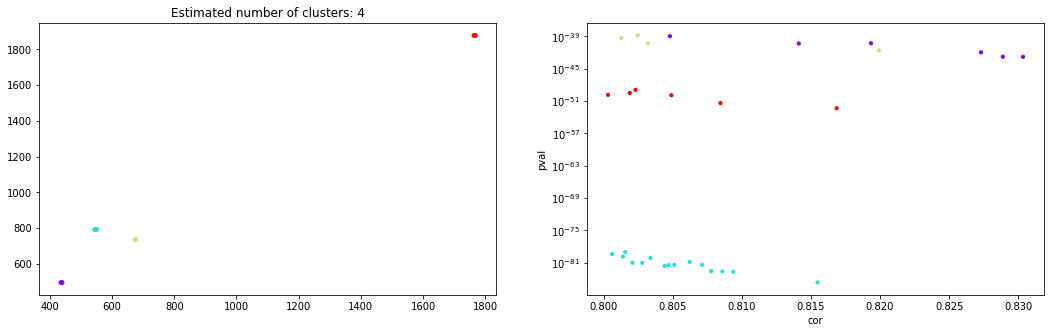

Estimated number of clusters: 15


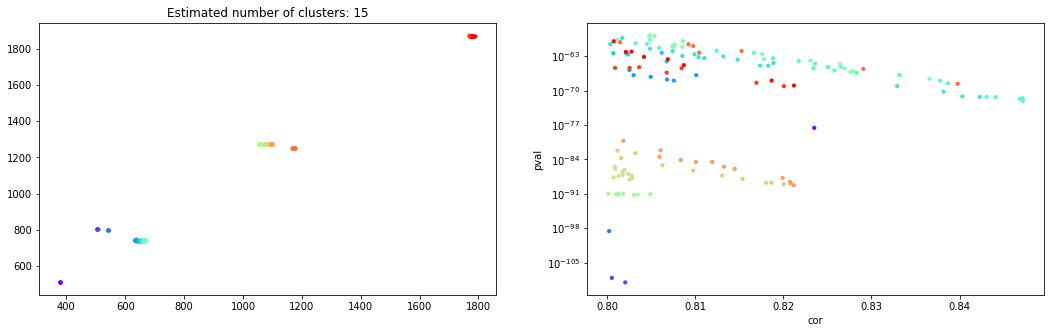

Estimated number of clusters: 13


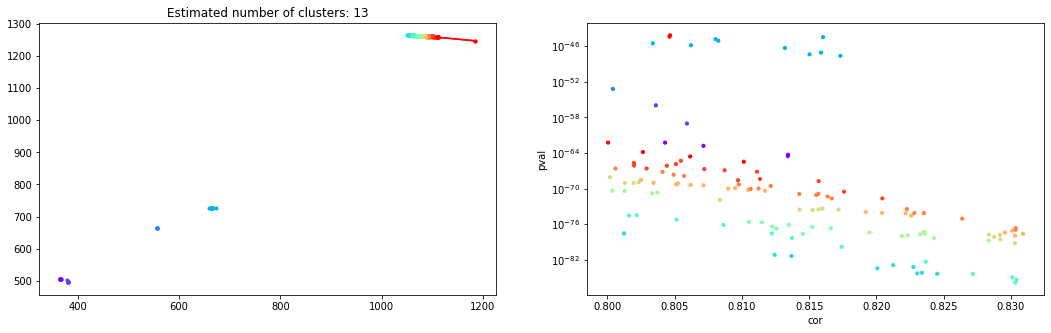

Estimated number of clusters: 39


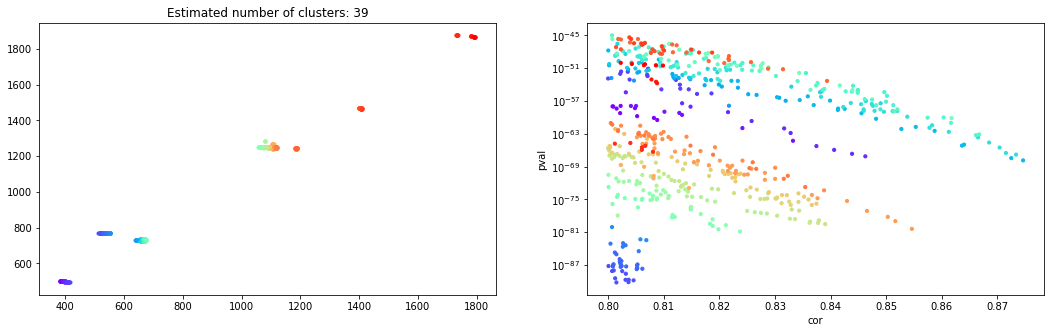

Estimated number of clusters: 13


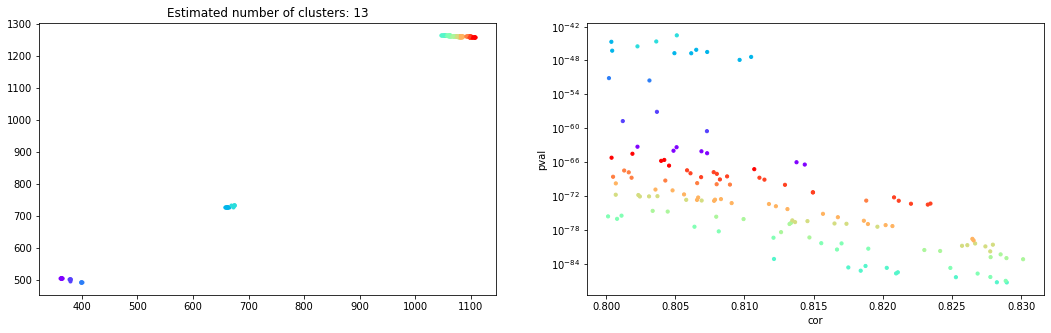

Estimated number of clusters: 2


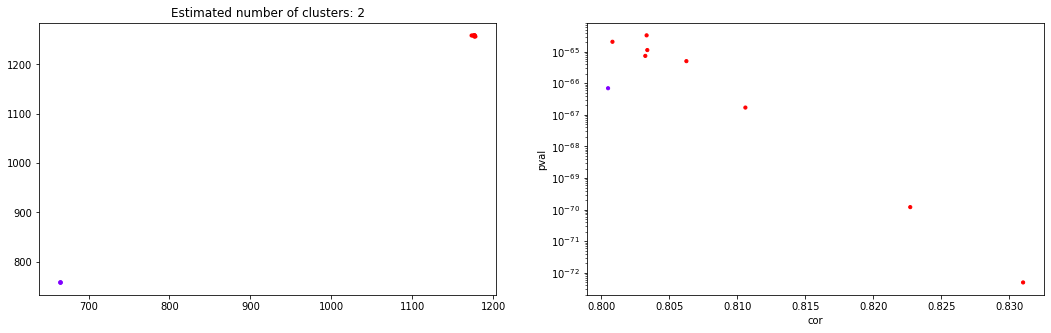

Estimated number of clusters: 10


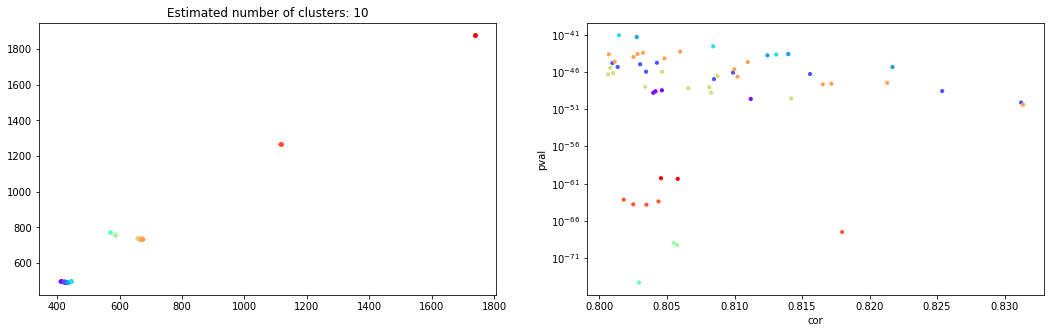

Estimated number of clusters: 13


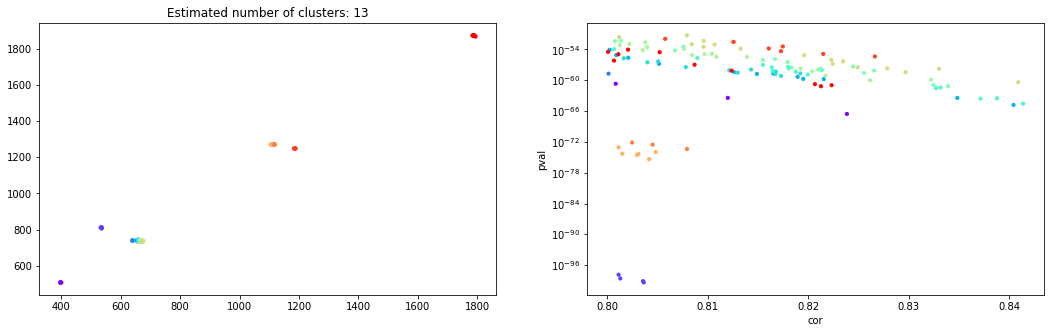

Estimated number of clusters: 37


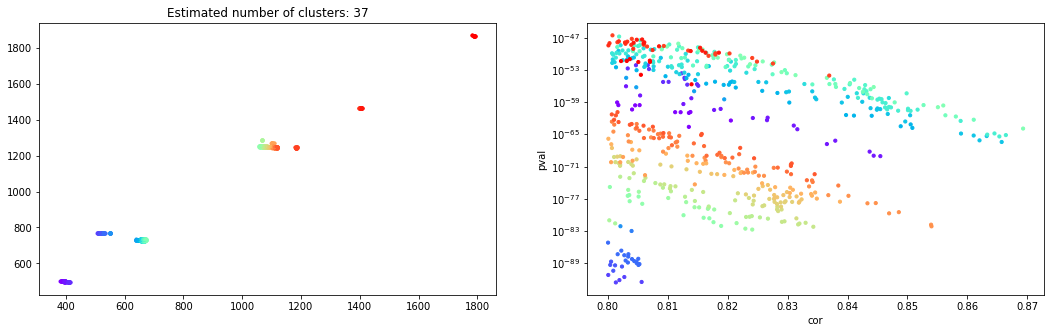

Estimated number of clusters: 4


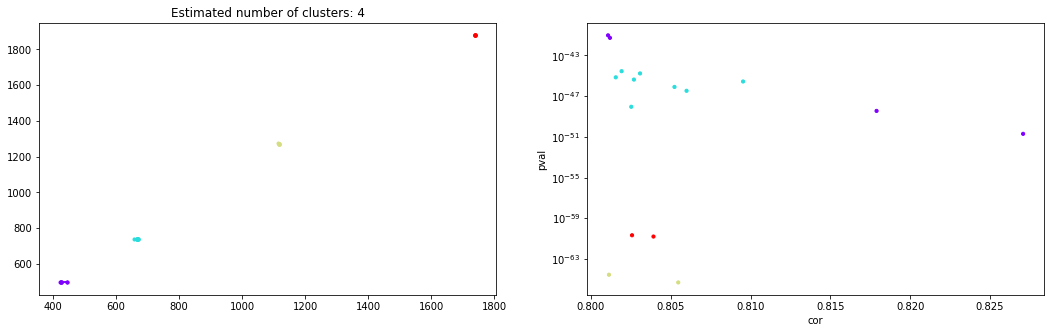

Estimated number of clusters: 1


/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/sklearn/cluster/affinity_propagation_.py:125: UserWarning: All samples have mutually equal similarities. Returning arbitrary cluster center(s).
  warnings.warn("All samples have mutually equal similarities. "


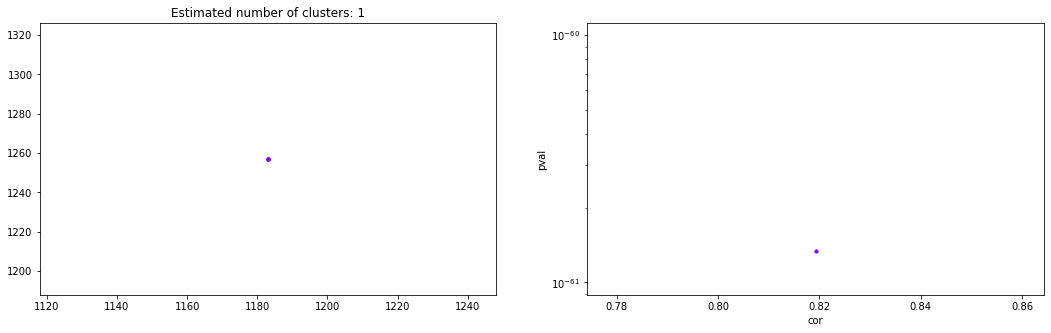

Estimated number of clusters: 11


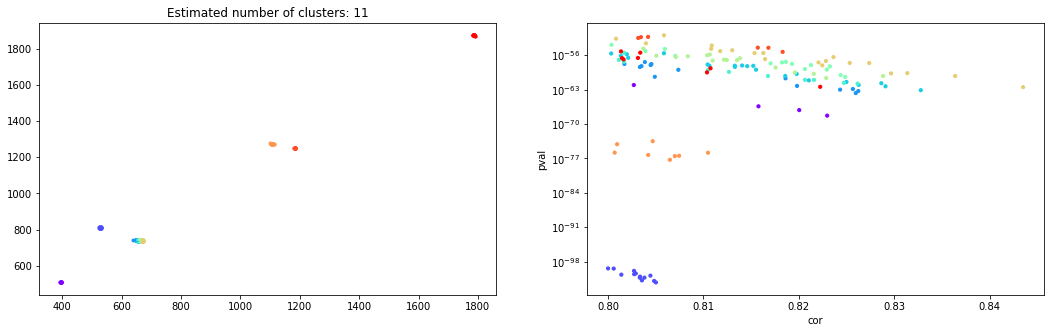

Estimated number of clusters: 11


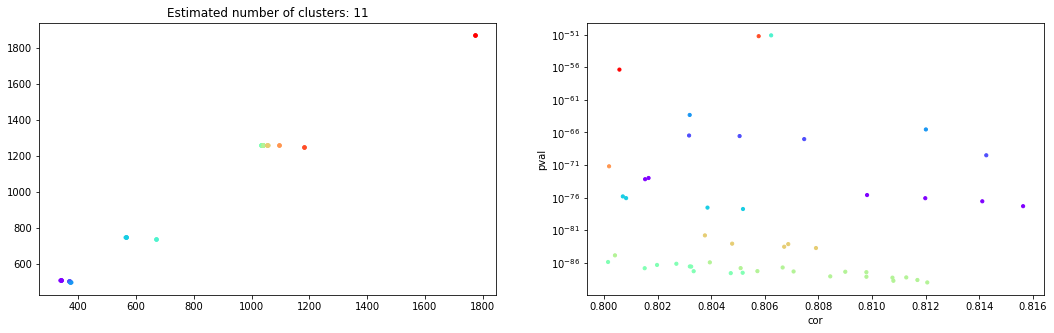

Estimated number of clusters: 1


/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/sklearn/cluster/affinity_propagation_.py:125: UserWarning: All samples have mutually equal similarities. Returning arbitrary cluster center(s).
  warnings.warn("All samples have mutually equal similarities. "


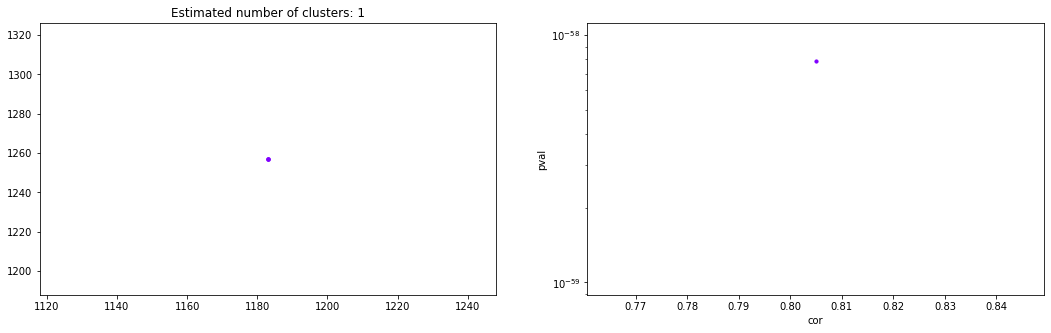

Estimated number of clusters: 40


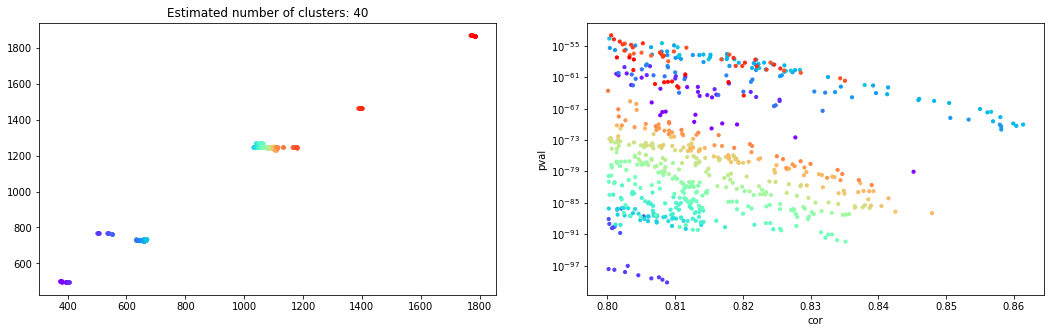

Estimated number of clusters: 6


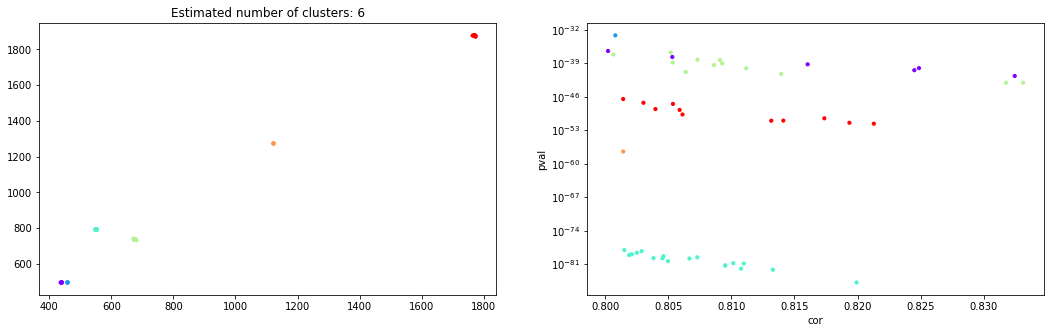

Estimated number of clusters: 9


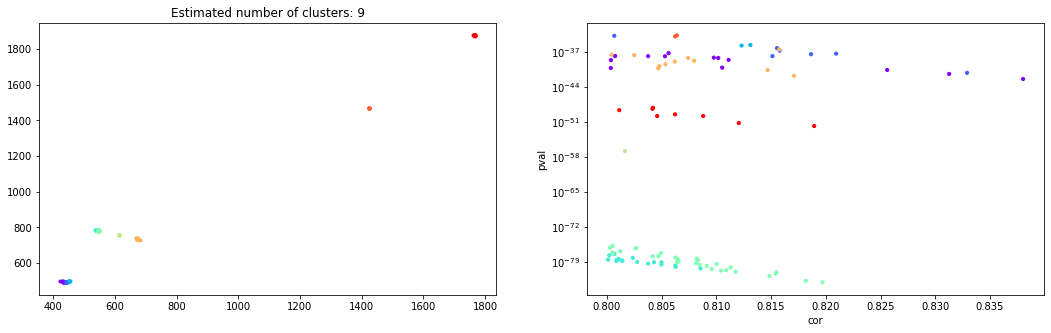

In [59]:
for k in res.keys():
    if len(res[k]) == 0:
        continue
    print('=================================')
    kkey = k
    ii, jj, corcor, pvalpval = [],[],[],[]

    for ind in range(len(res[kkey])):
        i, j, cor, pval, px,py1,py2 = res[kkey][ind]
        ii.append(i)
        jj.append(j)
        corcor.append(cor)
        pvalpval.append(pval)
        
    X = np.array([ii,jj]).T
    
    af = AffinityPropagation(preference=-150).fit(X)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_

    n_clusters_ = len(cluster_centers_indices)

    print("Estimated number of clusters: %d" % n_clusters_)
#     print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    fig = plt.figure(figsize=[18,5])
    ax = plt.subplot(121)
    colors = plt.cycler("color", plt.cm.rainbow(np.linspace(0, 1, n_clusters_)))

    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]
        plt.scatter(
            X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
        )
        plt.scatter(
            cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
        )
        for x in X[class_members]:
            plt.plot(
                [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
            )

    plt.title("Estimated number of clusters: %d" % n_clusters_)
    
    cols = np.zeros((len(labels), 4))
    for k, col in zip(range(n_clusters_), colors):
        cols[labels == k] = col["color"]
    
    ax = plt.subplot(122)
    plt.scatter(corcor, pvalpval, 10, c=cols)
    plt.xlabel('cor')
    plt.ylabel('pval')
    plt.yscale('log')
    
    plt.show()
    
#     break

In [63]:
np.diff(X[:,0])

array([  7,   1,   0,   2,   1,   1,   0,   1,   0,   1,   0,   1,   1,
         1,   2,   1,   1,   1,   1,   7,   1,  83,   1,   1,   0,   1,
         0,   0,   0,   1,   0,   0,   0,   0,   1,   0,   0,   1,   0,
         0,   1,   0,   0,   0,   1,   0,   0,   0,   0,   1,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
         0,   1,   0,   0,  63,  57,   1,   1,   0,   1,   1,   1,   1,
         0,   1,   4, 744,   1, 337,   1,   1,   1,   1,   1,   1,   0])

In [66]:
X[1:,0][np.diff(X[:,0])>15]

array([ 537,  612,  669, 1424, 1762])

In [68]:
len(np.split(X, [ 537,  612,  669, 1424, 1762]))

6

Estimated number of clusters: 3


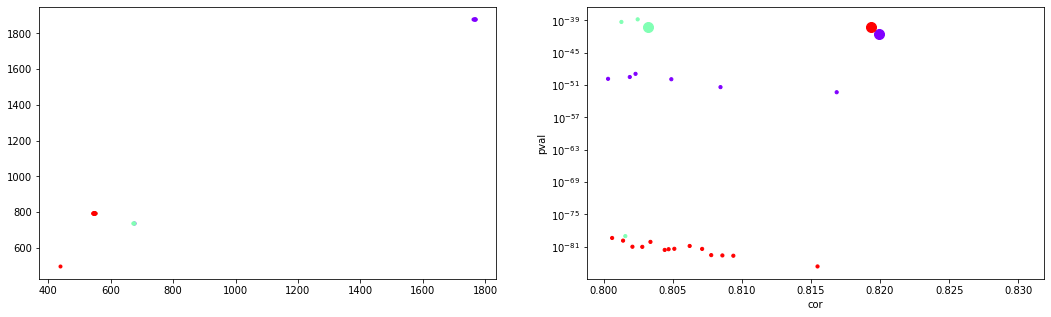

Estimated number of clusters: 6


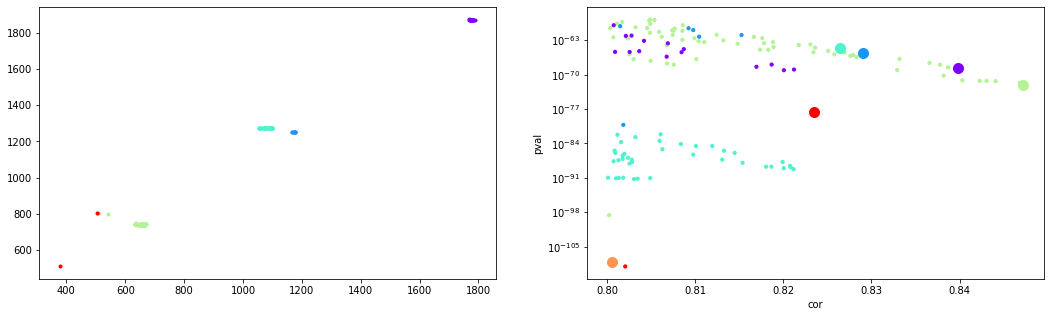

Estimated number of clusters: 4


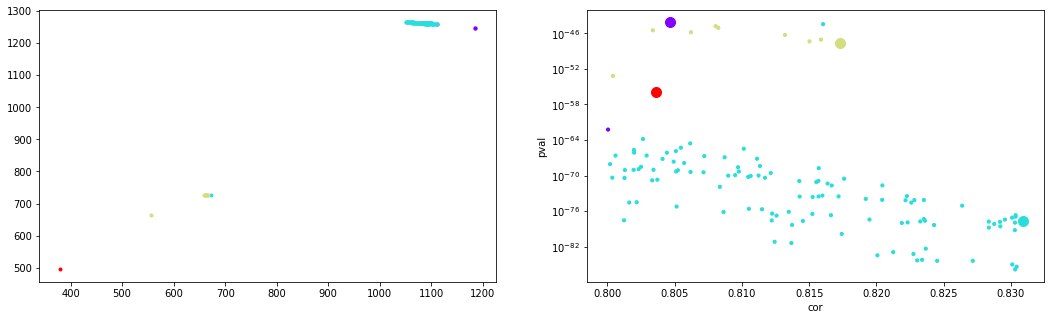

Estimated number of clusters: 7


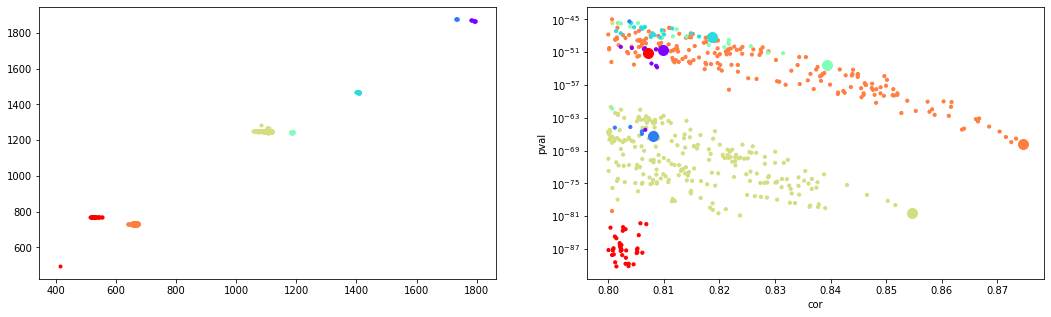

Estimated number of clusters: 3


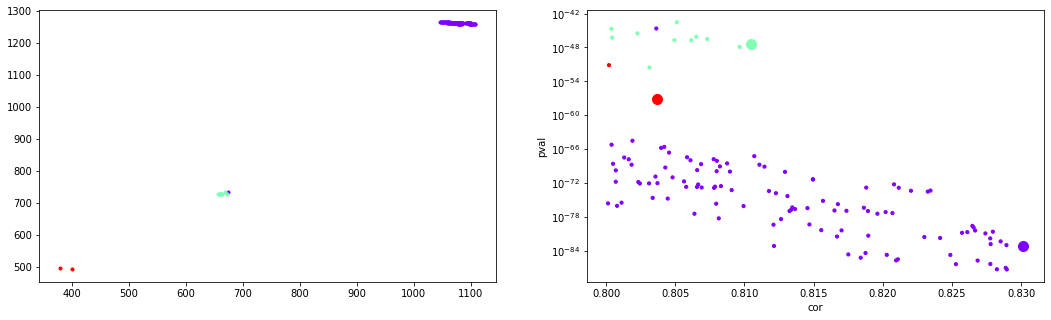

Estimated number of clusters: 1


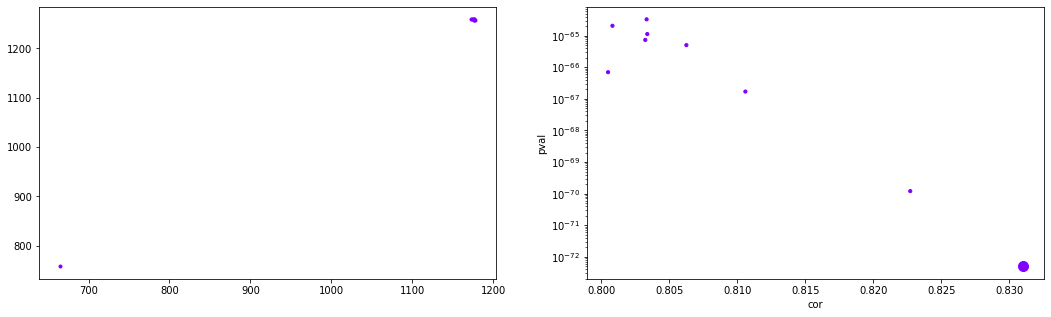

Estimated number of clusters: 4


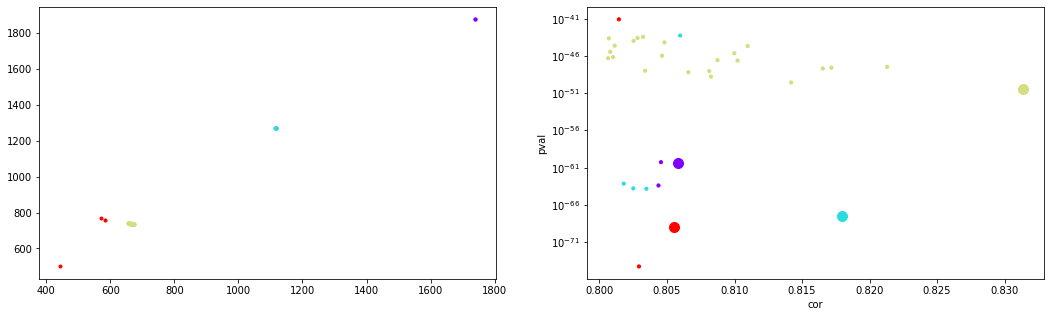

Estimated number of clusters: 5


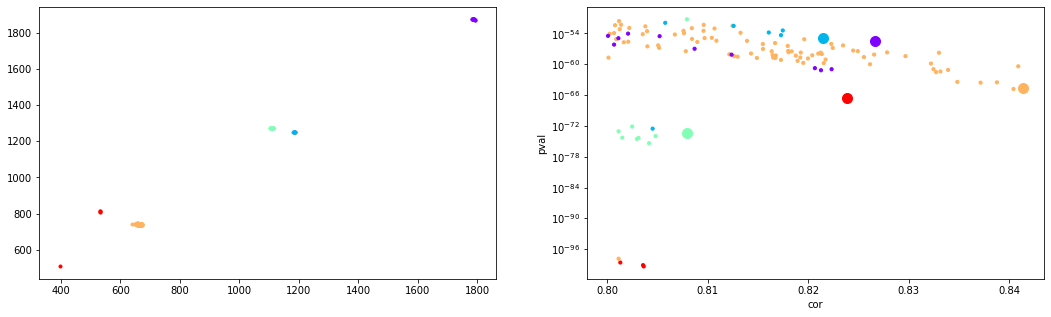

Estimated number of clusters: 7


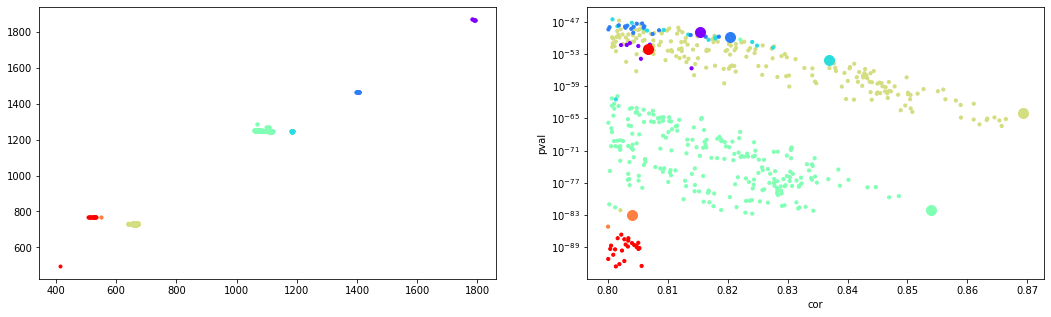

Estimated number of clusters: 4


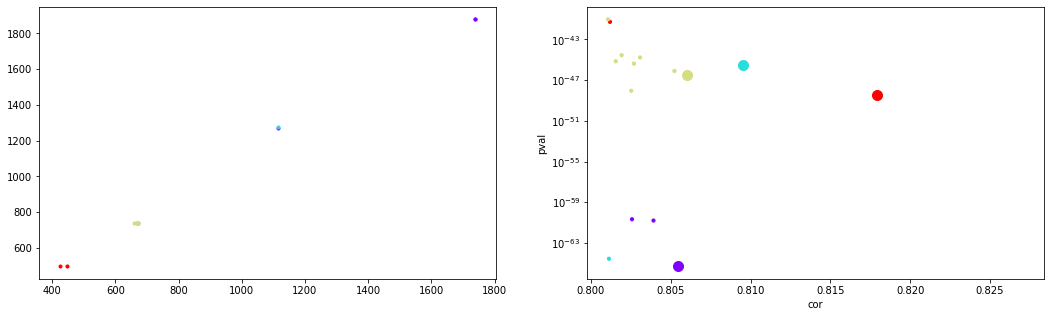

Estimated number of clusters: 0


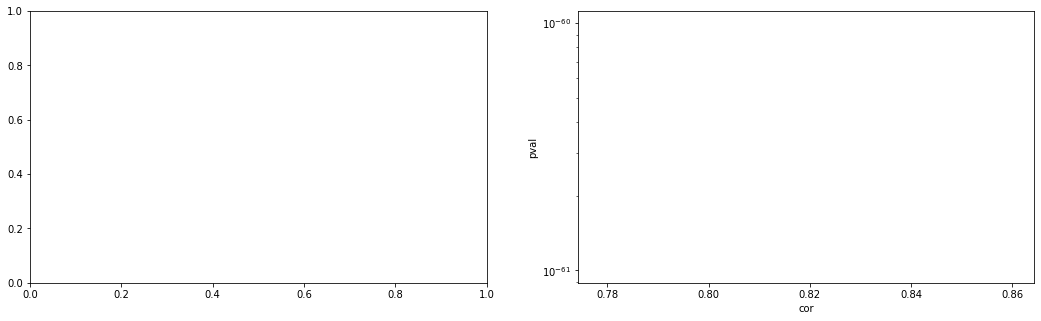

Estimated number of clusters: 5


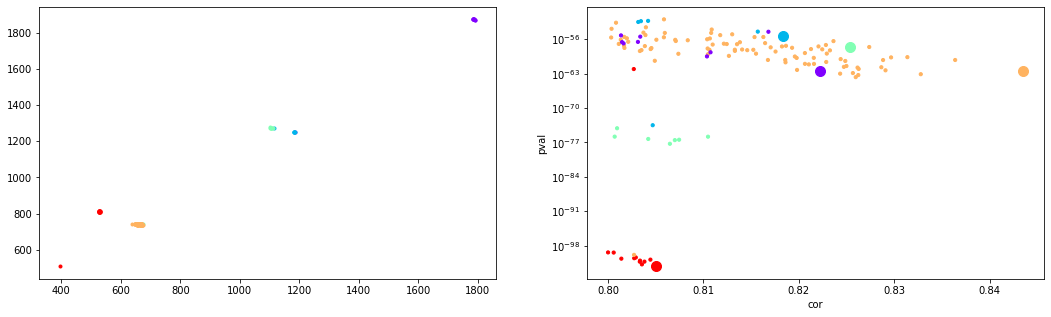

Estimated number of clusters: 7


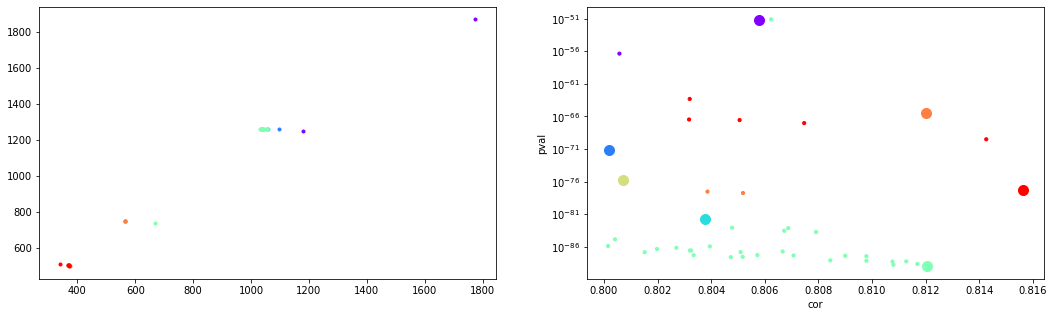

Estimated number of clusters: 0


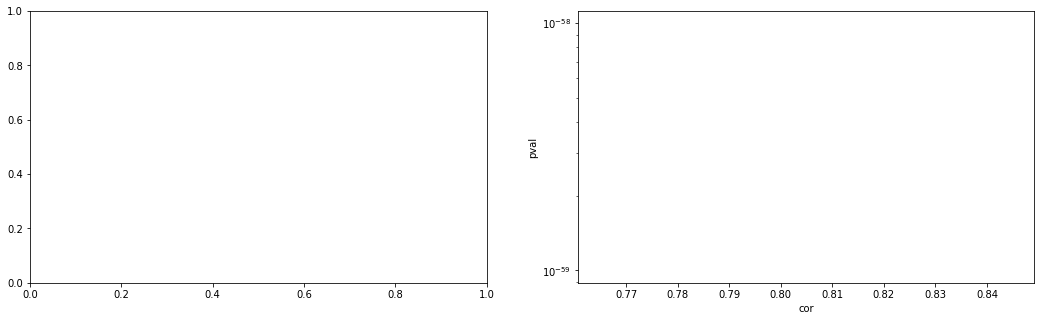

Estimated number of clusters: 8


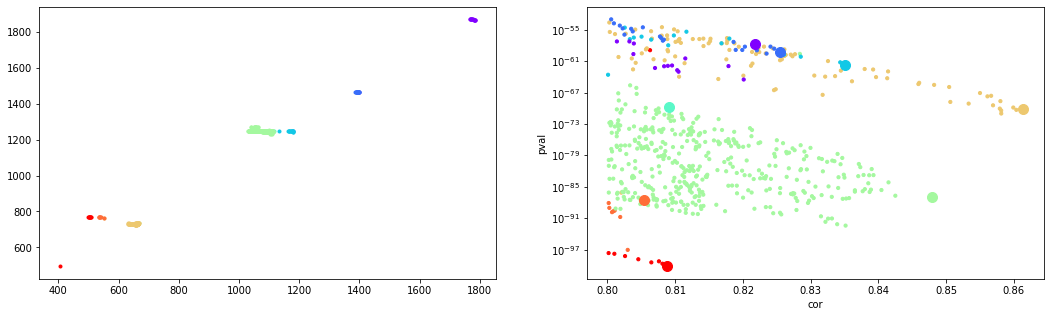

Estimated number of clusters: 5


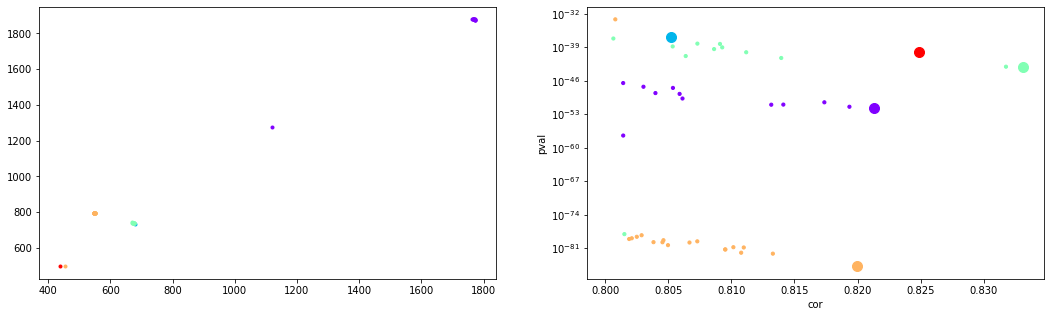

Estimated number of clusters: 5


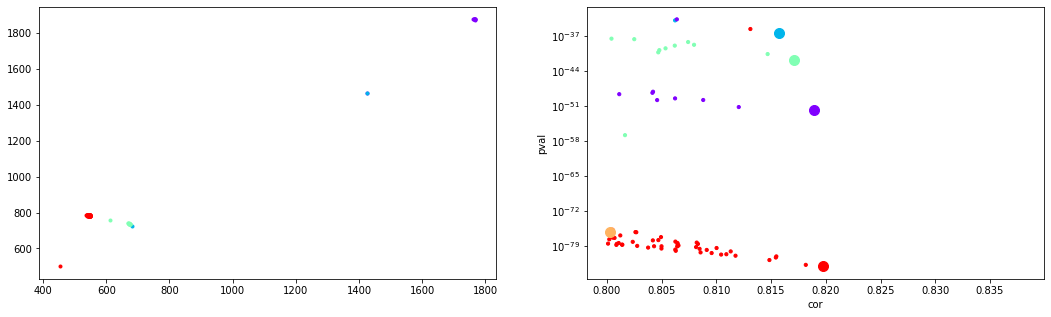

In [115]:
best_res = {}

SPLIT_DIST = 15

for k in res.keys():
    if len(res[k]) == 0:
        continue
    print('=================================')
    
    best_res[k] = []
    kkey = k
    ii, jj, corcor, pvalpval = [],[],[],[]

    for ind in range(len(res[kkey])):
        i, j, cor, pval, px,py1,py2 = res[kkey][ind]
        ii.append(i)
        jj.append(j)
        corcor.append(cor)
        pvalpval.append(pval)
        
    corcor = np.array(corcor)
    pvalpval = np.array(pvalpval)
        
    X = np.array([ii,jj]).T
    where_split = np.where(np.diff(X[:,0])>SPLIT_DIST)[0]
    n_clusters_ = len(where_split)
    labels = np.zeros(len(X))
    for ind,bord in enumerate(where_split[::-1]):
        labels[:bord] = ind+1

    print("Estimated number of clusters: %d" % n_clusters_)
#     print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    fig = plt.figure(figsize=[18,5])
    ax = plt.subplot(121)
    colors = plt.cycler("color", plt.cm.rainbow(np.linspace(0, 1, n_clusters_)))

    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        plt.scatter(
            X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
        )
   
    cols = np.zeros((len(labels), 4))
    for k, col in zip(range(n_clusters_), colors):
        cols[labels == k] = col["color"]
    
    ax = plt.subplot(122)
    plt.scatter(corcor, pvalpval, 10, c=cols)
    
    for k, col in zip(range(n_clusters_), colors):
        mask = labels == k
#         print(mask)
#         print(corcor[mask])
        ind_ = np.argmax(corcor[mask])
        ind = np.where(corcor == corcor[mask][ind_])[0]
        best_res[kkey].append(ind[0])
        plt.scatter(corcor[mask][ind_], pvalpval[mask][ind_], 100, color=cols[mask][ind_])
#         print(ind)
    
    plt.xlabel('cor')
    plt.ylabel('pval')
    plt.yscale('log')
    
    plt.show()
    
#     break

In [116]:
best_res

{'54830.40604_55382.53104': [24, 21, 5],
 '54682.65604_55446.28104': [117, 116, 70, 41, 2, 0],
 '54845.90604_55431.78104': [128, 85, 10, 5],
 '54845.90604_55435.28104': [565, 553, 549, 521, 454, 136, 43],
 '54830.40604_55431.78104': [58, 16, 9],
 '54682.65604_55478.28104': [8],
 '54682.65604_55378.78104': [54, 50, 37, 22],
 '54845.90604_55446.28104': [109, 106, 101, 29, 2],
 '54830.40604_55435.28104': [537, 517, 510, 428, 257, 64, 38],
 '54682.65604_55382.53104': [13, 11, 5, 1],
 '54845.90604_55478.28104': [],
 '54830.40604_55446.28104': [127, 122, 111, 101, 7],
 '54682.65604_55431.78104': [47, 46, 45, 37, 15, 11, 5],
 '54830.40604_55478.28104': [],
 '54682.65604_55435.28104': [599, 594, 575, 562, 495, 135, 51, 41],
 '54845.90604_55382.53104': [44, 36, 32, 14, 5],
 '54830.40604_55378.78104': [89, 81, 74, 69, 58]}

In [117]:
def plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto='.'):
    rrr = 0
    for k,v in res.items():
        if len(v) == 0:
            continue

        num_sim = len(v)
        to_plot = len(best_res[k])

        fig,axes = plt.subplots(figsize=[24, 3*(2*to_plot+2)], nrows=2*to_plot+2)

        ax = axes[0]
        ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
        ax.plot(xx_, yy_, '-', color='r', alpha=0.3)
        ax.set_yscale('log')


        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='yellow', alpha=0.3)
        ax.add_patch(rect)

        mask = (x>regx1)&(x<=regx2)
        ax.plot(x[mask], y[mask], color='g')

        delta_T_orig = np.max(x[mask]) - np.min(x[mask])

        ii=1
        axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'refsample i={rrr}, num={num_sim}', color='g')
        axes[ii].legend(fontsize=20)

        # sort by corr number
#         dist_res = sorted(v, key= lambda l: l[2], reverse=True)
        dist_res = v

        # plot only top-5 results
        for indd in range(to_plot):
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            regx1, regx2 = x[i], x[j]
            rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
            ax.add_patch(rect)

            mask = (x>regx1)&(x<=regx2)
            ii+=1
            axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'pattern#{indd} ({regx1}-{regx2})', color='m')
            axes[ii].legend(fontsize=16)

            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig

            ii+=1
            axes[ii].plot(px, py1,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
            axes[ii].plot(px, py2,'o',color='r')
            axes[ii].legend(fontsize=20)

        plt.suptitle(f'i={rrr}, k={k}')
        plt.savefig(saveto + f'/{rrr}.png', bbox_inches='tight')
        plt.close(fig)
        rrr+=1


plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto='/mnt/sdb2/science/blazars/q1156_full_results/refined')

In [118]:
from multiprocessing import Process, Manager


start = time.time()

MAX_PATTERN_LEN = 300
MIN_PATTERN_LEN = 100
MAX_TIME_SPEEDUP = 3.
MIN_TIME_SPEEDUP = 0.4
CORR_LIM = 0.8
x_len = len(x)


works = []
for ind_edge in range(len(edges)):
    for ind2_edge in range(ind_edge+1, len(edges)):
        mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
        motif_x = x[mask]
        
        if len(motif_x) > MAX_PATTERN_LEN or len(motif_x) < MIN_PATTERN_LEN:
            continue
            
        works.append([ind_edge, ind2_edge])


In [120]:
len(works)

2919

In [121]:
2919/8

364.875

In [122]:
len(chunks(works, 8))

365

In [ ]:
from multiprocessing import Process, Manager


start = time.time()

MAX_PATTERN_LEN = 300
MIN_PATTERN_LEN = 100
MAX_TIME_SPEEDUP = 3.
MIN_TIME_SPEEDUP = 0.4
CORR_LIM = 0.8
x_len = len(x)


works = []
for ind_edge in range(len(edges)):
    for ind2_edge in range(ind_edge+1, len(edges)):
        mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
        motif_x = x[mask]
        
        if len(motif_x) > MAX_PATTERN_LEN or len(motif_x) < MIN_PATTERN_LEN:
            continue
            
        works.append([ind_edge, ind2_edge])


def dothing(L, i_):  # the managed list `L` passed explicitly.
    for (ind_edge, ind2_edge) in i_:
        dist_res = []
        iter_time = time.time()
        
        mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
        motif_x = x[mask]
        motif_len = len(motif_x)
        
        for i in range(motif_len):
            for j in range(i+MAX_PATTERN_LEN, min(x_len,i+MAX_PATTERN_LEN+1)):  

                if mask[i:j].any():
                    continue
                    
                dist_res.append([i, j])
                
        L.append([ind_edge, ind2_edge, dist_res])
        print(f'resLen: {len(dist_res)}')
        print(f'{edges[ind_edge]} --- {edges[ind2_edge]}')
        print('-*_'*50)

def chunks(xs, n):
    n = max(1, n)
    return list(xs[i:i+n] for i in range(0, len(xs), n))                 

res = {}
with Manager() as manager:
    start = time.time()
    L = manager.list()  # <-- can be shared between processes.
    processes = []
    chnks_ = chunks(works, 360)
    for i in range(8):
        p = Process(target=dothing, args=(L,chnks_[i]))  # Passing the list
        p.start()
        processes.append(p)
    for p in processes:
        p.join()
    print(len(L))
    
    for vv in L:
        ind_edge, ind2_edge, dist_res = vv
        res[str(edges[ind_edge]) + '_' + str(edges[ind2_edge])] = dist_res
        
    print(time.time() - start)

In [128]:
len(res)

2880

In [133]:
best_res = {}

SPLIT_DIST = 15

for k in res.keys():
    if len(res[k]) == 0:
        continue
#     print('=================================')
    
    best_res[k] = []
    kkey = k
    ii, jj, corcor, pvalpval = [],[],[],[]

    for ind in range(len(res[kkey])):
        i, j, cor, pval, px,py1,py2 = res[kkey][ind]
        ii.append(i)
        jj.append(j)
        corcor.append(cor)
        pvalpval.append(pval)
        
    corcor = np.array(corcor)
    pvalpval = np.array(pvalpval)
        
    X = np.array([ii,jj]).T
    where_split = np.where(np.diff(X[:,0])>SPLIT_DIST)[0]
    n_clusters_ = len(where_split)
    labels = np.zeros(len(X))
    for ind,bord in enumerate(where_split[::-1]):
        labels[:bord] = ind+1

#     print("Estimated number of clusters: %d" % n_clusters_)
#     print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
   
    cols = np.zeros((len(labels), 4))
    for k, col in zip(range(n_clusters_), colors):
        cols[labels == k] = col["color"]
    
   
    for k, col in zip(range(n_clusters_), colors):
        mask = labels == k
#         print(mask)
#         print(corcor[mask])
        ind_ = np.argmax(corcor[mask])
        ind = np.where(corcor == corcor[mask][ind_])[0]
        best_res[kkey].append(ind[0])

In [134]:
len(best_res)

556

In [139]:
STRICT_COR_LIMIT = 0.85

def plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto='.'):
    rrr = 0
    for k,v in res.items():
        if len(v) == 0:
            continue

        num_sim = len(v)
        to_plot = len(best_res[k])
        
        dist_res = v
        plotted = 0
        for indd in range(to_plot):
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            
            if cor < STRICT_COR_LIMIT:
                continue
            plotted+=1

        fig,axes = plt.subplots(figsize=[24, 3*(2*plotted+2)], nrows=2*plotted+2)

        ax = axes[0]
        ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
        ax.plot(xx_, yy_, '-', color='r', alpha=0.3)
        ax.set_yscale('log')


        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='yellow', alpha=0.3)
        ax.add_patch(rect)

        mask = (x>regx1)&(x<=regx2)
        ax.plot(x[mask], y[mask], color='g')

        delta_T_orig = np.max(x[mask]) - np.min(x[mask])

        ii=1
        axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'refsample i={rrr}, num={num_sim}', color='g')
        axes[ii].legend(fontsize=20)

        # sort by corr number
#         dist_res = sorted(v, key= lambda l: l[2], reverse=True)
        

        # plot only top-5 results
        plotted = 0
        for indd in range(to_plot):
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            
            if cor <STRICT_COR_LIMIT:
                continue
            
            regx1, regx2 = x[i], x[j]
            rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
            ax.add_patch(rect)

            mask = (x>regx1)&(x<=regx2)
            ii+=1
            axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'pattern#{indd} ({regx1}-{regx2})', color='m')
            axes[ii].legend(fontsize=16)

            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig

            ii+=1
            axes[ii].plot(px, py1,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
            axes[ii].plot(px, py2,'o',color='r')
            axes[ii].legend(fontsize=20)
            plotted += 1

        plt.suptitle(f'i={rrr}, k={k}')
        if to_plot != 0 and plotted != 0:
            plt.savefig(saveto + f'/{rrr}.png', bbox_inches='tight')
        plt.close(fig)
        rrr+=1


plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto='/mnt/sdb2/science/blazars/q1156_full_results/refined/rerefined')

## improve plots

In [21]:
from astropy.stats import bayesian_blocks
from scipy import interpolate
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pylab as plt
from multiprocessing import Process, Manager
import pickle
import time
from scipy import stats
from matplotlib.patches import Rectangle
import os
import json


saveto = '/mnt/sdb2/science/blazars/q1156_full_results/refined/rerefined/pluscorr'

with open('/mnt/sdb2/science/blazars/q1156_full_results/refined/res.pkl', 'rb') as f:
    res = pickle.load(f)

In [22]:
len(res)

2880

In [25]:
best_res = {}

SPLIT_DIST = 15

for k in res.keys():
    if len(res[k]) == 0:
        continue
#     print('=================================')
    
    best_res[k] = []
    kkey = k
    ii, jj, corcor, pvalpval = [],[],[],[]

    for ind in range(len(res[kkey])):
        i, j, cor, pval, px,py1,py2 = res[kkey][ind]
        ii.append(i)
        jj.append(j)
        corcor.append(cor)
        pvalpval.append(pval)
        
    corcor = np.array(corcor)
    pvalpval = np.array(pvalpval)
        
    X = np.array([ii,jj]).T
    where_split = np.where(np.diff(X[:,0])>SPLIT_DIST)[0]
    n_clusters_ = len(where_split)
    labels = np.zeros(len(X))
    for ind,bord in enumerate(where_split[::-1]):
        labels[:bord] = ind+1  
   
    for k in range(n_clusters_):
        mask = labels == k
        ind_ = np.argmax(corcor[mask])
        ind = np.where(corcor == corcor[mask][ind_])[0]
        best_res[kkey].append(ind[0])

In [71]:
STRICT_COR_LIMIT = 0.85

def plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto='.', agn=''):
    rrr = 0
    for k,v in res.items():
        if len(v) == 0:
            continue

        num_sim = len(v)
        to_plot = len(best_res[k])
        
        dist_res = v
        plotted = 0
        
        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        mask = (x>regx1)&(x<=regx2)
        delta_T_orig = np.max(x[mask]) - np.min(x[mask])
        
        plot_ind = []
        for indd in range(to_plot):
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            
            if cor < STRICT_COR_LIMIT:
                continue
                
            regx1, regx2 = x[i], x[j]
            mask = (x>regx1)&(x<=regx2)
            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig
            
            if speedup < MIN_TIME_SPEEDUP or speedup > MAX_TIME_SPEEDUP:
                continue
            
            plotted+=1
            plot_ind.append(indd)
            
        if plotted == 0:
            continue

        fig,axes = plt.subplots(figsize=[24, 3*(3*plotted+2)], nrows=3*plotted+2)

        ax = axes[0]
        ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3, label=f'{agn} i={rrr}, k={k}')
        ax.plot(xx_, yy_, '-', color='r', alpha=0.3)
        ax.set_yscale('log')
        ax.legend(fontsize=19)


        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='yellow', alpha=0.3)
        ax.add_patch(rect)

        mask = (x>regx1)&(x<=regx2)
        ax.plot(x[mask], y[mask], color='g')

        delta_T_orig = np.max(x[mask]) - np.min(x[mask])

        ii=1
        axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'refsample i={rrr}, num={num_sim}', color='g')
        axes[ii].legend(fontsize=20)
        axes[ii].plot(xx_, yy_, '-', color='r', alpha=0.3)
        axes[ii].set_xlim(regx1-10, regx2+10)

        plotted = 0
        for indd in plot_ind:
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            
            
            px,py1,py2 = zip(*sorted(zip(px,py1, py2)))
            px,py1,py2 = np.array(px), np.array(py1), np.array(py2)
            
            
            if cor <STRICT_COR_LIMIT:
                continue
            
            regx1, regx2 = x[i], x[j]
            rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
            ax.add_patch(rect)

            mask = (x>regx1)&(x<=regx2)
            ii+=1
            axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'pattern#{indd} ({regx1}-{regx2})', color='m')
            axes[ii].legend(fontsize=16)
            axes[ii].plot(xx_, yy_, '-', color='r', alpha=0.3)
            

            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig
            axes[ii].set_xlim(regx1-10*speedup, regx2+10*speedup)

            ii+=1
            axes[ii].plot(px, py1,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none', marker='+')
#             axes[ii].plot(px, py2,'o',color='r')
            axes[ii].scatter(px, py2, s=10, c=px, cmap='turbo')
            axes[ii].legend(fontsize=20)
        
            qlen = int(0.1*len(px))
            for ind, multip in enumerate([2, 4, 5, 7, 9]):
                axes[ii].axvline(x=np.min(px[qlen*multip:]), color='k', alpha=0.1*multip)
            
            
            ii+=1
#             axes[ii].plot(py1, py2,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
            qlen = int(0.1*len(px))
            lbl = ''
            qlbls = ['-20%', '-40%', '-50%', '-70%', '-90%']
            for ind, multip in enumerate([2, 4, 5, 7, 9]):
                qcor, qpval = stats.pearsonr(py1[qlen*multip:], py2[qlen*multip:])
                lbl+= '{}:{:2.2f} '.format(qlbls[ind], qcor)
            axes[ii].scatter(py1, py2, s=10, c=px, cmap='turbo', label=lbl)
            axes[ii].legend(fontsize=16)
            
            plotted += 1

#         plt.suptitle(f'i={rrr}, k={k}')
        if to_plot != 0 and plotted != 0:
            plt.savefig(saveto + f'/{rrr}.png', bbox_inches='tight')
        plt.close(fig)
        rrr+=1


plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto='/mnt/sdb2/science/blazars/q1156_full_results/refined/rerefined/pluscorr', agn='q1156')

# test on already found

> Привет!
интервалы в таб 1
Куски кривых в архиве. 


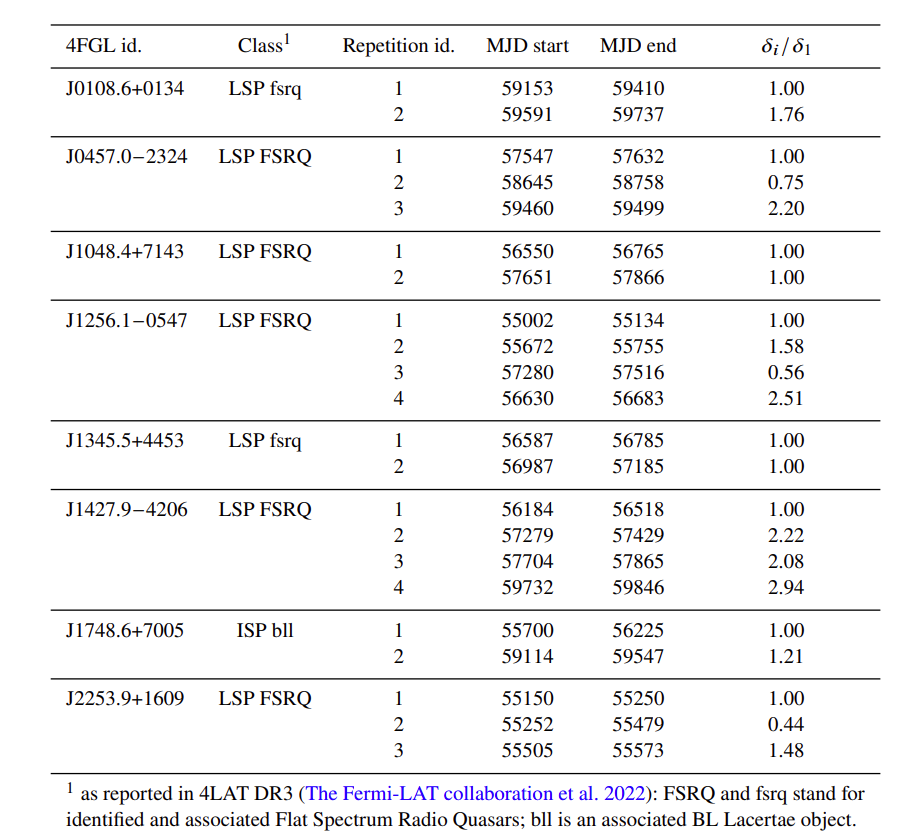

In [49]:
from IPython.display import Image

Image('patterns_table.png', width=700)

In [50]:
ptrns = '''1 59153 59410 1.00
2 59591 59737 1.76
1 57547 57632 1.00
2 58645 58758 0.75
3 59460 59499 2.20
1 56550 56765 1.00
2 57651 57866 1.00
1 55002 55134 1.00
2 55672 55755 1.58
3 57280 57516 0.56
4 56630 56683 2.51
1 56587 56785 1.00
2 56987 57185 1.00
1 56184 56518 1.00
2 57279 57429 2.22
3 57704 57865 2.08
4 59732 59846 2.94
1 55700 56225 1.00
2 59114 59547 1.21
1 55150 55250 1.00
2 55252 55479 0.44
3 55505 55573 1.48'''

ptrns = ptrns.split('\n')
ptrns = np.array([_.split(' ') for _ in ptrns]).astype(np.float32)

MJD start - MJD end:

In [54]:
print(sorted(ptrns[:,2]-ptrns[:,1]))

[39.0, 53.0, 68.0, 83.0, 85.0, 100.0, 113.0, 114.0, 132.0, 146.0, 150.0, 161.0, 198.0, 198.0, 215.0, 215.0, 227.0, 236.0, 257.0, 334.0, 433.0, 525.0]


Delta T and inverse delta t:

In [57]:
print(sorted(np.concatenate([ptrns[:,-1], 1./ptrns[:,-1]])))

[0.34013605, 0.3984064, 0.44, 0.45045045, 0.45454544, 0.48076925, 0.56, 0.5681818, 0.6329114, 0.6756757, 0.75, 0.82644624, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.21, 1.3333334, 1.48, 1.58, 1.76, 1.7857143, 2.08, 2.2, 2.22, 2.2727273, 2.51, 2.94]


In [68]:
for fname in os.listdir('/mnt/sdb2/science/blazars/Final/J0457.0-2324/'):
    with open('/mnt/sdb2/science/blazars/Final/J0457.0-2324/'+fname, 'r') as fin:
        ls = fin.readlines()
        print(f'{fname} {len(ls)}')

add_jd.py 26
J0457.0-2324_134000_r1.dat 194
J0457.0-2324_134000_r1_lc_fl.txt 167
J0457.0-2324_134000_r1_lc_JD.dat 194
J0457.0-2324_134000_r1_lc_up.txt 27
J0457.0-2324_178666_r2.dat 126
J0457.0-2324_178666_r2_lc_fl.txt 124
J0457.0-2324_178666_r2_lc_JD.dat 126
J0457.0-2324_178666_r2_lc_up.txt 2
J0457.0-2324_65000_r3.dat 162
J0457.0-2324_65000_r3_lc_fl.txt 158
J0457.0-2324_65000_r3_lc_JD.dat 162
J0457.0-2324_65000_r3_lc_up.txt 4
J0457.0-2324_p1.eps 2072
plot.gpl 89
separ.sh 28


In [94]:
!head /mnt/sdb2/science/blazars/0_data/1d/J0457.0-2324_86400_lc.dat

# MJD       MET       Flux         Flux_err     UpperLim  TS PhInd FitTol       MinimRetCode
54683.1552894 239600617 2.38055305452e-07 1.13170361252e-07 4.03696536981e-07 19.7036951509 0.0   0.0 0
54683.6552894 239643817 3.26438334827e-07 1.24124080646e-07 5.11909677957e-07 29.0695993344 0.0   0.0 0
54684.1552894 239687017 4.82452909834e-07 1.31468331536e-07 6.78388003399e-07 57.0305621557 0.0   0.0 0
54684.6552894 239730217 5.06878779835e-07 1.43487658863e-07 7.23030252647e-07 45.9062726341 0.0   0.0 0
54685.1552894 239773417 3.81950264828e-07 1.28063464869e-07 5.63675304061e-07 48.057446798 0.0   0.0 0
54685.6552894 239816617 3.03158234835e-07 1.02400527053e-07 4.4394536229e-07 55.4549641908 0.0   0.0 0
54686.1552894 239859817 2.76980771347e-07 1.28008859684e-07 4.23606636168e-07 37.5998845312 0.0   0.0 0
54686.6552894 239903017 2.0641954083e-07 1.26242703363e-07 3.52420170035e-07 19.6324322559 0.0   0.0 0
54687.1552894 239946217 3.32763078676e-07 1.3375494825e-07 5.01168069938e-07 4

In [117]:
data = np.loadtxt('/mnt/sdb2/science/blazars/0_data/3d/J0457.0-2324.dat')
x,y,yerr = data[:,0], data[:,2]/1e-6, data[:,3]/1e-6

In [118]:
len(data), data.shape

(1677, (1677, 9))

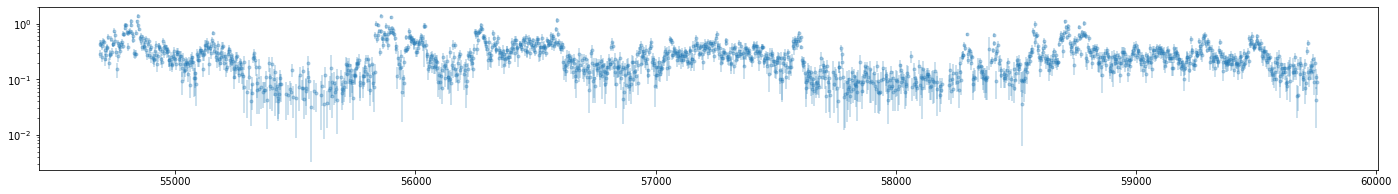

In [120]:
fig = plt.figure(figsize=[24, 3])


plt.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
# plt.plot(xx_, yy_, '-', color='r')
# plt.ylim(1e-6, 1e-9)
plt.yscale('log')
plt.show()

In [130]:
np.sum(~np.isfinite(yerr))

131

In [132]:
mask = np.isfinite(yerr)
x,y,yerr = x[mask], y[mask], yerr[mask]

In [133]:
xx_, yy_, edges = blockify(x,y,yerr, fitness='measures', p0=0.05)

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


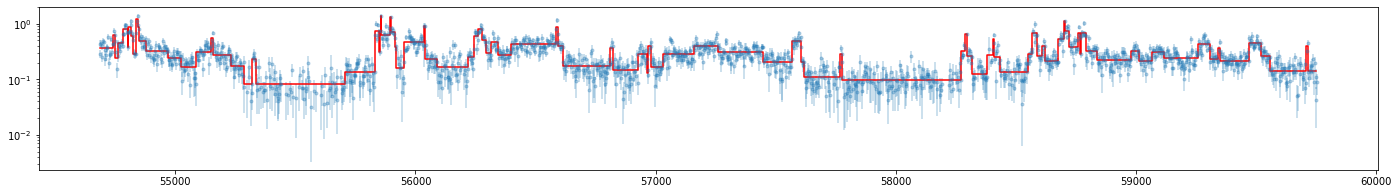

In [134]:
fig = plt.figure(figsize=[24, 3])

plt.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
plt.plot(xx_, yy_, '-', color='r')
plt.yscale('log')
# plt.ylim(1e-6, 1e-9)
plt.show()

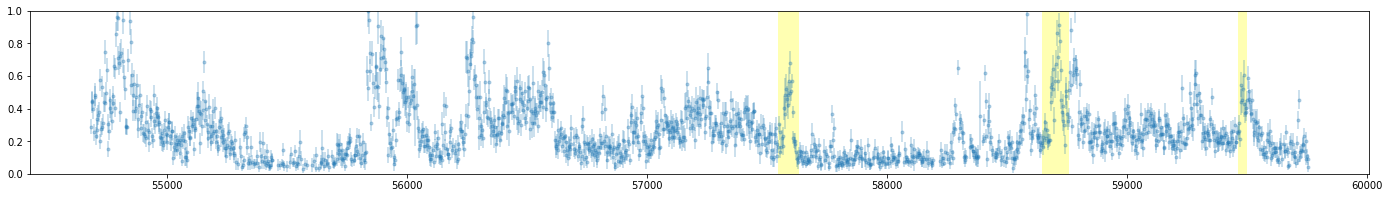

In [125]:
fig = plt.figure(figsize=[24, 3])


# 1 57547 57632 1.00
# 2 58645 58758 0.75
# 3 59460 59499 2.20


plt.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
# plt.plot(xx_, yy_, '-', color='r')
# plt.ylim(1e-6, 1e-8)
plt.ylim(0, 1)

ax = plt.gca()
for regx1,regx2 in [(57547,57632), (58645,58758), (59460, 59499)]:
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='yellow', alpha=0.3)
    ax.add_patch(rect)

# plt.yscale('log')
plt.show()

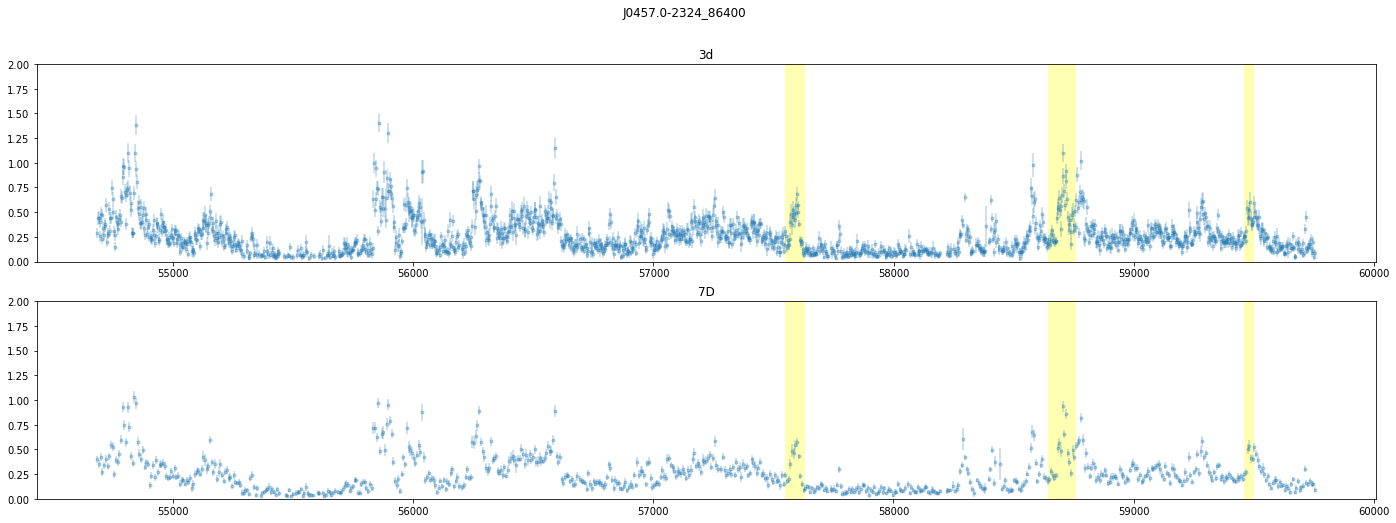

In [107]:
data = np.loadtxt('/mnt/sdb2/science/blazars/0_data/3d/J0457.0-2324.dat')
x,y,yerr = data[:,0], data[:,2]/1e-6, data[:,3]/1e-6

fig = plt.figure(figsize=[24, 8])
plt.suptitle('J0457.0-2324_86400')

ax = plt.subplot(211)

ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
# plt.plot(xx_, yy_, '-', color='r')
# plt.ylim(1e-6, 1e-8)

plt.ylim(0, 2)

ax = plt.gca()
for regx1,regx2 in [(57547,57632), (58645,58758), (59460, 59499)]:
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='yellow', alpha=0.3)
    ax.add_patch(rect)
ax.set_title('3d')

data = np.loadtxt('/mnt/sdb2/science/blazars/0_data/7d/J0457.0-2324.dat')
x,y,yerr = data[:,0], data[:,2]/1e-6, data[:,3]/1e-6

ax = plt.subplot(212)

ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
plt.ylim(0, 2)

ax = plt.gca()
for regx1,regx2 in [(57547,57632), (58645,58758), (59460, 59499)]:
    rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='yellow', alpha=0.3)
    ax.add_patch(rect)
    
ax.set_title('7D')    

# plt.yscale('log')
plt.show()

In [6]:
from astropy.stats import bayesian_blocks
from scipy import interpolate
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pylab as plt
from multiprocessing import Process, Manager
import pickle
import time
from scipy import stats
from matplotlib.patches import Rectangle
import os
import json


def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def blockify(x,y,yerr, **kwargs):
    '''Build bayesian blocks'''
    xx_,yy_ = [], []
    edges = bayesian_blocks(x, x=y, sigma=yerr, **kwargs)
    bins = np.digitize(x, edges, right=False)
    bin_num = np.max(bins)
    for bin_n in range(bin_num):
        mask = bins == bin_n
        yy = np.mean(y[mask])
        xx = x[mask]    
        try:
            if len(xx_)>0:
                xx_.append(xx_[-1])
                yy_.append(yy)

            xx_.append(np.min(xx))
            xx_.append(np.max(xx))

            yy_.append(yy)
            yy_.append(yy)
        except:
            pass
    
    return np.array(xx_),np.array(yy_), edges

def load_data(curve_path='', saveto='.', name='', xind=1, yind=2, yerrind=3,**kwargs):
    '''load data and plot curve'''
    data = np.loadtxt(curve_path)
    x,y,yerr = data[:,xind], data[:,yind], data[:,yerrind]
    mask = np.isfinite(x) & np.isfinite(y) & np.isfinite(yerr)
    x,y,yerr = x[mask], y[mask], yerr[mask]

    print(f'Points number: {len(data)}')
    
    fig = plt.figure(figsize=[19,20])
    ax = plt.subplot(411)
    ax.hist(np.diff(x))
    ax = plt.subplot(412)
    ax.errorbar(data[:, 1], data[:, 2], yerr=data[:, 3], ls='none')
    ax = plt.subplot(413)
    ax.errorbar(data[:, 1], data[:, 2], marker='.', yerr=data[:, 3], ls='none', alpha=0.3)
    ax.set_yscale('log')
    ax = plt.subplot(414)
    xx_, yy_, edges = blockify(x,y,yerr, fitness='measures', p0=0.05)
    ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
    ax.plot(xx_, yy_, '-', color='r')
#     ax.set_yscale('log')
    plt.suptitle(name + '  >>len=' + str(len(y)), fontsize=20)
    plt.savefig(saveto + '/curve.png', bbox_inches='tight')
    plt.close(fig)
    
    return x,y,yerr,xx_, yy_, edges

def make_works(x,y,yerr,xx_, yy_, edges):
    works = []
    for ind_edge in range(len(edges)):
        for ind2_edge in range(ind_edge+1, len(edges)):
            mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
            motif_x = x[mask]

            if len(motif_x) > MAX_PATTERN_LEN or len(motif_x) < MIN_PATTERN_LEN:
                continue
                
            # !!!!!!!!!!!!!!!!!!!!!!!!!!
            # MIN_TIME_SPEEDUP and MAX_TIME_SPEEDUP are not correctly evaluated
            # we gonna filter them in dothing()
            # !!!!!!!!!!!!!!!!!!!!!!!!!!

            works.append([ind_edge, ind2_edge])
            
    return works

def dothing(L, i_):  # the managed list `L` passed explicitly.
    x_len = len(x)
    for (ind_edge, ind2_edge) in i_:
        mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
        motif_x = x[mask]
        motif_y = y[mask]
        
        delta_T_orig = motif_x[-1] - motif_x[0]

        motif_len = len(motif_x)
        #!!!!!!!!!!!!!!
        # this is not correct, delta t between points can be different
        #!!!!!!!!!!!!!!
        MIN_P_LEN = int(motif_len*MIN_TIME_SPEEDUP)
        MAX_P_LEN = int(motif_len*MAX_TIME_SPEEDUP)

        x1_ = NormalizeData(motif_x)
        y1_ = NormalizeData(motif_y)
        s1 = interpolate.InterpolatedUnivariateSpline(x1_, y1_)

        dist_res = []
        iter_time = time.time()
        for i in range(len(x)):
            for j in range(i+MIN_P_LEN, min(x_len,i+MAX_P_LEN+1)):  

                if mask[i:j].any():
                    continue

                x_cand = x[i:j]
                y_cand = y[i:j]
                
                delta_T_new = x_cand[-1] - x_cand[0]
                speedup = delta_T_new/delta_T_orig

                if speedup < MIN_TIME_SPEEDUP or speedup > MAX_TIME_SPEEDUP:
                    continue

                x2_ = NormalizeData(x_cand)
                y2_ = NormalizeData(y_cand)
                s2 = interpolate.InterpolatedUnivariateSpline(x2_, y2_)

                pts = np.concatenate([x1_, x2_])

                px,py1,py2 = pts, s1(pts), s2(pts)

                cor, pval = stats.pearsonr(py1,py2)

                if cor > CORR_LIM and pval < 0.05 and cor < 0.99:
                    dist_res.append([i, j, cor, pval, px,py1,py2])

        L.append([ind_edge, ind2_edge, dist_res])
        print(f'resLen: {len(dist_res)}')
        print(f'{edges[ind_edge]} --- {edges[ind2_edge]}')
        print('-*_'*50)
        
def chunks(xs, n):
    n = max(1, n)
    return list(xs[i:i+n] for i in range(0, len(xs), n))   

def plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto='.', agn='', refplaces = []):
    rrr = 0
    for k,v in res.items():
        if len(v) == 0:
            continue

        num_sim = len(v)
        to_plot = len(best_res[k])
        
        dist_res = v
        plotted = 0
        
        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        mask = (x>regx1)&(x<=regx2)
        delta_T_orig = np.max(x[mask]) - np.min(x[mask])
        
        plot_ind = []
        for indd in range(to_plot):
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            
#             if cor < STRICT_COR_LIMIT:
#                 continue
                
            regx1, regx2 = x[i], x[j]
            mask = (x>regx1)&(x<=regx2)
            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig
            
            if speedup < MIN_TIME_SPEEDUP or speedup > MAX_TIME_SPEEDUP:
                continue
            
            plotted+=1
            plot_ind.append(indd)
            
        if plotted == 0:
            continue
            
        if plotted > 3:
            plotted = 3

        fig,axes = plt.subplots(figsize=[24, 3*(3*plotted+2)], nrows=3*plotted+2)

        ax = axes[0]
        ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3, label=f'{agn} i={rrr}, k={k}')
        ax.plot(xx_, yy_, '-', color='r', alpha=0.3)
#         ax.set_yscale('log')
        ax.legend(fontsize=19)
    
        for regx1,regx2 in refplaces:
            rect = Rectangle((regx1, 0), regx2-regx1, 2e-6, alpha=0.3, linewidth=0, fill=None, hatch='///', color='r')
            ax.add_patch(rect)

        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        rect = Rectangle((regx1, 0), regx2-regx1, 2e-6, facecolor='yellow', alpha=0.3)
        ax.add_patch(rect)

        mask = (x>regx1)&(x<=regx2)
        ax.plot(x[mask], y[mask], color='g')

        delta_T_orig = np.max(x[mask]) - np.min(x[mask])

        ii=1
        axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'refsample i={rrr}, num={num_sim}, points={len(x[mask])}', color='g')
        axes[ii].legend(fontsize=20)
        axes[ii].plot(xx_, yy_, '-', color='r', alpha=0.3)
        axes[ii].set_xlim(regx1-10, regx2+10)
        
        # limit number of plots
        plot_ind = plot_ind[:3]
        
        plotted = 0
        for indd in plot_ind:
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            
            
            px,py1,py2 = zip(*sorted(zip(px,py1, py2)))
            px,py1,py2 = np.array(px), np.array(py1), np.array(py2)
            
            
#             if cor <STRICT_COR_LIMIT:
#                 continue
            
            regx1, regx2 = x[i], x[j]
            rect = Rectangle((regx1, 0), regx2-regx1, 2e-6, facecolor='lightgrey')
            ax.add_patch(rect)

            mask = (x>regx1)&(x<=regx2)
            ii+=1
            axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'pattern#{indd} ({regx1}-{regx2})', color='m')
            axes[ii].legend(fontsize=16)
            axes[ii].plot(xx_, yy_, '-', color='r', alpha=0.3)
            

            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig
            axes[ii].set_xlim(regx1-10*speedup, regx2+10*speedup)

            ii+=1
            axes[ii].plot(px, py1,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none', marker='+')
#             axes[ii].plot(px, py2,'o',color='r')
            axes[ii].scatter(px, py2, s=10, c=px, cmap='turbo')
            axes[ii].legend(fontsize=20)
        
            qlen = int(0.1*len(px))
            for ind, multip in enumerate([2, 4, 5, 7, 9]):
                axes[ii].axvline(x=np.min(px[qlen*multip:]), color='k', alpha=0.1*multip)
            
            
            ii+=1
#             axes[ii].plot(py1, py2,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
            qlen = int(0.1*len(px))
            lbl = ''
            qlbls = ['-20%', '-40%', '-50%', '-70%', '-90%']
            for ind, multip in enumerate([2, 4, 5, 7, 9]):
                qcor, qpval = stats.pearsonr(py1[qlen*multip:], py2[qlen*multip:])
                lbl+= '{}:{:2.2f} '.format(qlbls[ind], qcor)
            axes[ii].scatter(py1, py2, s=10, c=px, cmap='turbo', label=lbl)
            axes[ii].legend(fontsize=16)
            
            plotted += 1

#         plt.suptitle(f'i={rrr}, k={k}')
        if to_plot != 0 and plotted != 0:
            plt.savefig(saveto + f'/{rrr}.png', bbox_inches='tight')
            
#         plt.show()
#         break
        plt.close(fig)
        rrr+=1

def resolve_consequent_patterns(res, SPLIT_DIST=15):
    best_res = {}
#     SPLIT_DIST = 15

    for k in res.keys():
        if len(res[k]) == 0:
            continue
    #     print('=================================')

        best_res[k] = []
        kkey = k
        ii, jj, corcor, pvalpval = [],[],[],[]

        for ind in range(len(res[kkey])):
            i, j, cor, pval, px,py1,py2 = res[kkey][ind]
            ii.append(i)
            jj.append(j)
            corcor.append(cor)
            pvalpval.append(pval)

        corcor = np.array(corcor)
        pvalpval = np.array(pvalpval)

        X = np.array([ii,jj]).T
        where_split = np.where(np.diff(X[:,0])>SPLIT_DIST)[0]
        n_clusters_ = len(where_split)
        labels = np.zeros(len(X))
        for ind,bord in enumerate(where_split[::-1]):
            labels[:bord] = ind+1  

        for k in range(n_clusters_):
            mask = labels == k
            ind_ = np.argmax(corcor[mask])
            ind = np.where(corcor == corcor[mask][ind_])[0]
            best_res[kkey].append(ind[0])
            
    return best_res

def plot_patterns_old(x,y,yerr,xx_, yy_, edges, res, saveto='.'):
    rrr = 0
    for k,v in res.items():
        if len(v) == 0:
            continue

        num_sim = len(v)
        to_plot = min(num_sim, 5)

        fig,axes = plt.subplots(figsize=[24, 3*(2*to_plot+2)], nrows=2*to_plot+2)

        ax = axes[0]
        ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
        ax.plot(xx_, yy_, '-', color='r', alpha=0.3)
        ax.set_yscale('log')


        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='yellow', alpha=0.3)
        ax.add_patch(rect)

        mask = (x>regx1)&(x<=regx2)
        ax.plot(x[mask], y[mask], color='g')

        delta_T_orig = np.max(x[mask]) - np.min(x[mask])

        ii=1
        axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'refsample i={rrr}, num={num_sim}', color='g')
        axes[ii].legend(fontsize=20)

        # sort by corr number
        dist_res = sorted(v, key= lambda l: l[2], reverse=True)

        # plot only top-5 results
        for indd in range(to_plot):
            i, j, cor, pval, px,py1,py2 = dist_res[indd]
            regx1, regx2 = x[i], x[j]
            rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
            ax.add_patch(rect)

            mask = (x>regx1)&(x<=regx2)
            ii+=1
            axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'pattern#{indd} ({regx1}-{regx2})', color='m')
            axes[ii].legend(fontsize=16)

            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig

            ii+=1
            axes[ii].plot(px, py1,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
            axes[ii].plot(px, py2,'o',color='r')
            axes[ii].legend(fontsize=20)

#         plt.title(f'i={rrr}, num={num_sim}')
        plt.savefig(saveto + f'/{rrr}.png', bbox_inches='tight')
        plt.close(fig)
        rrr+=1


# MAX_PATTERN_LEN = 300
# MIN_PATTERN_LEN = 30
# MAX_TIME_SPEEDUP = 3.
# MIN_TIME_SPEEDUP = 0.3
# CORR_LIM = 0.8
# PROC_NUM = 10
        
        
# if __name__ == "__main__": 
    
#     # Load data        
#     saveto = '/mnt/sdb2/science/blazars/test/J0457.0-2324'
#     try:
#         os.mkdir(saveto)
#     except OSError as error:
#         print(error)
#     x,y,yerr,xx_, yy_, edges  = load_data(curve_path = '/mnt/sdb2/science/blazars/0_data/3d/J0457.0-2324.dat', name='J0457.0-2324', saveto=saveto, xind=0, yind=2, yerrind=3)

    
#     # Run works
#     res = {}
#     with Manager() as manager:
#         start = time.time()
#         L = manager.list()  # <-- can be shared between processes.
#         processes = []
#         works = make_works(x,y,yerr,xx_, yy_, edges)
#         chnks_ = chunks(works, int(len(works)//PROC_NUM))
#         for i in range(PROC_NUM):
#             p = Process(target=dothing, args=(L,chnks_[i]))  # Passing the list
#             p.start()
#             processes.append(p)
#         for p in processes:
#             p.join()
#         print(len(L))

#         for vv in L:
#             ind_edge, ind2_edge, dist_res = vv
#             res[str(edges[ind_edge]) + '_' + str(edges[ind2_edge])] = dist_res

#         runtime = (time.time() - start)/60.
#         if runtime > 60:
#             print(f'Total runtime: {runtime/60} hours')
#         else:
#             print(f'Total runtime: {runtime} minutes')
    
    
#     # Save results
#     with open(saveto + '/res.pkl', 'wb') as f:
#         pickle.dump(res, f)

#     class NumpyEncoder(json.JSONEncoder):
#         def default(self, obj):
#             if isinstance(obj, np.ndarray):
#                 return obj.tolist()
#             return json.JSONEncoder.default(self, obj)

#     json_dump = json.dumps(res, cls=NumpyEncoder)

#     with open(saveto + '/res.json', 'w') as fp:
#         json.dump(json_dump, fp)

        
#     # Plot imgs
#     plot_patterns_old(x,y,yerr,xx_, yy_, edges, res, saveto=saveto)
    
    
#     # Plot refined images
#     best_res = resolve_consequent_patterns(res, SPLIT_DIST=15)
#     try:
#         os.mkdir(saveto + '/refined')
#     except:
#         pass
#     plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto=saveto + '/refined', agn='J0457.0-2324')

In [12]:
def plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto='.', agn='', refplaces = []):
    rrr = 0
    for k,v in res.items():
        if len(v) == 0:
            continue

        num_sim = len(v)
        to_plot = len(best_res[k])
        
        dist_res = v
        plotted = 0
        
        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        mask = (x>regx1)&(x<=regx2)
        delta_T_orig = np.max(x[mask]) - np.min(x[mask])
        
        plot_ind = []
        for indd in range(to_plot):
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            
#             if cor < STRICT_COR_LIMIT:
#                 continue
                
            regx1, regx2 = x[i], x[j]
            mask = (x>regx1)&(x<=regx2)
            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig
            
            if speedup < MIN_TIME_SPEEDUP or speedup > MAX_TIME_SPEEDUP:
                continue
            
            plotted+=1
            plot_ind.append(indd)
            
        if plotted == 0:
            continue
            
        if plotted > 3:
            plotted = 3

        fig,axes = plt.subplots(figsize=[24, 3*(3*plotted+2)], nrows=3*plotted+2)

        ax = axes[0]
        ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3, label=f'{agn} i={rrr}, k={k}')
        ax.plot(xx_, yy_, '-', color='r', alpha=0.3)
#         ax.set_yscale('log')
        ax.legend(fontsize=19)
    
        for regx1,regx2 in refplaces:
            rect = Rectangle((regx1, 0), regx2-regx1, 2e-6, alpha=0.3, linewidth=0, fill=None, hatch='///', color='r')
            ax.add_patch(rect)

        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        rect = Rectangle((regx1, 0), regx2-regx1, 2e-6, facecolor='yellow', alpha=0.3)
        ax.add_patch(rect)

        mask = (x>regx1)&(x<=regx2)
        ax.plot(x[mask], y[mask], color='g')

        delta_T_orig = np.max(x[mask]) - np.min(x[mask])

        ii=1
        axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'refsample i={rrr}, num={num_sim}, points={len(x[mask])}', color='g')
        axes[ii].legend(fontsize=20)
        axes[ii].plot(xx_, yy_, '-', color='r', alpha=0.3)
        axes[ii].set_xlim(regx1-10, regx2+10)
        
        # limit number of plots
        plot_ind = plot_ind[:3]
        
        plotted = 0
        for indd in plot_ind:
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            
            
            px,py1,py2 = zip(*sorted(zip(px,py1, py2)))
            px,py1,py2 = np.array(px), np.array(py1), np.array(py2)
            
            
#             if cor <STRICT_COR_LIMIT:
#                 continue
            
            regx1, regx2 = x[i], x[j]
            rect = Rectangle((regx1, 0), regx2-regx1, 2e-6, facecolor='lightgrey')
            ax.add_patch(rect)

            mask = (x>regx1)&(x<=regx2)
            ii+=1
            axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'pattern#{indd} ({regx1}-{regx2})', color='m')
            axes[ii].legend(fontsize=16)
            axes[ii].plot(xx_, yy_, '-', color='r', alpha=0.3)
            

            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig
            axes[ii].set_xlim(regx1-10*speedup, regx2+10*speedup)

            ii+=1
            axes[ii].plot(px, py1,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none', marker='+')
#             axes[ii].plot(px, py2,'o',color='r')
            axes[ii].scatter(px, py2, s=10, c=px, cmap='turbo')
            axes[ii].legend(fontsize=20)
        
            qlen = int(0.1*len(px))
            for ind, multip in enumerate([2, 4, 5, 7, 9]):
                axes[ii].axvline(x=np.min(px[qlen*multip:]), color='k', alpha=0.1*multip)
            
            
            ii+=1
#             axes[ii].plot(py1, py2,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
            qlen = int(0.1*len(px))
            lbl = ''
            qlbls = ['-20%', '-40%', '-50%', '-70%', '-90%']
            for ind, multip in enumerate([2, 4, 5, 7, 9]):
                qcor, qpval = stats.pearsonr(py1[qlen*multip:], py2[qlen*multip:])
                lbl+= '{}:{:2.2f} '.format(qlbls[ind], qcor)
            axes[ii].scatter(py1, py2, s=10, c=px, cmap='turbo', label=lbl)
            axes[ii].legend(fontsize=16)
            
            plotted += 1

#         plt.suptitle(f'i={rrr}, k={k}')
        if to_plot != 0 and plotted != 0:
            plt.savefig(saveto + f'/{rrr}.png', bbox_inches='tight')
            
#         plt.show()
#         break
        plt.close(fig)
        rrr+=1

        
plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto=saveto + '/refined', agn='J0457.0-2324', refplaces = [(57547,57632), (58645,58758), (59460, 59499)])

## test on remaining sample

Test on other:

In [2]:
# remove J0457.0-2324 because it is already

blinov = '''J0108.6+0134 LSP fsrq 1 59153 59410 1.00
2 59591 59737 1.76
J1048.4+7143 LSP FSRQ 1 56550 56765 1.00
2 57651 57866 1.00
J1256.1−0547 LSP FSRQ 1 55002 55134 1.00
2 55672 55755 1.58
3 57280 57516 0.56
4 56630 56683 2.51
J1345.5+4453 LSP fsrq 1 56587 56785 1.00
2 56987 57185 1.00
J1427.9−4206 LSP FSRQ 1 56184 56518 1.00
2 57279 57429 2.22
3 57704 57865 2.08
4 59732 59846 2.94
J1748.6+7005 ISP bll 1 55700 56225 1.00
2 59114 59547 1.21
J2253.9+1609 LSP FSRQ 1 55150 55250 1.00
2 55252 55479 0.44
3 55505 55573 1.48'''

blinov = [_.split(' ') for _ in blinov.split('\n')]

In [3]:
blinov

[['J0108.6+0134', 'LSP', 'fsrq', '1', '59153', '59410', '1.00'],
 ['2', '59591', '59737', '1.76'],
 ['J1048.4+7143', 'LSP', 'FSRQ', '1', '56550', '56765', '1.00'],
 ['2', '57651', '57866', '1.00'],
 ['J1256.1−0547', 'LSP', 'FSRQ', '1', '55002', '55134', '1.00'],
 ['2', '55672', '55755', '1.58'],
 ['3', '57280', '57516', '0.56'],
 ['4', '56630', '56683', '2.51'],
 ['J1345.5+4453', 'LSP', 'fsrq', '1', '56587', '56785', '1.00'],
 ['2', '56987', '57185', '1.00'],
 ['J1427.9−4206', 'LSP', 'FSRQ', '1', '56184', '56518', '1.00'],
 ['2', '57279', '57429', '2.22'],
 ['3', '57704', '57865', '2.08'],
 ['4', '59732', '59846', '2.94'],
 ['J1748.6+7005', 'ISP', 'bll', '1', '55700', '56225', '1.00'],
 ['2', '59114', '59547', '1.21'],
 ['J2253.9+1609', 'LSP', 'FSRQ', '1', '55150', '55250', '1.00'],
 ['2', '55252', '55479', '0.44'],
 ['3', '55505', '55573', '1.48']]

Form works:

In [8]:
blinov_sample = []
for line in blinov:
    if len(line) == 7:
        name = line[0].replace('−', '-')
        blinov_sample.append([name, (float(line[-3]), float(line[-2]))])
        print(name, os.path.isfile(f'/mnt/sdb2/science/blazars/0_data/3d/{name}.dat'))
    else:
        blinov_sample[-1].append((float(line[-3]), float(line[-2])))   

J0108.6+0134 True
J1048.4+7143 True
J1256.1-0547 True
J1345.5+4453 True
J1427.9-4206 True
J1748.6+7005 True
J2253.9+1609 True


In [9]:
blinov_sample

[['J0108.6+0134', (59153.0, 59410.0), (59591.0, 59737.0)],
 ['J1048.4+7143', (56550.0, 56765.0), (57651.0, 57866.0)],
 ['J1256.1-0547',
  (55002.0, 55134.0),
  (55672.0, 55755.0),
  (57280.0, 57516.0),
  (56630.0, 56683.0)],
 ['J1345.5+4453', (56587.0, 56785.0), (56987.0, 57185.0)],
 ['J1427.9-4206',
  (56184.0, 56518.0),
  (57279.0, 57429.0),
  (57704.0, 57865.0),
  (59732.0, 59846.0)],
 ['J1748.6+7005', (55700.0, 56225.0), (59114.0, 59547.0)],
 ['J2253.9+1609', (55150.0, 55250.0), (55252.0, 55479.0), (55505.0, 55573.0)]]

Run search:

In [ ]:
MAX_PATTERN_LEN = 300
MIN_PATTERN_LEN = 30
MAX_TIME_SPEEDUP = 3.
MIN_TIME_SPEEDUP = 0.3
CORR_LIM = 0.8
PROC_NUM = 10
        
        
for agn in blinov_sample:    
    name = agn[0]
    refsample = agn[1:]
    
    print('RUN'*100)
    print(f'RUN for {name}')
    print('RUN'*100)
    
    # Load data        
    saveto = f'/mnt/sdb2/science/blazars/test/{name}'
    try:
        os.mkdir(saveto)
    except OSError as error:
        print(error)
    x,y,yerr,xx_, yy_, edges  = load_data(curve_path = f'/mnt/sdb2/science/blazars/0_data/3d/{name}.dat', name=name, saveto=saveto, xind=0, yind=2, yerrind=3)

    
    # Run works
    res = {}
    with Manager() as manager:
        start = time.time()
        L = manager.list()  # <-- can be shared between processes.
        processes = []
        works = make_works(x,y,yerr,xx_, yy_, edges)
        chnks_ = chunks(works, int(len(works)//PROC_NUM))
        for i in range(PROC_NUM):
            p = Process(target=dothing, args=(L,chnks_[i]))  # Passing the list
            p.start()
            processes.append(p)
        for p in processes:
            p.join()
        print(len(L))

        for vv in L:
            ind_edge, ind2_edge, dist_res = vv
            res[str(edges[ind_edge]) + '_' + str(edges[ind2_edge])] = dist_res

        runtime = (time.time() - start)/60.
        if runtime > 60:
            print(f'Total runtime: {runtime/60} hours')
        else:
            print(f'Total runtime: {runtime} minutes')
    
    
    # Save results
    with open(saveto + '/res.pkl', 'wb') as f:
        pickle.dump(res, f)

    class NumpyEncoder(json.JSONEncoder):
        def default(self, obj):
            if isinstance(obj, np.ndarray):
                return obj.tolist()
            return json.JSONEncoder.default(self, obj)

    json_dump = json.dumps(res, cls=NumpyEncoder)

    with open(saveto + '/res.json', 'w') as fp:
        json.dump(json_dump, fp)

        
    # Plot imgs
    plot_patterns_old(x,y,yerr,xx_, yy_, edges, res, saveto=saveto)
    
    
    # Plot refined images
    best_res = resolve_consequent_patterns(res, SPLIT_DIST=15)
    try:
        os.mkdir(saveto + '/refined')
    except:
        pass
    plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto=saveto + '/refined', agn=name, refplaces = refsample)

## test already found

In [43]:
blinov = '''J0108.6+0134 LSP fsrq 1 59153 59410 1.00
2 59591 59737 1.76
J0457.0−2324 LSP FSRQ 1 57547 57632 1.00
2 58645 58758 0.75
3 59460 59499 2.20
J1048.4+7143 LSP FSRQ 1 56550 56765 1.00
2 57651 57866 1.00
J1256.1−0547 LSP FSRQ 1 55002 55134 1.00
2 55672 55755 1.58
3 57280 57516 0.56
4 56630 56683 2.51
J1345.5+4453 LSP fsrq 1 56587 56785 1.00
2 56987 57185 1.00
J1427.9−4206 LSP FSRQ 1 56184 56518 1.00
2 57279 57429 2.22
3 57704 57865 2.08
4 59732 59846 2.94
J1748.6+7005 ISP bll 1 55700 56225 1.00
2 59114 59547 1.21
J2253.9+1609 LSP FSRQ 1 55150 55250 1.00
2 55252 55479 0.44
3 55505 55573 1.48'''

blinov = '''J0108.6+0134 LSP fsrq 1 59153 59410 1.00
2 59591 59737 1.76'''

blinov = [_.split(' ') for _ in blinov.split('\n')]

Form works:

In [44]:
import os

blinov_sample = []
for line in blinov:
    if len(line) == 7:
        name = line[0].replace('−', '-')
        blinov_sample.append([name, (float(line[-3]), float(line[-2]))])
#         print(name, os.path.isfile(f'/mnt/sdb2/science/blazars/0_data/3d/{name}.dat'))
    else:
        blinov_sample[-1].append((float(line[-3]), float(line[-2])))   

In [45]:
blinov_sample

[['J0108.6+0134', (59153.0, 59410.0), (59591.0, 59737.0)]]

Run approximation:

In [46]:
MAX_PATTERN_LEN = 300
MIN_PATTERN_LEN = 30
MAX_TIME_SPEEDUP = 3.
MIN_TIME_SPEEDUP = 0.3
CORR_LIM = 0.8
PROC_NUM = 10


def plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto='.', agn='', refplaces = []):
    rrr = 0
    for k,v in res.items():
        if len(v) == 0:
            continue

        num_sim = len(v)
        to_plot = len(best_res[k])
        
        dist_res = v
        plotted = 0
        
        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        mask = (x>regx1)&(x<=regx2)
        delta_T_orig = np.max(x[mask]) - np.min(x[mask])
        
        plot_ind = []
        for indd in range(to_plot):
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            
#             if cor < STRICT_COR_LIMIT:
#                 continue
                
            regx1, regx2 = x[i], x[j]
            mask = (x>regx1)&(x<=regx2)
            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig
            
#             if speedup < MIN_TIME_SPEEDUP or speedup > MAX_TIME_SPEEDUP:
#                 continue
            
            plotted+=1
            plot_ind.append(indd)
            
        if plotted == 0:
            continue
            
        if plotted > 3:
            plotted = 3

        fig,axes = plt.subplots(figsize=[24, 3*(3*plotted+2)], nrows=3*plotted+2)

        ax = axes[0]
        ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3, label=f'{agn} i={rrr}, k={k}')
        ax.plot(xx_, yy_, '-', color='r', alpha=0.3)
#         ax.set_yscale('log')
        ax.legend(fontsize=19)
    
        for regx1,regx2 in refplaces:
            rect = Rectangle((regx1, 0), regx2-regx1, 2e-6, linewidth=0, fill=None, hatch='///', color='r')
            ax.add_patch(rect)

        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        rect = Rectangle((regx1, 0), regx2-regx1, 2e-6, facecolor='yellow', alpha=0.3)
        ax.add_patch(rect)

        mask = (x>regx1)&(x<=regx2)
        ax.plot(x[mask], y[mask], color='g')

        delta_T_orig = np.max(x[mask]) - np.min(x[mask])

        ii=1
        axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'refsample i={rrr}, num={num_sim}, points={len(x[mask])}', color='g')
        axes[ii].legend(fontsize=20)
        axes[ii].plot(xx_, yy_, '-', color='r', alpha=0.3)
        axes[ii].set_xlim(regx1-10, regx2+10)
        
        # limit number of plots
        plot_ind = plot_ind[:3]
        
        plotted = 0
        for indd in plot_ind:
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            
            
            px,py1,py2 = zip(*sorted(zip(px,py1, py2)))
            px,py1,py2 = np.array(px), np.array(py1), np.array(py2)
            
            
#             if cor <STRICT_COR_LIMIT:
#                 continue
            
            regx1, regx2 = x[i], x[j]
            rect = Rectangle((regx1, 0), regx2-regx1, 2e-6, facecolor='lightgrey', alpha=0.5)
            ax.add_patch(rect)

            mask = (x>regx1)&(x<=regx2)
            ii+=1
            axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'pattern#{indd} ({regx1}-{regx2})', color='m')
            axes[ii].legend(fontsize=16)
            axes[ii].plot(xx_, yy_, '-', color='r', alpha=0.3)
            

            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig
            axes[ii].set_xlim(regx1-10*speedup, regx2+10*speedup)

            ii+=1
            axes[ii].plot(px, py1,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none', marker='+')
#             axes[ii].plot(px, py2,'o',color='r')
            axes[ii].scatter(px, py2, s=10, c=px, cmap='turbo')
            axes[ii].legend(fontsize=20)
        
            qlen = int(0.1*len(px))
            for ind, multip in enumerate([2, 4, 5, 7, 9]):
                axes[ii].axvline(x=np.min(px[qlen*multip:]), color='k', alpha=0.1*multip)
            
            
            ii+=1
#             axes[ii].plot(py1, py2,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
            qlen = int(0.1*len(px))
            lbl = ''
            qlbls = ['-20%', '-40%', '-50%', '-70%', '-90%']
            for ind, multip in enumerate([2, 4, 5, 7, 9]):
                qcor, qpval = stats.pearsonr(py1[qlen*multip:], py2[qlen*multip:])
                lbl+= '{}:{:2.2f} '.format(qlbls[ind], qcor)
                
            lbl+='\n'
            qlbls = ['-20%', '-40%', '-50%', '-70%', '-90%']
            for ind, multip in enumerate([2, 4, 5, 7, 9]):
                qcor, qpval = stats.pearsonr(py1[:-qlen*multip], py2[:-qlen*multip])
                lbl+= '{}:{:2.2f} '.format(qlbls[ind], qcor)
            
            
            axes[ii].scatter(py1, py2, s=10, c=px, cmap='turbo', label=lbl)
            axes[ii].legend(fontsize=16)
            
            plotted += 1

#         plt.suptitle(f'i={rrr}, k={k}')
        if to_plot != 0 and plotted != 0:
            plt.savefig(saveto + f'/{agn}.png', bbox_inches='tight')
            
#         plt.show()
#         break
        plt.close(fig)
        rrr+=1



def dothing_(refsample):  # the managed list `L` passed explicitly.
    x_len = len(x)
    for (ind_edge, ind2_edge) in [refsample[0]]:
        mask = (x>ind_edge)&(x<=ind2_edge)
        motif_x = x[mask]
        motif_y = y[mask]
        
        delta_T_orig = motif_x[-1] - motif_x[0]

        motif_len = len(motif_x)
        #!!!!!!!!!!!!!!
        # this is not correct, delta t between points can be different
        #!!!!!!!!!!!!!!
        MIN_P_LEN = int(motif_len*MIN_TIME_SPEEDUP)
        MAX_P_LEN = int(motif_len*MAX_TIME_SPEEDUP)

        x1_ = NormalizeData(motif_x)
        y1_ = NormalizeData(motif_y)
        s1 = interpolate.InterpolatedUnivariateSpline(x1_, y1_)

        dist_res = []
        iter_time = time.time()
        for i_,j_ in refsample[1:]:
                i = np.where(x>=i_)[0][0]
                j = np.where(x<=j_)[0][-1]
                
                print(i,j, i_,j_)
        
                if mask[i:j].any():
                    continue

                x_cand = x[i:j]
                y_cand = y[i:j]
                
                delta_T_new = x_cand[-1] - x_cand[0]
                speedup = delta_T_new/delta_T_orig

#                 if speedup < MIN_TIME_SPEEDUP or speedup > MAX_TIME_SPEEDUP:
#                     continue

                x2_ = NormalizeData(x_cand)
                y2_ = NormalizeData(y_cand)
                s2 = interpolate.InterpolatedUnivariateSpline(x2_, y2_)

                pts = np.concatenate([x1_, x2_])

                px,py1,py2 = pts, s1(pts), s2(pts)

                cor, pval = stats.pearsonr(py1,py2)

#                 if cor > CORR_LIM and pval < 0.05 and cor < 0.99:
                dist_res.append([i, j, cor, pval, px,py1,py2])

        
        print(f'resLen: {len(dist_res)}')
        print(f'{ind_edge} --- {ind2_edge}')
        print('-*_'*50)
        return [[ind_edge, ind2_edge, dist_res]]
    
           
        
for agn in blinov_sample:    
    name = agn[0]
    refsample = agn[1:]
    
    print('RUN'*100)
    print(f'RUN for {name}')
    print('RUN'*100)
    
    # Load data        
    saveto = '/mnt/sdb2/science/blazars/test/test_already_found_1d'
    try:
        os.mkdir(saveto)
    except OSError as error:
        print(error)
    
    try:
        x,y,yerr,xx_, yy_, edges  = load_data(curve_path = f'/mnt/sdb2/science/blazars/0_data/1d/{name}_86400_lc.dat', name=name, saveto=saveto, xind=0, yind=2, yerrind=3)


        res = {}
        L = dothing_(refsample)
    #     print(L)
        for vv in L:
            ind_edge, ind2_edge, dist_res = vv
            res[str(ind_edge) + '_' + str(ind2_edge)] = dist_res


        # Plot refined images
    #     best_res = resolve_consequent_patterns(res, SPLIT_DIST=15)
        best_res = {str(ind_edge) + '_' + str(ind2_edge) : []}
        for i in range(1, len(refsample)):
            best_res[str(ind_edge) + '_' + str(ind2_edge)].append(i-1)
        print(best_res)

    #     print(res)
        plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto=saveto, agn=name, refplaces = refsample)
    except Exception as e:
        print(e)
#         continue

RUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUN
RUN for J0108.6+0134
RUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUNRUN
[Errno 17] File exists: '/mnt/sdb2/science/blazars/test/test_already_found_1d'
Points number: 4889


/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


4788 4836 59591.0 59737.0
resLen: 1
59153.0 --- 59410.0
-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_-*_
{'59153.0_59410.0': [0]}


# polarimetry angle rotation

> В аттаче данные для одного объекта, CTA102. Тебе нужны столбцы MJD и EVPA (с ошибкой).
Тут с углом есть тонкость, известная как +/- 180 degrees ambiguity: реальное вращение может иметь амплитуду
в сотни градусов, в то время, как измеренные величины все попадают в диапазон от 0 до 180 градусов и нужно
правильное число оборотов добавить. К письму я уже прикрепил кривую, где такая попытка восстановления
непрерывного вращения угла предпринята, но понятно, что точно решить такую задачу нельзя.
Отсюда же вытекает другой момент: эту проблему с добавлением/вычитанием k*180 худо-бедно можно решить,
если наблюдения плотные (условно говоря, если каждую ночь наблюдения давали значения 165, 175, 5, 15 градусов,
то понятно, что скорее всего там 165, 175, 185, 195 было). Если же пропуск между наблюдениями велик, то
сделать так нельзя и приходится считать, что связи между точками уже нет. В этом случае я сбрасываю накопившиеся
обороты и начинаю с нуля считать. Получается, что если и искать корреляцию, то либо внутри группы продолжительных
плотных наблюдений, либо между такими группами, но паттерн не может начаться в одной такой группе и закончиться
в другой. В файле я в последний столбец добавил индекс, чтобы разделить такие плотные группы.

In [2]:
data = np.loadtxt('/mnt/sdb2/science/blazars/converted_cta102.dat')
x,y,yerr, groupnum = data[:,0], data[:,5], data[:,6], data[:, -1]

In [29]:
len(data), data.shape

(1514, (1514, 12))

In [30]:
len(set(groupnum))

15

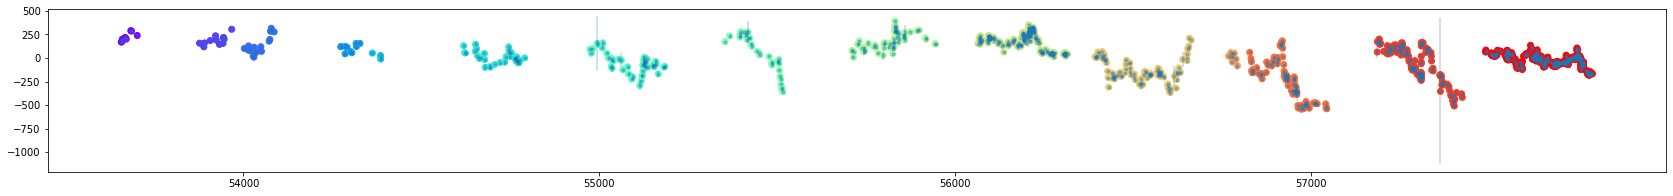

In [31]:
fig = plt.figure(figsize=[29, 3])


plt.scatter(x,y,c=groupnum, cmap=cm.rainbow)
plt.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
# plt.plot(xx_, yy_, '-', color='r')
# plt.ylim(1e-6, 1e-9)
# plt.yscale('log')
plt.show()

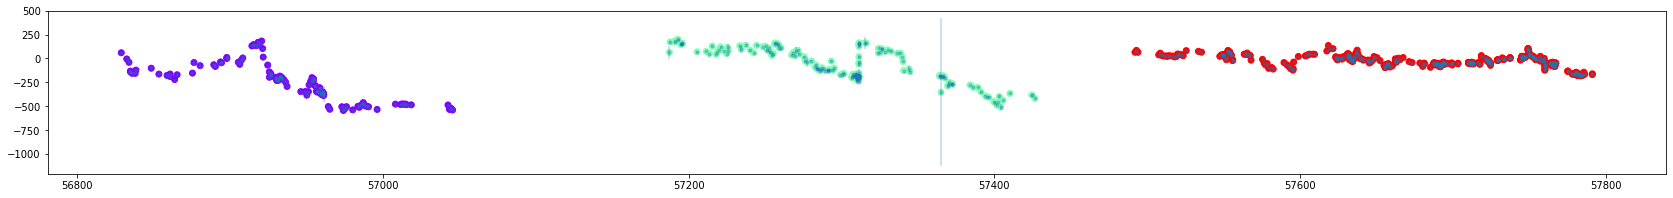

In [119]:
fig = plt.figure(figsize=[29, 3])

xs,xend = -857,-1

plt.scatter(x[xs:xend],y[xs:xend],c=groupnum[xs:xend], cmap=cm.rainbow)
plt.errorbar(x[xs:xend], y[xs:xend], marker='.', yerr=yerr[xs:xend], ls='none', alpha=0.3)
# plt.plot(xx_, yy_, '-', color='r')
# plt.ylim(1e-6, 1e-9)
# plt.yscale('log')
plt.show()

(array([1.018e+03, 2.200e+02, 7.700e+01, 3.700e+01, 2.500e+01, 1.400e+01,
        1.100e+01, 2.100e+01, 8.000e+00, 8.000e+00, 1.200e+01, 9.000e+00,
        5.000e+00, 7.000e+00, 3.000e+00, 7.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

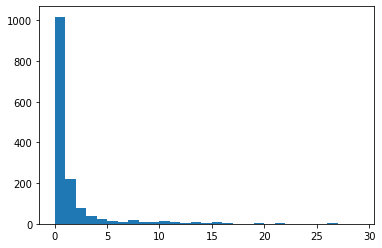

In [101]:
plt.hist(np.diff(x), bins=range(30))

In [110]:
x[490:500]

array([56272.686, 56273.644, 56273.646, 56273.647, 56273.651, 56273.655,
       56274.607, 56274.611, 56274.616, 56274.652])

In [109]:
np.diff(x)[490:500] < 1e-3

array([False, False,  True, False, False, False, False, False, False,
       False])

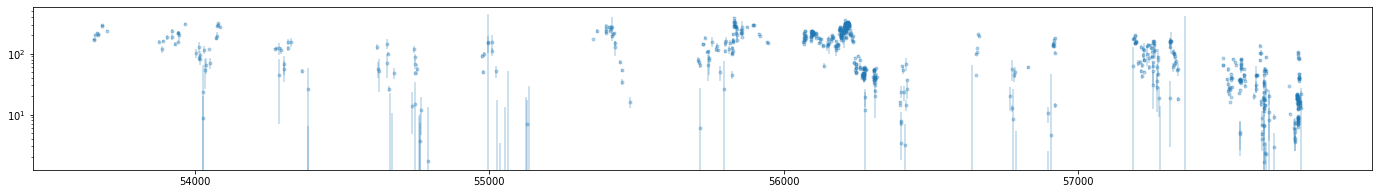

In [32]:
fig = plt.figure(figsize=[24, 3])


plt.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
# plt.plot(xx_, yy_, '-', color='r')
# plt.ylim(1e-6, 1e-9)
plt.yscale('log')
plt.show()

In [3]:
xs,xend = -857,-1
x,y,groupnum,yerr = x[xs:xend],y[xs:xend],groupnum[xs:xend], yerr[xs:xend]

In [16]:
def blockify(x,y,yerr, **kwargs):
    xx_,yy_ = [], []
    edges = bayesian_blocks(x, x=y, sigma=yerr, **kwargs)
    bins = np.digitize(x, edges, right=False)
    bin_num = np.max(bins)
    for bin_n in range(bin_num):
        mask = bins == bin_n
        yy = np.mean(y[mask])
        xx = x[mask]    
        try:
            if len(xx_)>0:
                xx_.append(xx_[-1])
                yy_.append(yy)

            xx_.append(np.min(xx))
            xx_.append(np.max(xx))

            yy_.append(yy)
            yy_.append(yy)
        except:
            pass
    
    return np.array(xx_),np.array(yy_), edges

In [17]:
xx_, yy_, edges = blockify(x,y,yerr, fitness='measures', p0=0.05)

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


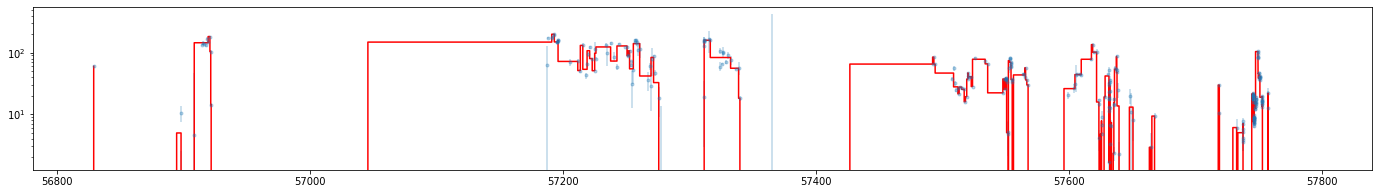

In [130]:
fig = plt.figure(figsize=[24, 3])

plt.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
plt.plot(xx_, yy_, '-', color='r')
plt.yscale('log')
# plt.ylim(1e-6, 1e-9)
plt.show()

In [4]:
group_change = groupnum[1:]-groupnum[:-1]
idsx = np.where(group_change>0)

In [5]:
edges = x[idsx]
for i in range(1,len(edges)):
    edges[i]+=10
edges = np.append(edges, np.max(x))
edges

array([57045.614, 57436.577, 57791.195])

In [6]:
xx_, yy_ = [], []
bins = np.digitize(x, edges, right=False)
bin_num = np.max(bins)
for bin_n in range(bin_num):
    mask = bins == bin_n
    yy = np.mean(y[mask])
    xx = x[mask]    
    try:
        if len(xx_)>0:
            xx_.append(xx_[-1])
            yy_.append(yy)

        xx_.append(np.min(xx))
#         xx_.append(np.max(xx))
        xx_.append(edges[bin_n])
        

        yy_.append(yy)
        yy_.append(yy)
    except:
        pass

xx_, yy_ = np.array(xx_),np.array(yy_)

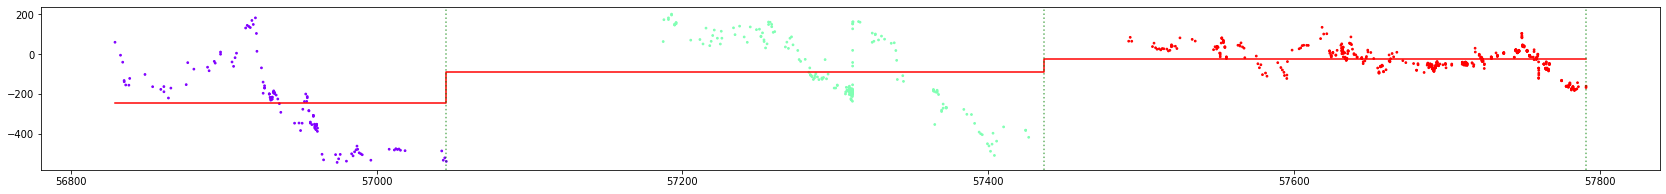

In [7]:
fig = plt.figure(figsize=[29, 3])

# plt.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
plt.scatter(x,y, 3, c=groupnum, cmap=cm.rainbow)
plt.plot(xx_, yy_, '-', color='r')
# plt.yscale('log')
# plt.ylim(1e-6, 1e-9)

for edge in edges:
    plt.axvline(x=edge, color='g', alpha=0.6, ls=':')

plt.show()

In [8]:
from astropy.stats import bayesian_blocks
from scipy import interpolate
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pylab as plt
from multiprocessing import Process, Manager
import pickle
import time
from scipy import stats
from matplotlib.patches import Rectangle
import os
import json


def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def blockify(x,y,yerr, **kwargs):
    '''Build bayesian blocks'''
    xx_,yy_ = [], []
    edges = bayesian_blocks(x, x=y, sigma=yerr, **kwargs)
    bins = np.digitize(x, edges, right=False)
    bin_num = np.max(bins)
    for bin_n in range(bin_num):
        mask = bins == bin_n
        yy = np.mean(y[mask])
        xx = x[mask]    
        try:
            if len(xx_)>0:
                xx_.append(xx_[-1])
                yy_.append(yy)

            xx_.append(np.min(xx))
            xx_.append(np.max(xx))

            yy_.append(yy)
            yy_.append(yy)
        except:
            pass
    
    return np.array(xx_),np.array(yy_), edges

def load_data(curve_path='', saveto='.', name='', xind=1, yind=2, yerrind=3,**kwargs):
    '''load data and plot curve'''
    data = np.loadtxt(curve_path)
    x,y,yerr = data[:,xind], data[:,yind], data[:,yerrind]
    mask = np.isfinite(x) & np.isfinite(y) & np.isfinite(yerr)
    x,y,yerr = x[mask], y[mask], yerr[mask]

    print(f'Points number: {len(data)}')
    
    fig = plt.figure(figsize=[19,20])
    ax = plt.subplot(411)
    ax.hist(np.diff(x))
    ax = plt.subplot(412)
    ax.errorbar(data[:, 1], data[:, 2], yerr=data[:, 3], ls='none')
    ax = plt.subplot(413)
    ax.errorbar(data[:, 1], data[:, 2], marker='.', yerr=data[:, 3], ls='none', alpha=0.3)
    ax.set_yscale('log')
    ax = plt.subplot(414)
    xx_, yy_, edges = blockify(x,y,yerr, fitness='measures', p0=0.05)
    ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
    ax.plot(xx_, yy_, '-', color='r')
#     ax.set_yscale('log')
    plt.suptitle(name + '  >>len=' + str(len(y)), fontsize=20)
    plt.savefig(saveto + '/curve.png', bbox_inches='tight')
    plt.close(fig)
    
    return x,y,yerr,xx_, yy_, edges

def make_works(x,y,yerr,xx_, yy_, edges):
    works = []
    for ind_edge in range(len(edges)):
        for ind2_edge in range(ind_edge+1, len(edges)):
            mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
            motif_x = x[mask]

            if len(motif_x) > MAX_PATTERN_LEN or len(motif_x) < MIN_PATTERN_LEN:
                continue
                
            # !!!!!!!!!!!!!!!!!!!!!!!!!!
            # MIN_TIME_SPEEDUP and MAX_TIME_SPEEDUP are not correctly evaluated
            # we gonna filter them in dothing()
            # !!!!!!!!!!!!!!!!!!!!!!!!!!

            works.append([ind_edge, ind2_edge])
            
    return works

def dothing(L, i_):  # the managed list `L` passed explicitly.
    x_len = len(x)
    for (ind_edge, ind2_edge) in i_:
        mask = (x>edges[ind_edge])&(x<=edges[ind2_edge])
        motif_x = x[mask]
        motif_y = y[mask]
        
        delta_T_orig = motif_x[-1] - motif_x[0]

        motif_len = len(motif_x)
        #!!!!!!!!!!!!!!
        # this is not correct, delta t between points can be different
        #!!!!!!!!!!!!!!
        MIN_P_LEN = int(motif_len*MIN_TIME_SPEEDUP)
        MAX_P_LEN = int(motif_len*MAX_TIME_SPEEDUP)

        x1_ = NormalizeData(motif_x)
        y1_ = NormalizeData(motif_y)
        s1 = interpolate.InterpolatedUnivariateSpline(x1_, y1_)

        dist_res = []
        iter_time = time.time()
        for i in range(len(x)):
            for j in range(i+MIN_P_LEN, min(x_len,i+MAX_P_LEN+1)):  

                if mask[i:j].any():
                    continue

                x_cand = x[i:j]
                y_cand = y[i:j]
                
                delta_T_new = x_cand[-1] - x_cand[0]
                speedup = delta_T_new/delta_T_orig

                if speedup < MIN_TIME_SPEEDUP or speedup > MAX_TIME_SPEEDUP:
                    continue

                x2_ = NormalizeData(x_cand)
                y2_ = NormalizeData(y_cand)
                s2 = interpolate.InterpolatedUnivariateSpline(x2_, y2_)

                pts = np.concatenate([x1_, x2_])

                px,py1,py2 = pts, s1(pts), s2(pts)

                cor, pval = stats.pearsonr(py1,py2)

                if cor > CORR_LIM and pval < 0.05 and cor < 0.99:
                    dist_res.append([i, j, cor, pval, px,py1,py2])

        L.append([ind_edge, ind2_edge, dist_res])
        print(f'resLen: {len(dist_res)}')
        print(f'{edges[ind_edge]} --- {edges[ind2_edge]}')
        print('-*_'*50)
        
def chunks(xs, n):
    n = max(1, n)
    return list(xs[i:i+n] for i in range(0, len(xs), n))   

def plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto='.', agn='', refplaces = []):
    rrr = 0
    for k,v in res.items():
        if len(v) == 0:
            continue

        num_sim = len(v)
        to_plot = len(best_res[k])
        
        dist_res = v
        plotted = 0
        
        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        mask = (x>regx1)&(x<=regx2)
        delta_T_orig = np.max(x[mask]) - np.min(x[mask])
        
        plot_ind = []
        for indd in range(to_plot):
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            
#             if cor < STRICT_COR_LIMIT:
#                 continue
                
            regx1, regx2 = x[i], x[j]
            mask = (x>regx1)&(x<=regx2)
            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig
            
            if speedup < MIN_TIME_SPEEDUP or speedup > MAX_TIME_SPEEDUP:
                continue
            
            plotted+=1
            plot_ind.append(indd)
            
        if plotted == 0:
            continue
            
        if plotted > 3:
            plotted = 3

        fig,axes = plt.subplots(figsize=[24, 3*(3*plotted+2)], nrows=3*plotted+2)

        ax = axes[0]
        ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3, label=f'{agn} i={rrr}, k={k}')
        ax.plot(xx_, yy_, '-', color='r', alpha=0.3)
#         ax.set_yscale('log')
        ax.legend(fontsize=19)
    
        for regx1,regx2 in refplaces:
            rect = Rectangle((regx1, 0), regx2-regx1, 2e-6, alpha=0.3, linewidth=0, fill=None, hatch='///', color='r')
            ax.add_patch(rect)

        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        rect = Rectangle((regx1, 0), regx2-regx1, 2e-6, facecolor='yellow', alpha=0.3)
        ax.add_patch(rect)

        mask = (x>regx1)&(x<=regx2)
        ax.plot(x[mask], y[mask], color='g')

        delta_T_orig = np.max(x[mask]) - np.min(x[mask])

        ii=1
        axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'refsample i={rrr}, num={num_sim}, points={len(x[mask])}', color='g')
        axes[ii].legend(fontsize=20)
        axes[ii].plot(xx_, yy_, '-', color='r', alpha=0.3)
        axes[ii].set_xlim(regx1-10, regx2+10)
        
        # limit number of plots
        plot_ind = plot_ind[:3]
        
        plotted = 0
        for indd in plot_ind:
            i, j, cor, pval, px,py1,py2 = dist_res[best_res[k][indd]]
            
            
            px,py1,py2 = zip(*sorted(zip(px,py1, py2)))
            px,py1,py2 = np.array(px), np.array(py1), np.array(py2)
            
            
#             if cor <STRICT_COR_LIMIT:
#                 continue
            
            regx1, regx2 = x[i], x[j]
            rect = Rectangle((regx1, 0), regx2-regx1, 2e-6, facecolor='lightgrey')
            ax.add_patch(rect)

            mask = (x>regx1)&(x<=regx2)
            ii+=1
            axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'pattern#{indd} ({regx1}-{regx2})', color='m')
            axes[ii].legend(fontsize=16)
            axes[ii].plot(xx_, yy_, '-', color='r', alpha=0.3)
            

            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig
            axes[ii].set_xlim(regx1-10*speedup, regx2+10*speedup)

            ii+=1
            axes[ii].plot(px, py1,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none', marker='+')
#             axes[ii].plot(px, py2,'o',color='r')
            axes[ii].scatter(px, py2, s=10, c=px, cmap='turbo')
            axes[ii].legend(fontsize=20)
        
            qlen = int(0.1*len(px))
            for ind, multip in enumerate([2, 4, 5, 7, 9]):
                axes[ii].axvline(x=np.min(px[qlen*multip:]), color='k', alpha=0.1*multip)
            
            
            ii+=1
#             axes[ii].plot(py1, py2,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
            qlen = int(0.1*len(px))
            lbl = ''
            qlbls = ['-20%', '-40%', '-50%', '-70%', '-90%']
            for ind, multip in enumerate([2, 4, 5, 7, 9]):
                qcor, qpval = stats.pearsonr(py1[qlen*multip:], py2[qlen*multip:])
                lbl+= '{}:{:2.2f} '.format(qlbls[ind], qcor)
            axes[ii].scatter(py1, py2, s=10, c=px, cmap='turbo', label=lbl)
            axes[ii].legend(fontsize=16)
            
            plotted += 1

#         plt.suptitle(f'i={rrr}, k={k}')
        if to_plot != 0 and plotted != 0:
            plt.savefig(saveto + f'/{rrr}.png', bbox_inches='tight')
            
#         plt.show()
#         break
        plt.close(fig)
        rrr+=1

def resolve_consequent_patterns(res, SPLIT_DIST=15):
    best_res = {}
#     SPLIT_DIST = 15

    for k in res.keys():
        if len(res[k]) == 0:
            continue
    #     print('=================================')

        best_res[k] = []
        kkey = k
        ii, jj, corcor, pvalpval = [],[],[],[]

        for ind in range(len(res[kkey])):
            i, j, cor, pval, px,py1,py2 = res[kkey][ind]
            ii.append(i)
            jj.append(j)
            corcor.append(cor)
            pvalpval.append(pval)

        corcor = np.array(corcor)
        pvalpval = np.array(pvalpval)

        X = np.array([ii,jj]).T
        where_split = np.where(np.diff(X[:,0])>SPLIT_DIST)[0]
        n_clusters_ = len(where_split)
        labels = np.zeros(len(X))
        for ind,bord in enumerate(where_split[::-1]):
            labels[:bord] = ind+1  

        for k in range(n_clusters_):
            mask = labels == k
            ind_ = np.argmax(corcor[mask])
            ind = np.where(corcor == corcor[mask][ind_])[0]
            best_res[kkey].append(ind[0])
            
    return best_res

def plot_patterns_old(x,y,yerr,xx_, yy_, edges, res, saveto='.'):
    rrr = 0
    for k,v in res.items():
        if len(v) == 0:
            continue

        num_sim = len(v)
        to_plot = min(num_sim, 5)

        fig,axes = plt.subplots(figsize=[24, 3*(2*to_plot+2)], nrows=2*to_plot+2)

        ax = axes[0]
        ax.errorbar(x, y, marker='.', yerr=yerr, ls='none', alpha=0.3)
        ax.plot(xx_, yy_, '-', color='r', alpha=0.3)
        ax.set_yscale('log')


        regx1,regx2 = float(k.split('_')[0]), float(k.split('_')[1])
        rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='yellow', alpha=0.3)
        ax.add_patch(rect)

        mask = (x>regx1)&(x<=regx2)
        ax.plot(x[mask], y[mask], color='g')

        delta_T_orig = np.max(x[mask]) - np.min(x[mask])

        ii=1
        axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'refsample i={rrr}, num={num_sim}', color='g')
        axes[ii].legend(fontsize=20)

        # sort by corr number
        dist_res = sorted(v, key= lambda l: l[2], reverse=True)

        # plot only top-5 results
        for indd in range(to_plot):
            i, j, cor, pval, px,py1,py2 = dist_res[indd]
            regx1, regx2 = x[i], x[j]
            rect = Rectangle((regx1, 0), regx2-regx1, 140, facecolor='lightgrey')
            ax.add_patch(rect)

            mask = (x>regx1)&(x<=regx2)
            ii+=1
            axes[ii].errorbar(x[mask], y[mask], marker='o', yerr=yerr[mask], ls='none', alpha=0.8, label=f'pattern#{indd} ({regx1}-{regx2})', color='m')
            axes[ii].legend(fontsize=16)

            delta_T_new = np.max(x[mask]) - np.min(x[mask])
            speedup = delta_T_new/delta_T_orig

            ii+=1
            axes[ii].plot(px, py1,'.',color='b', label=f'cor={cor:2.2f} pval={pval:2.3f} t={speedup:2.2f}', alpha=0.3, ls='none')
            axes[ii].plot(px, py2,'o',color='r')
            axes[ii].legend(fontsize=20)

#         plt.title(f'i={rrr}, num={num_sim}')
        plt.savefig(saveto + f'/{rrr}.png', bbox_inches='tight')
        plt.close(fig)
        rrr+=1


MAX_PATTERN_LEN = 300
MIN_PATTERN_LEN = 30
MAX_TIME_SPEEDUP = 3.
MIN_TIME_SPEEDUP = 0.3
CORR_LIM = 0.8
PROC_NUM = 6
        
        
if __name__ == "__main__": 
    
    # Load data        
    saveto = '/mnt/sdb2/science/blazars/polarimetry'
    try:
        os.mkdir(saveto)
    except OSError as error:
        print(error)
#     x,y,yerr,xx_, yy_, edges  = load_data(curve_path = '/mnt/sdb2/science/blazars/converted_cta102.dat', name='CTA102polar', saveto=saveto, xind=0, yind=5, yerrind=6)
#     x,y,yerr,xx_, yy_, edges  = x,y,yerr,xx_, yy_, edges
    
    # Run works
    res = {}
    with Manager() as manager:
        start = time.time()
        L = manager.list()  # <-- can be shared between processes.
        processes = []
        works = make_works(x,y,yerr,xx_, yy_, edges)
        chnks_ = chunks(works, int(len(works)//PROC_NUM))
        for i in range(PROC_NUM):
            p = Process(target=dothing, args=(L,chnks_[i]))  # Passing the list
            p.start()
            processes.append(p)
        for p in processes:
            p.join()
        print(len(L))

        for vv in L:
            ind_edge, ind2_edge, dist_res = vv
            res[str(edges[ind_edge]) + '_' + str(edges[ind2_edge])] = dist_res

        runtime = (time.time() - start)/60.
        if runtime > 60:
            print(f'Total runtime: {runtime/60} hours')
        else:
            print(f'Total runtime: {runtime} minutes')
    
    
    # Save results
    with open(saveto + '/res.pkl', 'wb') as f:
        pickle.dump(res, f)

    class NumpyEncoder(json.JSONEncoder):
        def default(self, obj):
            if isinstance(obj, np.ndarray):
                return obj.tolist()
            return json.JSONEncoder.default(self, obj)

    json_dump = json.dumps(res, cls=NumpyEncoder)

    with open(saveto + '/res.json', 'w') as fp:
        json.dump(json_dump, fp)

        
    # Plot imgs
    plot_patterns_old(x,y,yerr,xx_, yy_, edges, res, saveto=saveto)
    
    
    # Plot refined images
    best_res = resolve_consequent_patterns(res, SPLIT_DIST=15)
    try:
        os.mkdir(saveto + '/refined')
    except:
        pass
    plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto=saveto + '/refined', agn='CTA102pol')

ZeroDivisionError: division by zero

46 hours

In [20]:
len(works), len(res)

(51634, 51630)

In [10]:
saveto = '/mnt/sdb2/science/blazars/polarimetry'

with open(saveto + '/res.pkl', 'rb') as f:
    res = pickle.load(f)
    
len(res)

51630

KeyboardInterrupt: 

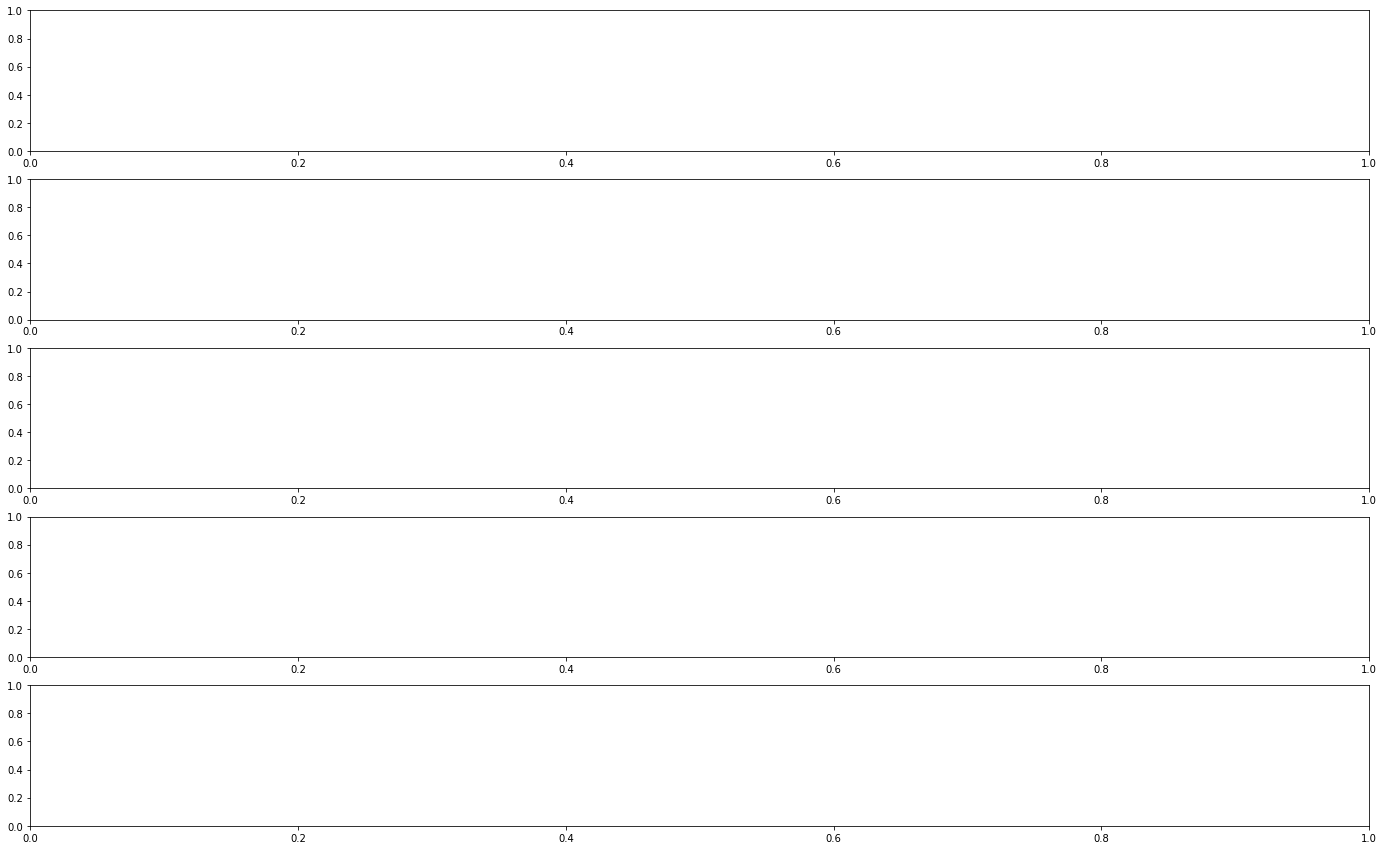

In [11]:
# Plot imgs
# plot_patterns_old(x,y,yerr,xx_, yy_, edges, res, saveto=saveto)


# Plot refined images
best_res = resolve_consequent_patterns(res, SPLIT_DIST=15)
try:
    os.mkdir(saveto + '/refined')
except:
    pass
plot_patterns(x,y,yerr,xx_, yy_, edges, res, best_res, saveto=saveto + '/refined', agn='CTA102pol')

https://arxiv.org/pdf/2108.02065.pdf

https://www.sdss4.org/dr17/data_access/value-added-catalogs/?vac_id=galaxy-zoo-3d

https://www.zooniverse.org/projects/klmasters/galaxy-zoo-3d/about/results

In [5]:
from astropy.io import fits as pyfits

In [18]:
img = pyfits.open('/home/amarch/Downloads/1-247456_127_14721945.fits')

In [19]:
data = img[0].data

In [20]:
data.shape

(525, 525, 3)

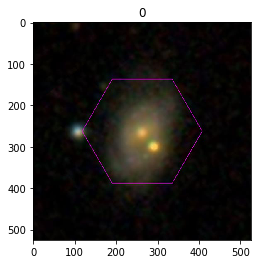

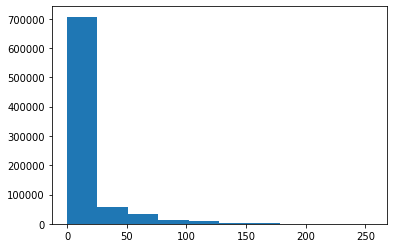

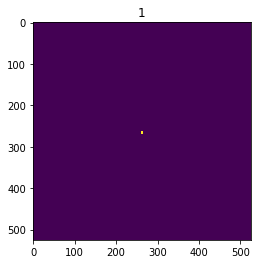

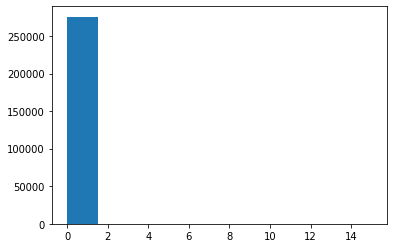

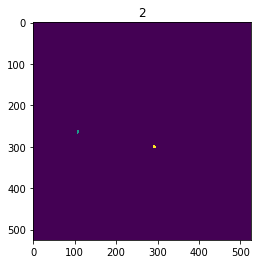

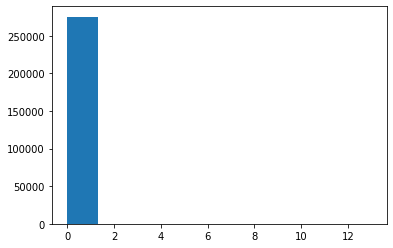

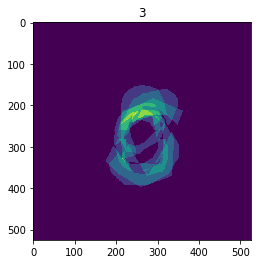

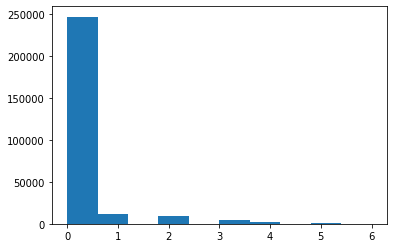

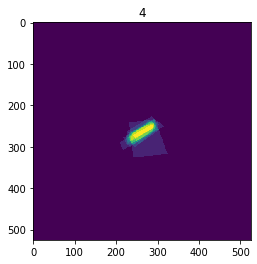

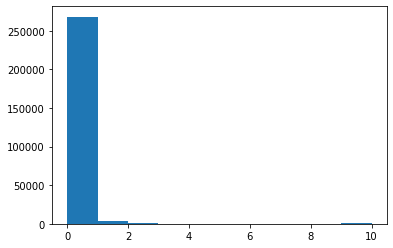

5
6
7
8
9
10


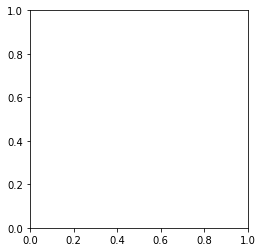

In [21]:
for i in range(11):
    try:
        data = img[i].data
        plt.imshow(data, interpolation='none')
        plt.title(i)
        plt.show()
        plt.hist(data.ravel())
        plt.show()
    except:
        print(i)

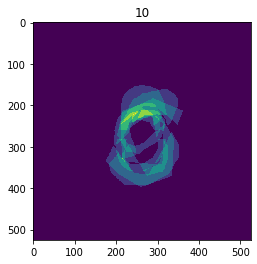

In [22]:
data = img[3].data
plt.imshow(data, interpolation='none')
plt.title(i)
plt.show()

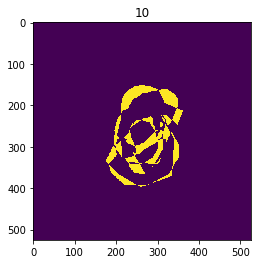

In [23]:
plt.imshow(data==1, interpolation='none')
plt.title(i)
plt.show()

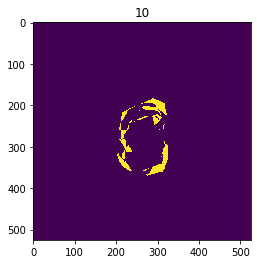

In [27]:
plt.imshow(data==3, interpolation='none')
plt.title(i)
plt.show()